In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Model,Sequential
from keras.preprocessing.image import img_to_array,load_img
from keras.layers import Dense,GlobalAveragePooling2D,Input,Embedding,InputLayer,Activation,Flatten,Conv2D,MaxPooling2D
import os
#print(os.listdir("../input"))
import glob
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm,tqdm_notebook
import tensorflow as tf
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile

In [0]:
filedir='/content/drive/My Drive/flickr-image-dataset.zip'

In [0]:
f=ZipFile(filedir)

In [0]:
f.extractall("imges")

In [0]:
df=pd.read_csv("/content/imges/flickr30k_images/results.csv",delimiter='|')

In [8]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [0]:
imgbasedir="/content/imges/flickr30k_images/flickr30k_images/"

In [0]:
imgdir=glob.glob(imgbasedir+"*.jpg")

In [11]:
imgdir[:5]

['/content/imges/flickr30k_images/flickr30k_images/8137819284.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/3551281733.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/4901767295.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/7052777683.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/406308903.jpg']

 Two young guys with shaggy hair look at their hands while hanging out in the yard .
(500, 333, 3)


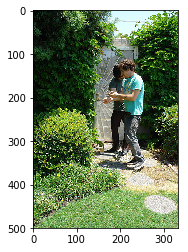

In [12]:
img=cv2.imread(imgbasedir+df.image_name.iloc[0])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(df[' comment'].iloc[0])
print(img.shape)

In [0]:
imagesize=(299,299,3)

In [0]:
def fun1(df1):
    m=list(df1[" comment"].values)
    return m

In [0]:
df1=df.groupby(by='image_name').apply(fun1)

In [0]:
index1=df1.index
values=df1.values

In [0]:
dict1=dict([(index1[i],values[i]) for i in range(len(values))])

In [18]:
model=InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(299,299,3))

W0731 06:13:13.609301 139662405117824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 06:13:13.670438 139662405117824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 06:13:13.694654 139662405117824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 06:13:13.733655 139662405117824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0731 06:13:13.734430 1396624051

219062272/219055592 [==============================] - 6s 0us/step


In [0]:
for layer in model.layers:
  layer.trainable=False
  
bottommodel=model.layers[-5].output
topmodel=GlobalAveragePooling2D()(bottommodel)
  

In [0]:
#model.summary()

In [0]:
model1=Model(model.input,topmodel)

In [0]:
#model1.summary()

In [0]:
pred1=[]                          #due to memory constraints ,getting encodings in batches of 5000
for i in range(0,30000,5000):
    index2=index1[i:i+5000]
    xtrain=[]
    for i in range(len(index2)):
        img=cv2.imread(imgbasedir+index2[i])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(299,299)).astype('float16')
        xtrain.append(img)
    xtrain=np.array(xtrain).astype('float16')/255
    mean=np.mean(xtrain,axis=0)
    std=np.std(xtrain,axis=0)
    xtrain=(xtrain-mean)/std
    pred=model1.predict(xtrain)
    pred1.append(pred)

In [0]:
xtrain=[]  # To Free up some Memory
pred=[]
pred2=np.vstack(pred1)


In [0]:
pred1=0

In [0]:
import random  #Getting the captioning text  for first 30000 images
tokendata=[random.sample(dict1[index1[i]],1)[0] for i in range(30000)]

In [0]:
Imgbottleneck=120
wordembedsize=32
rnnsize=256
ns=2080

In [0]:
import re

In [0]:
def fun(text):
    
    text=text.lower()
    text=re.sub(r"[^\w\d]"," ",text)
    text=re.sub(r"\s{2,}"," ",text)
    text=text.strip()
    return text


In [0]:
tokendata1=[fun(i) for i in tokendata]

In [0]:
tokendata1=np.array(tokendata1)

In [0]:
tokenizer=Tokenizer(num_words=3997,oov_token='<unk>')

In [0]:
tokenizer.fit_on_texts(tokendata1)

In [0]:
tokendata2=tokenizer.texts_to_sequences(tokendata1)

In [0]:
wordcount=tokenizer.word_counts

In [37]:
len([i for i,j in wordcount.items() if j>=3])

4630

In [0]:
word2index=tokenizer.word_index
word2index=dict([(i,j) for i,j in word2index.items() if j <=4720])
word2index['<pad>']=0
word2index['<start>']=len(word2index)
word2index['<end>']=len(word2index)

In [0]:
index2word=dict([(i,j) for j,i in word2index.items()])

In [0]:
tokendata3=[[word2index['<start>']]+tokendata2[i]+[word2index['<end>']] for i in range(len(tokendata2))]

In [0]:
length=[len(x) for x in tokendata3]

In [0]:
imgembedsize=1536
logitsbottleneck=128
rnnsize=256
Imgbottleneck=128
wordembedsize=64
tf.reset_default_graph()

In [43]:
imgemb=tf.placeholder(shape=[None,2080],dtype=tf.float32)
sentences=tf.placeholder(shape=[None,None],dtype=tf.int32)
drop1=tf.placeholder(shape=[],dtype=tf.float32)
drop_imgemb=tf.nn.dropout(imgemb,keep_prob=drop1,)
imgembed_bottleneck=tf.layers.dense(drop_imgemb,Imgbottleneck,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)

W0731 06:41:50.269980 139662405117824 deprecation.py:506] From <ipython-input-43-cdd84dd560b4>:4: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0731 06:41:50.309061 139662405117824 deprecation.py:323] From <ipython-input-43-cdd84dd560b4>:5: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [0]:
drop2=tf.placeholder(shape=[],dtype=tf.float32)
drop3=tf.placeholder(shape=[],dtype=tf.float32)

In [45]:
imgbottle_h=tf.layers.dense(imgembed_bottleneck,ns,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)
dropimgbottle_h=tf.nn.dropout(imgbottle_h,keep_prob=drop2)
embedvar=tf.Variable(tf.random.normal([len(word2index),wordembedsize],0,1.0,dtype=tf.float32))
wordembed=tf.nn.embedding_lookup(embedvar,sentences[:,:-1])
dropwordembed=tf.nn.dropout(wordembed,keep_prob=drop3)
lstm=tf.nn.rnn_cell.DropoutWrapper(tf.nn.rnn_cell.LSTMCell(ns,dtype=tf.float32),input_keep_prob=1.0,output_keep_prob=1.0,state_keep_prob=1.0,variational_recurrent=True,input_size=wordembedsize,dtype=tf.float32)

W0731 06:41:53.882654 139662405117824 deprecation.py:323] From <ipython-input-45-59130567d4d9>:6: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [0]:
c0=h0=dropimgbottle_h

In [0]:
seqlen=tf.placeholder(shape=[None],dtype=tf.int32)

In [48]:
hiddenstates,_=tf.nn.dynamic_rnn(lstm,dropwordembed,sequence_length=seqlen,initial_state=tf.nn.rnn_cell.LSTMStateTuple(c0,h0),dtype=tf.float32)

W0731 06:42:02.907164 139662405117824 deprecation.py:323] From <ipython-input-48-a7736e592d59>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0731 06:42:03.000746 139662405117824 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0731 06:42:03.011702 139662405117824 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py:961: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call init

In [49]:
hiddenstates.get_shape()


TensorShape([Dimension(None), Dimension(None), Dimension(2080)])

In [0]:
tokenlogitsbottleneck=tf.layers.dense(hiddenstates,logitsbottleneck,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)

In [0]:
tokenlogits=tf.layers.dense(tokenlogitsbottleneck,len(word2index))

In [52]:
tokenlogits.get_shape()

TensorShape([Dimension(None), Dimension(None), Dimension(4723)])

In [0]:
len1=len(word2index)

In [54]:
len1

4723

In [0]:
finaltokenlogits=tf.reshape(tokenlogits,(-1,len1))

In [56]:
finaltokenlogits.get_shape()

TensorShape([Dimension(None), Dimension(4723)])

In [0]:
flatgroundtruth=tf.reshape(sentences[:,1:],[-1,])

In [0]:
flat_loss_mask = tf.not_equal(word2index['<pad>'],flatgroundtruth)

In [0]:
xent=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=finaltokenlogits,labels=flatgroundtruth)

In [0]:
loss=tf.reduce_mean(tf.boolean_mask(xent,flat_loss_mask))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_step = optimizer.minimize(loss)

In [0]:
saver = tf.train.Saver()
s.close()

In [0]:
s=tf.InteractiveSession()

In [0]:
s.run(tf.global_variables_initializer())

In [65]:
len(length)

30000

(array([4.100e+01, 1.660e+02, 2.019e+03, 2.038e+03, 2.541e+03, 5.906e+03,
        2.847e+03, 2.485e+03, 4.185e+03, 1.543e+03, 1.221e+03, 1.857e+03,
        6.540e+02, 9.180e+02, 2.930e+02, 2.310e+02, 3.840e+02, 1.250e+02,
        1.100e+02, 1.370e+02, 5.300e+01, 4.200e+01, 6.500e+01, 2.700e+01,
        2.400e+01, 2.800e+01, 1.000e+01, 1.700e+01, 5.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 4.  ,  5.36,  6.72,  8.08,  9.44, 10.8 , 12.16, 13.52, 14.88,
        16.24, 17.6 , 18.96, 20.32, 21.68, 23.04, 24.4 , 25.76, 27.12,
        28.48, 29.84, 31.2 , 32.56, 33.92, 35.28, 36.64, 38.  , 39.36,
        40.72, 42.08, 43.44, 44.8 , 46.16, 47.52, 48.88, 50.24, 51.6 ,
        52.96, 54.32, 55.68, 57.04, 58.4 , 59.76, 61.12, 62.48, 63.84,
        65.2 , 66.56,

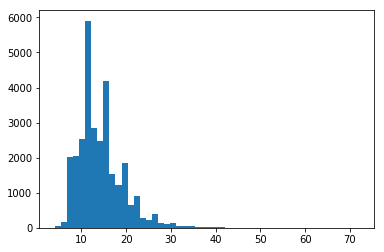

In [66]:
plt.hist(length,bins=50)

In [0]:
def generate_batch(images_embeddings, indexed_captions,lengths,batch_size, max_len=None):
    
    if batch_size==None:
      batch_size=len(images_embeddings)
    m=np.random.choice(len(images_embeddings),size=batch_size,replace=False)
    batchcaptions =indexed_captions[m] 
    batch_image_embeddings = images_embeddings[m]
    len1=lengths[m]
    batch_captions_matrix=pad_sequences(batchcaptions,maxlen=max_len,padding='post')
    
    
    return (batch_image_embeddings, 
            batch_captions_matrix,len1)

In [0]:
batch_size = 64
n_epochs = 100
n_batches_per_epoch = 1000
n_validation_batches = 100

In [69]:
generate_batch(pred2,np.array(tokendata3),np.array(length),64,None)[1].shape

(64, 32)

In [0]:
#Creating Training ,Validation datasets


In [0]:

d1=0.8
d2=0.8
d3=0.8
trainloss=[]
count=0
validloss=[]

In [72]:

for i in range(n_epochs):
  trainlabels,validlabels=train_test_split(np.arange(30000),test_size=0.01)
  trainXdata=pred2[trainlabels]
  trainYdata=np.array(tokendata3)[trainlabels]
  trainlength=np.array(length)[trainlabels]
  validXdata=pred2[validlabels]
  validYdata=np.array(tokendata3)[validlabels]
  validlength=np.array(length)[validlabels]
  for j in tqdm(range(n_batches_per_epoch)):
    batchx,batchy,batchlen=generate_batch(trainXdata,trainYdata,trainlength,64,None)
    loss1,_=s.run([loss,train_step],feed_dict={imgemb:batchx,sentences:batchy,seqlen:batchlen,drop1:d1,drop2:d2,drop3:d3})
    
    
    if (j+1)%400==0:
      trainlabels,validlabels=train_test_split(np.arange(30000),test_size=0.01)
      trainXdata=pred2[trainlabels]
      trainYdata=np.array(tokendata3)[trainlabels]
      trainlength=np.array(length)[trainlabels]
      validXdata=pred2[validlabels]
      validYdata=np.array(tokendata3)[validlabels]
      validlength=np.array(length)[validlabels]
      
    if count%50==0:
      #print("-----trainloss:-",loss1," count:-",count)
      batchx,batchy,batchlen=generate_batch(validXdata,validYdata,validlength,None,None)
      validloss1=s.run(loss,feed_dict={imgemb:batchx,sentences:batchy,seqlen:batchlen,drop1:1.0,drop2:1.0,drop3:1.0})
      print("-----validloss:-",validloss1,"---trainloss:-",loss1,"  count:-",count)
      validloss.append(validloss1)
    count+=1
    trainloss.append(loss1)

  0%|          | 2/1000 [00:01<19:43,  1.19s/it]

-----validloss:- 7.9161787 ---trainloss:- 9.712912   count:- 0


  5%|▌         | 52/1000 [00:08<02:37,  6.00it/s]

-----validloss:- 4.91772 ---trainloss:- 4.964072   count:- 50


 10%|█         | 103/1000 [00:15<02:27,  6.06it/s]

-----validloss:- 4.564515 ---trainloss:- 4.609545   count:- 100


 15%|█▌        | 152/1000 [00:21<02:18,  6.11it/s]

-----validloss:- 4.3953304 ---trainloss:- 4.4515615   count:- 150


 20%|██        | 202/1000 [00:28<02:26,  5.45it/s]

-----validloss:- 4.278242 ---trainloss:- 4.49448   count:- 200


 25%|██▌       | 252/1000 [00:35<02:09,  5.79it/s]

-----validloss:- 4.1657643 ---trainloss:- 4.271715   count:- 250


 30%|███       | 302/1000 [00:42<01:55,  6.04it/s]

-----validloss:- 4.088295 ---trainloss:- 4.2919464   count:- 300


 35%|███▌      | 352/1000 [00:48<01:39,  6.49it/s]

-----validloss:- 4.0096335 ---trainloss:- 4.112109   count:- 350


 40%|████      | 402/1000 [00:55<01:53,  5.27it/s]

-----validloss:- 4.0144014 ---trainloss:- 3.944656   count:- 400


 45%|████▌     | 452/1000 [01:02<01:23,  6.55it/s]

-----validloss:- 3.9791262 ---trainloss:- 3.7705684   count:- 450


 50%|█████     | 503/1000 [01:09<01:17,  6.45it/s]

-----validloss:- 3.9512885 ---trainloss:- 3.9502316   count:- 500


 55%|█████▌    | 552/1000 [01:15<01:11,  6.25it/s]

-----validloss:- 3.913557 ---trainloss:- 3.7488816   count:- 550


 60%|██████    | 602/1000 [01:22<01:03,  6.28it/s]

-----validloss:- 3.8863008 ---trainloss:- 3.62818   count:- 600


 65%|██████▌   | 652/1000 [01:28<00:57,  6.01it/s]

-----validloss:- 3.8669126 ---trainloss:- 3.591402   count:- 650


 70%|███████   | 702/1000 [01:35<00:47,  6.29it/s]

-----validloss:- 3.8265536 ---trainloss:- 3.8331184   count:- 700


 75%|███████▌  | 752/1000 [01:42<00:39,  6.30it/s]

-----validloss:- 3.8076925 ---trainloss:- 3.876236   count:- 750


 80%|████████  | 802/1000 [01:49<00:36,  5.46it/s]

-----validloss:- 3.6066244 ---trainloss:- 3.607091   count:- 800


 85%|████████▌ | 852/1000 [01:55<00:24,  6.06it/s]

-----validloss:- 3.6121807 ---trainloss:- 3.6889436   count:- 850


 90%|█████████ | 902/1000 [02:02<00:15,  6.21it/s]

-----validloss:- 3.5864885 ---trainloss:- 3.6528013   count:- 900


 95%|█████████▌| 952/1000 [02:08<00:06,  7.43it/s]

-----validloss:- 3.5901098 ---trainloss:- 3.6372285   count:- 950


  0%|          | 2/1000 [00:00<04:27,  3.74it/s]

-----validloss:- 3.4804108 ---trainloss:- 3.4232266   count:- 1000


  5%|▌         | 52/1000 [00:07<02:44,  5.75it/s]

-----validloss:- 3.4822116 ---trainloss:- 3.6310406   count:- 1050


 10%|█         | 102/1000 [00:13<02:34,  5.82it/s]

-----validloss:- 3.4996758 ---trainloss:- 3.576829   count:- 1100


 15%|█▌        | 152/1000 [00:20<02:40,  5.28it/s]

-----validloss:- 3.4781277 ---trainloss:- 3.5455487   count:- 1150


 20%|██        | 202/1000 [00:27<02:22,  5.59it/s]

-----validloss:- 3.480269 ---trainloss:- 3.527217   count:- 1200


 25%|██▌       | 251/1000 [00:33<02:24,  5.19it/s]

-----validloss:- 3.4698796 ---trainloss:- 3.5067525   count:- 1250


 30%|███       | 302/1000 [00:40<01:57,  5.95it/s]

-----validloss:- 3.4663935 ---trainloss:- 3.4037821   count:- 1300


 35%|███▌      | 352/1000 [00:47<01:38,  6.55it/s]

-----validloss:- 3.4563122 ---trainloss:- 3.3594174   count:- 1350


 40%|████      | 402/1000 [00:53<01:41,  5.90it/s]

-----validloss:- 3.3386188 ---trainloss:- 3.185708   count:- 1400


 45%|████▌     | 452/1000 [01:00<01:28,  6.18it/s]

-----validloss:- 3.3704755 ---trainloss:- 3.260247   count:- 1450


 50%|█████     | 502/1000 [01:07<01:18,  6.37it/s]

-----validloss:- 3.3596501 ---trainloss:- 3.5818582   count:- 1500


 55%|█████▌    | 552/1000 [01:13<01:08,  6.56it/s]

-----validloss:- 3.369743 ---trainloss:- 3.258842   count:- 1550


 60%|██████    | 602/1000 [01:19<01:00,  6.58it/s]

-----validloss:- 3.3800943 ---trainloss:- 3.3769615   count:- 1600


 65%|██████▌   | 652/1000 [01:26<00:50,  6.87it/s]

-----validloss:- 3.380911 ---trainloss:- 3.3023145   count:- 1650


 70%|███████   | 701/1000 [01:32<00:49,  6.01it/s]

-----validloss:- 3.3956916 ---trainloss:- 3.5034263   count:- 1700


 75%|███████▌  | 752/1000 [01:39<00:42,  5.82it/s]

-----validloss:- 3.3662457 ---trainloss:- 3.3150022   count:- 1750


 80%|████████  | 801/1000 [01:46<00:43,  4.60it/s]

-----validloss:- 3.2417428 ---trainloss:- 3.2602823   count:- 1800


 85%|████████▌ | 852/1000 [01:52<00:24,  6.02it/s]

-----validloss:- 3.2594132 ---trainloss:- 3.29256   count:- 1850


 90%|█████████ | 902/1000 [01:59<00:18,  5.33it/s]

-----validloss:- 3.2688005 ---trainloss:- 3.2479296   count:- 1900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.67it/s]

-----validloss:- 3.2747965 ---trainloss:- 3.134766   count:- 1950


  0%|          | 2/1000 [00:00<04:01,  4.13it/s]

-----validloss:- 3.1265173 ---trainloss:- 3.0937636   count:- 2000


  5%|▌         | 52/1000 [00:06<02:35,  6.09it/s]

-----validloss:- 3.1316295 ---trainloss:- 3.2197003   count:- 2050


 10%|█         | 102/1000 [00:13<02:34,  5.81it/s]

-----validloss:- 3.1577168 ---trainloss:- 3.3238153   count:- 2100


 15%|█▌        | 152/1000 [00:20<02:10,  6.48it/s]

-----validloss:- 3.1627722 ---trainloss:- 3.2018685   count:- 2150


 20%|██        | 202/1000 [00:26<02:06,  6.30it/s]

-----validloss:- 3.1804903 ---trainloss:- 3.1840172   count:- 2200


 25%|██▌       | 251/1000 [00:33<02:17,  5.43it/s]

-----validloss:- 3.1829147 ---trainloss:- 3.1386113   count:- 2250


 30%|███       | 302/1000 [00:40<01:59,  5.84it/s]

-----validloss:- 3.1754923 ---trainloss:- 3.1922884   count:- 2300


 35%|███▌      | 352/1000 [00:46<01:38,  6.56it/s]

-----validloss:- 3.1922522 ---trainloss:- 3.2101123   count:- 2350


 40%|████      | 401/1000 [00:53<02:14,  4.45it/s]

-----validloss:- 3.098896 ---trainloss:- 3.1602976   count:- 2400


 45%|████▌     | 452/1000 [01:00<01:43,  5.29it/s]

-----validloss:- 3.1249943 ---trainloss:- 3.1408453   count:- 2450


 50%|█████     | 502/1000 [01:07<01:36,  5.15it/s]

-----validloss:- 3.1423247 ---trainloss:- 2.9802716   count:- 2500


 55%|█████▌    | 552/1000 [01:13<01:17,  5.80it/s]

-----validloss:- 3.139848 ---trainloss:- 3.1133626   count:- 2550


 60%|██████    | 602/1000 [01:20<01:12,  5.46it/s]

-----validloss:- 3.16985 ---trainloss:- 2.9976585   count:- 2600


 65%|██████▌   | 652/1000 [01:27<01:07,  5.15it/s]

-----validloss:- 3.176004 ---trainloss:- 2.9588213   count:- 2650


 70%|███████   | 702/1000 [01:34<00:51,  5.84it/s]

-----validloss:- 3.181557 ---trainloss:- 3.0636692   count:- 2700


 75%|███████▌  | 752/1000 [01:41<00:40,  6.18it/s]

-----validloss:- 3.1868641 ---trainloss:- 3.1188138   count:- 2750


 80%|████████  | 802/1000 [01:47<00:33,  5.85it/s]

-----validloss:- 2.871516 ---trainloss:- 2.8971415   count:- 2800


 85%|████████▌ | 852/1000 [01:54<00:24,  5.94it/s]

-----validloss:- 2.8904724 ---trainloss:- 2.9922159   count:- 2850


 90%|█████████ | 902/1000 [02:01<00:16,  6.02it/s]

-----validloss:- 2.896829 ---trainloss:- 2.8311224   count:- 2900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.28it/s]

-----validloss:- 2.924302 ---trainloss:- 2.8668747   count:- 2950


  0%|          | 2/1000 [00:00<03:56,  4.21it/s]

-----validloss:- 2.8691082 ---trainloss:- 2.995182   count:- 3000


  5%|▌         | 52/1000 [00:06<02:19,  6.81it/s]

-----validloss:- 2.889798 ---trainloss:- 2.9493723   count:- 3050


 10%|█         | 102/1000 [00:13<02:19,  6.44it/s]

-----validloss:- 2.901364 ---trainloss:- 2.9913447   count:- 3100


 15%|█▌        | 152/1000 [00:19<02:18,  6.11it/s]

-----validloss:- 2.929762 ---trainloss:- 2.8409805   count:- 3150


 20%|██        | 202/1000 [00:26<02:04,  6.42it/s]

-----validloss:- 2.9407728 ---trainloss:- 2.9317904   count:- 3200


 25%|██▌       | 252/1000 [00:33<02:01,  6.16it/s]

-----validloss:- 2.9417453 ---trainloss:- 2.9363952   count:- 3250


 30%|███       | 302/1000 [00:39<02:03,  5.64it/s]

-----validloss:- 2.9765625 ---trainloss:- 2.788124   count:- 3300


 35%|███▌      | 352/1000 [00:46<01:42,  6.31it/s]

-----validloss:- 2.9768991 ---trainloss:- 2.862687   count:- 3350


 40%|████      | 402/1000 [00:53<01:55,  5.19it/s]

-----validloss:- 2.7706501 ---trainloss:- 2.9645317   count:- 3400


 45%|████▌     | 451/1000 [00:59<01:36,  5.71it/s]

-----validloss:- 2.7939355 ---trainloss:- 2.8868914   count:- 3450


 50%|█████     | 502/1000 [01:06<01:22,  6.07it/s]

-----validloss:- 2.8241954 ---trainloss:- 2.8654628   count:- 3500


 55%|█████▌    | 552/1000 [01:12<01:08,  6.59it/s]

-----validloss:- 2.8528643 ---trainloss:- 2.734624   count:- 3550


 60%|██████    | 602/1000 [01:19<01:13,  5.40it/s]

-----validloss:- 2.8868115 ---trainloss:- 2.707273   count:- 3600


 65%|██████▌   | 652/1000 [01:25<00:53,  6.46it/s]

-----validloss:- 2.8970692 ---trainloss:- 2.9055874   count:- 3650


 70%|███████   | 702/1000 [01:32<00:55,  5.39it/s]

-----validloss:- 2.8959985 ---trainloss:- 2.9022946   count:- 3700


 75%|███████▌  | 752/1000 [01:39<00:44,  5.61it/s]

-----validloss:- 2.923096 ---trainloss:- 2.8796146   count:- 3750


 80%|████████  | 802/1000 [01:46<00:38,  5.15it/s]

-----validloss:- 2.5594926 ---trainloss:- 2.8740602   count:- 3800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.80it/s]

-----validloss:- 2.5950289 ---trainloss:- 2.7323225   count:- 3850


 90%|█████████ | 902/1000 [02:00<00:15,  6.17it/s]

-----validloss:- 2.6174955 ---trainloss:- 2.678263   count:- 3900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.05it/s]

-----validloss:- 2.6234317 ---trainloss:- 2.740426   count:- 3950


  0%|          | 2/1000 [00:00<04:16,  3.89it/s]

-----validloss:- 2.6224082 ---trainloss:- 2.7227983   count:- 4000


  5%|▌         | 52/1000 [00:06<02:13,  7.09it/s]

-----validloss:- 2.6600878 ---trainloss:- 2.6494446   count:- 4050


 10%|█         | 102/1000 [00:13<02:21,  6.35it/s]

-----validloss:- 2.692736 ---trainloss:- 2.6398823   count:- 4100


 15%|█▌        | 152/1000 [00:20<02:27,  5.74it/s]

-----validloss:- 2.7116785 ---trainloss:- 2.720177   count:- 4150


 20%|██        | 201/1000 [00:26<02:08,  6.24it/s]

-----validloss:- 2.75084 ---trainloss:- 2.4962935   count:- 4200


 25%|██▌       | 252/1000 [00:33<01:58,  6.33it/s]

-----validloss:- 2.7556088 ---trainloss:- 2.5668797   count:- 4250


 30%|███       | 302/1000 [00:40<02:06,  5.51it/s]

-----validloss:- 2.7526937 ---trainloss:- 2.5533524   count:- 4300


 35%|███▌      | 352/1000 [00:46<01:35,  6.81it/s]

-----validloss:- 2.7763407 ---trainloss:- 2.4295213   count:- 4350


 40%|████      | 402/1000 [00:53<01:51,  5.38it/s]

-----validloss:- 2.3408396 ---trainloss:- 2.6548665   count:- 4400


 45%|████▌     | 451/1000 [01:00<01:37,  5.62it/s]

-----validloss:- 2.357532 ---trainloss:- 2.574974   count:- 4450


 50%|█████     | 502/1000 [01:07<01:19,  6.28it/s]

-----validloss:- 2.4044142 ---trainloss:- 2.6569214   count:- 4500


 55%|█████▌    | 552/1000 [01:13<01:10,  6.38it/s]

-----validloss:- 2.4132376 ---trainloss:- 2.4556432   count:- 4550


 60%|██████    | 602/1000 [01:20<01:00,  6.56it/s]

-----validloss:- 2.4413207 ---trainloss:- 2.551784   count:- 4600


 65%|██████▌   | 653/1000 [01:26<00:51,  6.68it/s]

-----validloss:- 2.4794712 ---trainloss:- 2.3226693   count:- 4650


 70%|███████   | 702/1000 [01:33<00:44,  6.66it/s]

-----validloss:- 2.4867506 ---trainloss:- 2.4756734   count:- 4700


 75%|███████▌  | 752/1000 [01:40<00:37,  6.58it/s]

-----validloss:- 2.4863348 ---trainloss:- 2.378224   count:- 4750


 80%|████████  | 802/1000 [01:47<00:38,  5.09it/s]

-----validloss:- 2.209046 ---trainloss:- 2.4039974   count:- 4800


 85%|████████▌ | 852/1000 [01:53<00:24,  5.95it/s]

-----validloss:- 2.2570593 ---trainloss:- 2.5211048   count:- 4850


 90%|█████████ | 902/1000 [02:00<00:15,  6.23it/s]

-----validloss:- 2.28445 ---trainloss:- 2.4686892   count:- 4900


 95%|█████████▌| 952/1000 [02:06<00:06,  7.51it/s]

-----validloss:- 2.3218186 ---trainloss:- 2.3672578   count:- 4950


  0%|          | 2/1000 [00:00<03:50,  4.33it/s]

-----validloss:- 2.184689 ---trainloss:- 2.4179456   count:- 5000


  5%|▌         | 51/1000 [00:07<02:44,  5.76it/s]

-----validloss:- 2.2241716 ---trainloss:- 2.4014673   count:- 5050


 10%|█         | 102/1000 [00:13<02:33,  5.84it/s]

-----validloss:- 2.2382596 ---trainloss:- 2.3492734   count:- 5100


 15%|█▌        | 152/1000 [00:20<02:34,  5.48it/s]

-----validloss:- 2.2790518 ---trainloss:- 2.252282   count:- 5150


 20%|██        | 202/1000 [00:26<01:56,  6.86it/s]

-----validloss:- 2.2982442 ---trainloss:- 2.2788148   count:- 5200


 25%|██▌       | 252/1000 [00:33<02:11,  5.68it/s]

-----validloss:- 2.3171186 ---trainloss:- 2.428355   count:- 5250


 30%|███       | 302/1000 [00:40<01:58,  5.90it/s]

-----validloss:- 2.3409703 ---trainloss:- 2.4311633   count:- 5300


 35%|███▌      | 352/1000 [00:47<01:53,  5.71it/s]

-----validloss:- 2.3603332 ---trainloss:- 2.399419   count:- 5350


 40%|████      | 402/1000 [00:53<01:45,  5.64it/s]

-----validloss:- 2.12798 ---trainloss:- 2.1887383   count:- 5400


 45%|████▌     | 452/1000 [01:00<01:30,  6.08it/s]

-----validloss:- 2.1532164 ---trainloss:- 2.2423322   count:- 5450


 50%|█████     | 502/1000 [01:06<01:17,  6.40it/s]

-----validloss:- 2.1667435 ---trainloss:- 2.1737561   count:- 5500


 55%|█████▌    | 551/1000 [01:13<00:59,  7.51it/s]

-----validloss:- 2.2070305 ---trainloss:- 2.2365413   count:- 5550


 60%|██████    | 602/1000 [01:19<01:01,  6.51it/s]

-----validloss:- 2.2267697 ---trainloss:- 2.2182746   count:- 5600


 65%|██████▌   | 652/1000 [01:26<00:55,  6.28it/s]

-----validloss:- 2.2492404 ---trainloss:- 2.1938708   count:- 5650


 70%|███████   | 702/1000 [01:33<00:47,  6.25it/s]

-----validloss:- 2.2663639 ---trainloss:- 1.999651   count:- 5700


 75%|███████▌  | 752/1000 [01:40<00:35,  6.94it/s]

-----validloss:- 2.301016 ---trainloss:- 2.1966436   count:- 5750


 80%|████████  | 802/1000 [01:47<00:32,  6.02it/s]

-----validloss:- 1.9466927 ---trainloss:- 2.2497597   count:- 5800


 85%|████████▌ | 852/1000 [01:53<00:26,  5.56it/s]

-----validloss:- 1.9899156 ---trainloss:- 2.388574   count:- 5850


 90%|█████████ | 902/1000 [01:59<00:16,  5.86it/s]

-----validloss:- 2.0075727 ---trainloss:- 2.1914172   count:- 5900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.62it/s]

-----validloss:- 2.0333984 ---trainloss:- 2.1779375   count:- 5950


  0%|          | 2/1000 [00:00<04:27,  3.73it/s]

-----validloss:- 1.846422 ---trainloss:- 2.1800137   count:- 6000


  5%|▌         | 52/1000 [00:07<02:50,  5.55it/s]

-----validloss:- 1.8813454 ---trainloss:- 2.2704036   count:- 6050


 10%|█         | 102/1000 [00:13<02:06,  7.12it/s]

-----validloss:- 1.905089 ---trainloss:- 2.1069672   count:- 6100


 15%|█▌        | 152/1000 [00:20<02:11,  6.43it/s]

-----validloss:- 1.9337366 ---trainloss:- 2.0122476   count:- 6150


 20%|██        | 202/1000 [00:27<02:35,  5.13it/s]

-----validloss:- 1.9415642 ---trainloss:- 2.0119607   count:- 6200


 25%|██▌       | 252/1000 [00:33<02:01,  6.14it/s]

-----validloss:- 1.9813575 ---trainloss:- 2.0976732   count:- 6250


 30%|███       | 302/1000 [00:40<01:55,  6.03it/s]

-----validloss:- 1.9982165 ---trainloss:- 2.0136466   count:- 6300


 35%|███▌      | 352/1000 [00:47<01:37,  6.63it/s]

-----validloss:- 2.0233326 ---trainloss:- 2.0894494   count:- 6350


 40%|████      | 402/1000 [00:54<01:47,  5.56it/s]

-----validloss:- 1.6942052 ---trainloss:- 2.049929   count:- 6400


 45%|████▌     | 452/1000 [01:00<01:38,  5.58it/s]

-----validloss:- 1.732159 ---trainloss:- 2.1421044   count:- 6450


 50%|█████     | 502/1000 [01:07<01:07,  7.40it/s]

-----validloss:- 1.7635354 ---trainloss:- 2.0146651   count:- 6500


 55%|█████▌    | 552/1000 [01:14<01:10,  6.39it/s]

-----validloss:- 1.7800018 ---trainloss:- 1.9350768   count:- 6550


 60%|██████    | 602/1000 [01:20<01:04,  6.21it/s]

-----validloss:- 1.8034184 ---trainloss:- 1.952227   count:- 6600


 65%|██████▌   | 651/1000 [01:26<01:10,  4.97it/s]

-----validloss:- 1.8344535 ---trainloss:- 1.9996241   count:- 6650


 70%|███████   | 702/1000 [01:34<00:55,  5.37it/s]

-----validloss:- 1.8499641 ---trainloss:- 1.9771583   count:- 6700


 75%|███████▌  | 752/1000 [01:40<00:34,  7.14it/s]

-----validloss:- 1.8662229 ---trainloss:- 2.1289957   count:- 6750


 80%|████████  | 802/1000 [01:47<00:33,  5.99it/s]

-----validloss:- 1.6417193 ---trainloss:- 1.9988538   count:- 6800


 85%|████████▌ | 851/1000 [01:54<00:24,  6.00it/s]

-----validloss:- 1.6511302 ---trainloss:- 1.9372847   count:- 6850


 90%|█████████ | 902/1000 [02:00<00:14,  6.98it/s]

-----validloss:- 1.695603 ---trainloss:- 1.8003857   count:- 6900


 95%|█████████▌| 952/1000 [02:07<00:06,  7.08it/s]

-----validloss:- 1.7102863 ---trainloss:- 2.021084   count:- 6950


  0%|          | 2/1000 [00:00<03:59,  4.16it/s]

-----validloss:- 1.5217048 ---trainloss:- 1.8383993   count:- 7000


  5%|▌         | 52/1000 [00:06<02:25,  6.50it/s]

-----validloss:- 1.5701206 ---trainloss:- 2.0732925   count:- 7050


 10%|█         | 102/1000 [00:13<02:15,  6.61it/s]

-----validloss:- 1.5942335 ---trainloss:- 1.9030044   count:- 7100


 15%|█▌        | 152/1000 [00:20<02:14,  6.32it/s]

-----validloss:- 1.6130905 ---trainloss:- 1.8683487   count:- 7150


 20%|██        | 202/1000 [00:27<02:21,  5.66it/s]

-----validloss:- 1.6502451 ---trainloss:- 1.8431376   count:- 7200


 25%|██▌       | 252/1000 [00:33<02:02,  6.09it/s]

-----validloss:- 1.6714842 ---trainloss:- 1.7902095   count:- 7250


 30%|███       | 302/1000 [00:40<01:42,  6.79it/s]

-----validloss:- 1.679905 ---trainloss:- 1.7992878   count:- 7300


 35%|███▌      | 352/1000 [00:46<01:43,  6.24it/s]

-----validloss:- 1.7077994 ---trainloss:- 1.7349474   count:- 7350


 40%|████      | 401/1000 [00:53<01:59,  5.02it/s]

-----validloss:- 1.4419094 ---trainloss:- 1.7780347   count:- 7400


 45%|████▌     | 452/1000 [01:00<01:29,  6.10it/s]

-----validloss:- 1.4630505 ---trainloss:- 1.7345134   count:- 7450


 50%|█████     | 502/1000 [01:06<01:21,  6.14it/s]

-----validloss:- 1.4981904 ---trainloss:- 1.811487   count:- 7500


 55%|█████▌    | 552/1000 [01:13<01:23,  5.34it/s]

-----validloss:- 1.5110917 ---trainloss:- 1.6680987   count:- 7550


 60%|██████    | 601/1000 [01:20<01:14,  5.37it/s]

-----validloss:- 1.5351095 ---trainloss:- 1.7804837   count:- 7600


 65%|██████▌   | 652/1000 [01:26<00:54,  6.33it/s]

-----validloss:- 1.5525503 ---trainloss:- 1.6781836   count:- 7650


 70%|███████   | 702/1000 [01:33<00:48,  6.16it/s]

-----validloss:- 1.5644778 ---trainloss:- 1.6151701   count:- 7700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.22it/s]

-----validloss:- 1.5916995 ---trainloss:- 1.8216981   count:- 7750


 80%|████████  | 802/1000 [01:46<00:35,  5.55it/s]

-----validloss:- 1.4427325 ---trainloss:- 1.6808188   count:- 7800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.10it/s]

-----validloss:- 1.4638361 ---trainloss:- 1.5624207   count:- 7850


 90%|█████████ | 902/1000 [01:59<00:14,  6.71it/s]

-----validloss:- 1.5007662 ---trainloss:- 1.6643449   count:- 7900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.51it/s]

-----validloss:- 1.5231727 ---trainloss:- 1.5882212   count:- 7950


  0%|          | 2/1000 [00:00<03:50,  4.33it/s]

-----validloss:- 1.3129728 ---trainloss:- 1.7908741   count:- 8000


  5%|▌         | 52/1000 [00:07<02:24,  6.58it/s]

-----validloss:- 1.3559642 ---trainloss:- 1.7997801   count:- 8050


 10%|█         | 102/1000 [00:14<02:29,  6.00it/s]

-----validloss:- 1.3735572 ---trainloss:- 1.6183052   count:- 8100


 15%|█▌        | 152/1000 [00:20<02:27,  5.73it/s]

-----validloss:- 1.3990551 ---trainloss:- 1.7547624   count:- 8150


 20%|██        | 202/1000 [00:27<02:14,  5.95it/s]

-----validloss:- 1.4217424 ---trainloss:- 1.8438872   count:- 8200


 25%|██▌       | 252/1000 [00:34<02:07,  5.87it/s]

-----validloss:- 1.4452659 ---trainloss:- 1.5901256   count:- 8250


 30%|███       | 302/1000 [00:41<01:42,  6.81it/s]

-----validloss:- 1.455097 ---trainloss:- 1.7161589   count:- 8300


 35%|███▌      | 352/1000 [00:47<01:48,  5.98it/s]

-----validloss:- 1.4549508 ---trainloss:- 1.559052   count:- 8350


 40%|████      | 402/1000 [00:54<01:56,  5.14it/s]

-----validloss:- 1.2992741 ---trainloss:- 1.6811612   count:- 8400


 45%|████▌     | 452/1000 [01:01<01:36,  5.68it/s]

-----validloss:- 1.315756 ---trainloss:- 1.6715329   count:- 8450


 50%|█████     | 502/1000 [01:07<01:14,  6.69it/s]

-----validloss:- 1.3385663 ---trainloss:- 1.6561618   count:- 8500


 55%|█████▌    | 552/1000 [01:14<01:09,  6.40it/s]

-----validloss:- 1.3705446 ---trainloss:- 1.8413285   count:- 8550


 60%|██████    | 602/1000 [01:21<00:59,  6.63it/s]

-----validloss:- 1.3771145 ---trainloss:- 1.5507525   count:- 8600


 65%|██████▌   | 652/1000 [01:27<00:51,  6.78it/s]

-----validloss:- 1.4091587 ---trainloss:- 1.6641526   count:- 8650


 70%|███████   | 702/1000 [01:34<00:44,  6.71it/s]

-----validloss:- 1.4090188 ---trainloss:- 1.621688   count:- 8700


 75%|███████▌  | 752/1000 [01:41<00:36,  6.78it/s]

-----validloss:- 1.4281151 ---trainloss:- 1.4709932   count:- 8750


 80%|████████  | 801/1000 [01:47<00:44,  4.47it/s]

-----validloss:- 1.1650792 ---trainloss:- 1.5998725   count:- 8800


 85%|████████▌ | 852/1000 [01:54<00:26,  5.65it/s]

-----validloss:- 1.1840215 ---trainloss:- 1.4115244   count:- 8850


 90%|█████████ | 902/1000 [02:01<00:16,  5.93it/s]

-----validloss:- 1.2034757 ---trainloss:- 1.5743878   count:- 8900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.01it/s]

-----validloss:- 1.2253373 ---trainloss:- 1.5003899   count:- 8950


  0%|          | 2/1000 [00:00<04:12,  3.94it/s]

-----validloss:- 1.1363323 ---trainloss:- 1.5488298   count:- 9000


  5%|▌         | 52/1000 [00:07<02:38,  5.99it/s]

-----validloss:- 1.1635356 ---trainloss:- 1.4690003   count:- 9050


 10%|█         | 102/1000 [00:13<02:40,  5.60it/s]

-----validloss:- 1.1830099 ---trainloss:- 1.3826991   count:- 9100


 15%|█▌        | 152/1000 [00:20<02:11,  6.43it/s]

-----validloss:- 1.2012787 ---trainloss:- 1.5515659   count:- 9150


 20%|██        | 202/1000 [00:27<02:09,  6.16it/s]

-----validloss:- 1.2160163 ---trainloss:- 1.4881392   count:- 9200


 25%|██▌       | 252/1000 [00:34<02:05,  5.96it/s]

-----validloss:- 1.2432023 ---trainloss:- 1.4425658   count:- 9250


 30%|███       | 301/1000 [00:40<02:06,  5.55it/s]

-----validloss:- 1.2554816 ---trainloss:- 1.4848522   count:- 9300


 35%|███▌      | 353/1000 [00:47<01:23,  7.76it/s]

-----validloss:- 1.2700478 ---trainloss:- 1.5104383   count:- 9350


 40%|████      | 402/1000 [00:54<02:11,  4.55it/s]

-----validloss:- 1.1268024 ---trainloss:- 1.4490802   count:- 9400


 45%|████▌     | 452/1000 [01:01<01:34,  5.81it/s]

-----validloss:- 1.1366599 ---trainloss:- 1.3710893   count:- 9450


 50%|█████     | 502/1000 [01:07<01:27,  5.70it/s]

-----validloss:- 1.1566995 ---trainloss:- 1.4635491   count:- 9500


 55%|█████▌    | 552/1000 [01:14<01:18,  5.69it/s]

-----validloss:- 1.1794486 ---trainloss:- 1.472467   count:- 9550


 60%|██████    | 602/1000 [01:21<01:09,  5.69it/s]

-----validloss:- 1.1989458 ---trainloss:- 1.4952695   count:- 9600


 65%|██████▌   | 651/1000 [01:27<01:15,  4.63it/s]

-----validloss:- 1.2132066 ---trainloss:- 1.5185641   count:- 9650


 70%|███████   | 702/1000 [01:34<00:52,  5.72it/s]

-----validloss:- 1.2338492 ---trainloss:- 1.4615003   count:- 9700


 75%|███████▌  | 752/1000 [01:41<00:44,  5.62it/s]

-----validloss:- 1.2428901 ---trainloss:- 1.365837   count:- 9750


 80%|████████  | 802/1000 [01:48<00:34,  5.68it/s]

-----validloss:- 1.0852598 ---trainloss:- 1.4635059   count:- 9800


 85%|████████▌ | 852/1000 [01:54<00:24,  6.12it/s]

-----validloss:- 1.1127908 ---trainloss:- 1.3367693   count:- 9850


 90%|█████████ | 902/1000 [02:01<00:15,  6.42it/s]

-----validloss:- 1.1176921 ---trainloss:- 1.3009417   count:- 9900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.28it/s]

-----validloss:- 1.138098 ---trainloss:- 1.5381448   count:- 9950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 1.0731755 ---trainloss:- 1.3147764   count:- 10000


  5%|▌         | 52/1000 [00:06<02:36,  6.04it/s]

-----validloss:- 1.1034979 ---trainloss:- 1.3594093   count:- 10050


 10%|█         | 102/1000 [00:13<02:24,  6.20it/s]

-----validloss:- 1.1280035 ---trainloss:- 1.3420573   count:- 10100


 15%|█▌        | 152/1000 [00:20<02:17,  6.18it/s]

-----validloss:- 1.1212693 ---trainloss:- 1.3426445   count:- 10150


 20%|██        | 202/1000 [00:26<02:02,  6.51it/s]

-----validloss:- 1.1516569 ---trainloss:- 1.4242724   count:- 10200


 25%|██▌       | 252/1000 [00:33<01:51,  6.68it/s]

-----validloss:- 1.1687042 ---trainloss:- 1.4149194   count:- 10250


 30%|███       | 302/1000 [00:39<01:51,  6.26it/s]

-----validloss:- 1.1873245 ---trainloss:- 1.487275   count:- 10300


 35%|███▌      | 352/1000 [00:46<01:49,  5.92it/s]

-----validloss:- 1.1934054 ---trainloss:- 1.3749352   count:- 10350


 40%|████      | 402/1000 [00:53<02:06,  4.73it/s]

-----validloss:- 1.0546583 ---trainloss:- 1.3813202   count:- 10400


 45%|████▌     | 451/1000 [01:00<01:55,  4.75it/s]

-----validloss:- 1.0731223 ---trainloss:- 1.3101876   count:- 10450


 50%|█████     | 502/1000 [01:06<01:34,  5.29it/s]

-----validloss:- 1.0876256 ---trainloss:- 1.3720014   count:- 10500


 55%|█████▌    | 552/1000 [01:13<01:19,  5.63it/s]

-----validloss:- 1.0936195 ---trainloss:- 1.5465703   count:- 10550


 60%|██████    | 602/1000 [01:20<00:56,  7.02it/s]

-----validloss:- 1.1165175 ---trainloss:- 1.3422359   count:- 10600


 65%|██████▌   | 652/1000 [01:26<01:03,  5.44it/s]

-----validloss:- 1.1351045 ---trainloss:- 1.436761   count:- 10650


 70%|███████   | 702/1000 [01:33<00:52,  5.67it/s]

-----validloss:- 1.151661 ---trainloss:- 1.1779213   count:- 10700


 75%|███████▌  | 752/1000 [01:40<00:47,  5.19it/s]

-----validloss:- 1.1593506 ---trainloss:- 1.2030414   count:- 10750


 80%|████████  | 801/1000 [01:47<00:43,  4.62it/s]

-----validloss:- 0.96350795 ---trainloss:- 1.2331468   count:- 10800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.89it/s]

-----validloss:- 0.98414654 ---trainloss:- 1.2557273   count:- 10850


 90%|█████████ | 902/1000 [01:59<00:16,  5.96it/s]

-----validloss:- 0.9977879 ---trainloss:- 1.3287175   count:- 10900


 95%|█████████▌| 952/1000 [02:06<00:06,  7.09it/s]

-----validloss:- 1.008746 ---trainloss:- 1.2347097   count:- 10950


  0%|          | 2/1000 [00:00<04:01,  4.14it/s]

-----validloss:- 0.94025826 ---trainloss:- 1.246454   count:- 11000


  5%|▌         | 52/1000 [00:06<02:43,  5.78it/s]

-----validloss:- 0.95677227 ---trainloss:- 1.2513146   count:- 11050


 10%|█         | 102/1000 [00:13<02:15,  6.64it/s]

-----validloss:- 0.9728656 ---trainloss:- 1.2357934   count:- 11100


 15%|█▌        | 151/1000 [00:19<02:35,  5.47it/s]

-----validloss:- 0.991474 ---trainloss:- 1.2689523   count:- 11150


 20%|██        | 202/1000 [00:26<02:00,  6.61it/s]

-----validloss:- 1.0055168 ---trainloss:- 1.3546968   count:- 11200


 25%|██▌       | 252/1000 [00:33<01:59,  6.25it/s]

-----validloss:- 1.0125192 ---trainloss:- 1.3379434   count:- 11250


 30%|███       | 302/1000 [00:39<01:50,  6.33it/s]

-----validloss:- 1.0166563 ---trainloss:- 1.3836815   count:- 11300


 35%|███▌      | 352/1000 [00:46<01:46,  6.08it/s]

-----validloss:- 1.0247134 ---trainloss:- 1.2227744   count:- 11350


 40%|████      | 402/1000 [00:52<01:50,  5.40it/s]

-----validloss:- 0.93549114 ---trainloss:- 1.3180379   count:- 11400


 45%|████▌     | 452/1000 [00:59<01:37,  5.60it/s]

-----validloss:- 0.9355448 ---trainloss:- 1.1779873   count:- 11450


 50%|█████     | 502/1000 [01:06<01:18,  6.32it/s]

-----validloss:- 0.95209044 ---trainloss:- 1.283956   count:- 11500


 55%|█████▌    | 552/1000 [01:12<01:13,  6.11it/s]

-----validloss:- 0.9635347 ---trainloss:- 1.10374   count:- 11550


 60%|██████    | 602/1000 [01:19<01:06,  6.01it/s]

-----validloss:- 0.9875871 ---trainloss:- 1.3522924   count:- 11600


 65%|██████▌   | 652/1000 [01:26<00:51,  6.76it/s]

-----validloss:- 1.0059224 ---trainloss:- 1.220574   count:- 11650


 70%|███████   | 702/1000 [01:33<00:50,  5.95it/s]

-----validloss:- 1.0226015 ---trainloss:- 1.2738134   count:- 11700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.24it/s]

-----validloss:- 1.0235184 ---trainloss:- 1.2006532   count:- 11750


 80%|████████  | 801/1000 [01:46<00:43,  4.55it/s]

-----validloss:- 0.934015 ---trainloss:- 1.1621526   count:- 11800


 85%|████████▌ | 852/1000 [01:52<00:21,  6.75it/s]

-----validloss:- 0.9474012 ---trainloss:- 1.3247613   count:- 11850


 90%|█████████ | 901/1000 [01:59<00:17,  5.66it/s]

-----validloss:- 0.97403884 ---trainloss:- 1.328088   count:- 11900


 95%|█████████▌| 952/1000 [02:05<00:06,  6.90it/s]

-----validloss:- 0.99139285 ---trainloss:- 1.3135307   count:- 11950


  0%|          | 2/1000 [00:00<04:09,  3.99it/s]

-----validloss:- 0.91714144 ---trainloss:- 1.2778832   count:- 12000


  5%|▌         | 52/1000 [00:07<02:32,  6.22it/s]

-----validloss:- 0.9318015 ---trainloss:- 1.2661695   count:- 12050


 10%|█         | 101/1000 [00:13<02:54,  5.15it/s]

-----validloss:- 0.9511135 ---trainloss:- 1.3039035   count:- 12100


 15%|█▌        | 152/1000 [00:20<02:31,  5.61it/s]

-----validloss:- 0.9668794 ---trainloss:- 1.2202092   count:- 12150


 20%|██        | 202/1000 [00:27<02:11,  6.06it/s]

-----validloss:- 0.9746374 ---trainloss:- 1.2595037   count:- 12200


 25%|██▌       | 252/1000 [00:33<02:03,  6.06it/s]

-----validloss:- 0.98253864 ---trainloss:- 1.1473325   count:- 12250


 30%|███       | 302/1000 [00:40<01:48,  6.43it/s]

-----validloss:- 0.99095887 ---trainloss:- 1.2370589   count:- 12300


 35%|███▌      | 352/1000 [00:46<01:47,  6.00it/s]

-----validloss:- 1.0039237 ---trainloss:- 1.2252874   count:- 12350


 40%|████      | 402/1000 [00:53<01:48,  5.51it/s]

-----validloss:- 0.87244093 ---trainloss:- 1.3042681   count:- 12400


 45%|████▌     | 452/1000 [01:00<01:43,  5.30it/s]

-----validloss:- 0.88901365 ---trainloss:- 1.3185496   count:- 12450


 50%|█████     | 502/1000 [01:07<01:19,  6.30it/s]

-----validloss:- 0.909829 ---trainloss:- 1.1694163   count:- 12500


 55%|█████▌    | 552/1000 [01:14<01:15,  5.92it/s]

-----validloss:- 0.92684746 ---trainloss:- 1.1714592   count:- 12550


 60%|██████    | 602/1000 [01:20<01:07,  5.88it/s]

-----validloss:- 0.93626094 ---trainloss:- 1.3427229   count:- 12600


 65%|██████▌   | 652/1000 [01:26<00:55,  6.29it/s]

-----validloss:- 0.94973123 ---trainloss:- 1.2176085   count:- 12650


 70%|███████   | 702/1000 [01:33<00:44,  6.69it/s]

-----validloss:- 0.96620184 ---trainloss:- 1.2459277   count:- 12700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.39it/s]

-----validloss:- 0.9748321 ---trainloss:- 1.1928571   count:- 12750


 80%|████████  | 802/1000 [01:46<00:34,  5.69it/s]

-----validloss:- 0.86446685 ---trainloss:- 1.2454804   count:- 12800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.82it/s]

-----validloss:- 0.8772991 ---trainloss:- 1.2204233   count:- 12850


 90%|█████████ | 901/1000 [01:59<00:18,  5.36it/s]

-----validloss:- 0.89669114 ---trainloss:- 1.0950353   count:- 12900


 95%|█████████▌| 952/1000 [02:06<00:08,  5.57it/s]

-----validloss:- 0.90375286 ---trainloss:- 1.0466799   count:- 12950


  0%|          | 2/1000 [00:00<03:59,  4.17it/s]

-----validloss:- 0.8578991 ---trainloss:- 1.2753584   count:- 13000


  5%|▌         | 52/1000 [00:07<02:34,  6.13it/s]

-----validloss:- 0.88251734 ---trainloss:- 1.0816685   count:- 13050


 10%|█         | 102/1000 [00:13<02:31,  5.91it/s]

-----validloss:- 0.8887504 ---trainloss:- 1.1503363   count:- 13100


 15%|█▌        | 151/1000 [00:20<02:26,  5.79it/s]

-----validloss:- 0.9048778 ---trainloss:- 1.1588908   count:- 13150


 20%|██        | 202/1000 [00:26<02:06,  6.29it/s]

-----validloss:- 0.91741925 ---trainloss:- 1.0952859   count:- 13200


 25%|██▌       | 252/1000 [00:33<02:15,  5.51it/s]

-----validloss:- 0.9270112 ---trainloss:- 1.1810288   count:- 13250


 30%|███       | 302/1000 [00:40<02:08,  5.45it/s]

-----validloss:- 0.93524593 ---trainloss:- 1.0880781   count:- 13300


 35%|███▌      | 352/1000 [00:46<01:39,  6.48it/s]

-----validloss:- 0.945922 ---trainloss:- 1.0288517   count:- 13350


 40%|████      | 402/1000 [00:54<01:50,  5.41it/s]

-----validloss:- 0.8247732 ---trainloss:- 1.1256169   count:- 13400


 45%|████▌     | 452/1000 [01:01<01:44,  5.26it/s]

-----validloss:- 0.84774715 ---trainloss:- 1.175735   count:- 13450


 50%|█████     | 503/1000 [01:08<01:16,  6.46it/s]

-----validloss:- 0.86504704 ---trainloss:- 1.1366147   count:- 13500


 55%|█████▌    | 551/1000 [01:14<01:23,  5.35it/s]

-----validloss:- 0.8839971 ---trainloss:- 1.0881804   count:- 13550


 60%|██████    | 602/1000 [01:21<01:09,  5.69it/s]

-----validloss:- 0.8792481 ---trainloss:- 1.111452   count:- 13600


 65%|██████▌   | 652/1000 [01:27<00:58,  5.98it/s]

-----validloss:- 0.8900202 ---trainloss:- 1.096976   count:- 13650


 70%|███████   | 702/1000 [01:34<00:46,  6.47it/s]

-----validloss:- 0.89966637 ---trainloss:- 1.1492115   count:- 13700


 75%|███████▌  | 752/1000 [01:40<00:40,  6.12it/s]

-----validloss:- 0.9212602 ---trainloss:- 1.123621   count:- 13750


 80%|████████  | 802/1000 [01:47<00:37,  5.26it/s]

-----validloss:- 0.80755293 ---trainloss:- 1.1862042   count:- 13800


 85%|████████▌ | 852/1000 [01:54<00:23,  6.28it/s]

-----validloss:- 0.8192976 ---trainloss:- 1.0279659   count:- 13850


 90%|█████████ | 902/1000 [02:00<00:15,  6.35it/s]

-----validloss:- 0.82725084 ---trainloss:- 1.1665018   count:- 13900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.77it/s]

-----validloss:- 0.831227 ---trainloss:- 1.1137668   count:- 13950


  0%|          | 2/1000 [00:00<03:29,  4.75it/s]

-----validloss:- 0.7905913 ---trainloss:- 1.0475949   count:- 14000


  5%|▌         | 52/1000 [00:07<02:20,  6.76it/s]

-----validloss:- 0.7993755 ---trainloss:- 1.1377776   count:- 14050


 10%|█         | 102/1000 [00:13<02:23,  6.27it/s]

-----validloss:- 0.81878775 ---trainloss:- 1.1440235   count:- 14100


 15%|█▌        | 152/1000 [00:20<02:11,  6.45it/s]

-----validloss:- 0.82771814 ---trainloss:- 1.0339702   count:- 14150


 20%|██        | 202/1000 [00:26<02:00,  6.65it/s]

-----validloss:- 0.8383016 ---trainloss:- 1.1203611   count:- 14200


 25%|██▌       | 252/1000 [00:33<01:47,  6.97it/s]

-----validloss:- 0.8496554 ---trainloss:- 1.1178132   count:- 14250


 30%|███       | 302/1000 [00:40<01:44,  6.65it/s]

-----validloss:- 0.8641153 ---trainloss:- 1.0466198   count:- 14300


 35%|███▌      | 352/1000 [00:46<01:52,  5.76it/s]

-----validloss:- 0.8693705 ---trainloss:- 1.0893478   count:- 14350


 40%|████      | 402/1000 [00:53<01:50,  5.40it/s]

-----validloss:- 0.8065619 ---trainloss:- 1.0333136   count:- 14400


 45%|████▌     | 452/1000 [01:00<01:30,  6.07it/s]

-----validloss:- 0.8124686 ---trainloss:- 1.0945728   count:- 14450


 50%|█████     | 502/1000 [01:06<01:15,  6.59it/s]

-----validloss:- 0.8167619 ---trainloss:- 1.0778211   count:- 14500


 55%|█████▌    | 552/1000 [01:13<01:11,  6.23it/s]

-----validloss:- 0.83927673 ---trainloss:- 1.0288755   count:- 14550


 60%|██████    | 602/1000 [01:20<01:02,  6.32it/s]

-----validloss:- 0.84785676 ---trainloss:- 1.0520067   count:- 14600


 65%|██████▌   | 652/1000 [01:27<00:56,  6.20it/s]

-----validloss:- 0.85267884 ---trainloss:- 1.0867392   count:- 14650


 70%|███████   | 702/1000 [01:34<00:44,  6.70it/s]

-----validloss:- 0.8630772 ---trainloss:- 1.0058112   count:- 14700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.40it/s]

-----validloss:- 0.86756134 ---trainloss:- 1.1396374   count:- 14750


 80%|████████  | 802/1000 [01:47<00:32,  6.05it/s]

-----validloss:- 0.76636297 ---trainloss:- 1.1371202   count:- 14800


 85%|████████▌ | 851/1000 [01:53<00:26,  5.60it/s]

-----validloss:- 0.7825939 ---trainloss:- 1.1455759   count:- 14850


 90%|█████████ | 901/1000 [02:00<00:17,  5.69it/s]

-----validloss:- 0.7937612 ---trainloss:- 0.89108914   count:- 14900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.16it/s]

-----validloss:- 0.8076637 ---trainloss:- 1.0173268   count:- 14950


  0%|          | 2/1000 [00:00<04:35,  3.63it/s]

-----validloss:- 0.7340841 ---trainloss:- 1.1361423   count:- 15000


  5%|▌         | 52/1000 [00:07<02:40,  5.89it/s]

-----validloss:- 0.74647146 ---trainloss:- 1.066057   count:- 15050


 10%|█         | 102/1000 [00:13<02:26,  6.12it/s]

-----validloss:- 0.75226814 ---trainloss:- 1.1168923   count:- 15100


 15%|█▌        | 152/1000 [00:20<02:22,  5.96it/s]

-----validloss:- 0.76467526 ---trainloss:- 1.0656719   count:- 15150


 20%|██        | 202/1000 [00:27<02:31,  5.27it/s]

-----validloss:- 0.77301824 ---trainloss:- 1.0907118   count:- 15200


 25%|██▌       | 251/1000 [00:33<02:20,  5.33it/s]

-----validloss:- 0.78685236 ---trainloss:- 1.0757204   count:- 15250


 30%|███       | 302/1000 [00:40<01:50,  6.29it/s]

-----validloss:- 0.8008706 ---trainloss:- 1.1441506   count:- 15300


 35%|███▌      | 352/1000 [00:46<01:53,  5.70it/s]

-----validloss:- 0.80682176 ---trainloss:- 1.0404181   count:- 15350


 40%|████      | 402/1000 [00:54<01:39,  5.99it/s]

-----validloss:- 0.7664871 ---trainloss:- 1.086917   count:- 15400


 45%|████▌     | 452/1000 [01:00<01:29,  6.15it/s]

-----validloss:- 0.77995527 ---trainloss:- 0.94882923   count:- 15450


 50%|█████     | 502/1000 [01:07<01:20,  6.17it/s]

-----validloss:- 0.7870992 ---trainloss:- 1.018934   count:- 15500


 55%|█████▌    | 552/1000 [01:14<01:19,  5.63it/s]

-----validloss:- 0.7998839 ---trainloss:- 1.0541679   count:- 15550


 60%|██████    | 602/1000 [01:21<00:58,  6.79it/s]

-----validloss:- 0.8034813 ---trainloss:- 0.993183   count:- 15600


 65%|██████▌   | 652/1000 [01:28<00:54,  6.35it/s]

-----validloss:- 0.8082934 ---trainloss:- 1.0366174   count:- 15650


 70%|███████   | 701/1000 [01:34<00:53,  5.54it/s]

-----validloss:- 0.81727654 ---trainloss:- 1.0928175   count:- 15700


 75%|███████▌  | 752/1000 [01:41<00:36,  6.74it/s]

-----validloss:- 0.8340165 ---trainloss:- 0.9527169   count:- 15750


 80%|████████  | 802/1000 [01:47<00:35,  5.64it/s]

-----validloss:- 0.7156087 ---trainloss:- 1.0443343   count:- 15800


 85%|████████▌ | 851/1000 [01:54<00:24,  6.02it/s]

-----validloss:- 0.71773344 ---trainloss:- 0.97276366   count:- 15850


 90%|█████████ | 902/1000 [02:00<00:14,  6.77it/s]

-----validloss:- 0.7296825 ---trainloss:- 1.0819345   count:- 15900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.60it/s]

-----validloss:- 0.7413289 ---trainloss:- 1.1275028   count:- 15950


  0%|          | 1/1000 [00:00<05:22,  3.10it/s]

-----validloss:- 0.703906 ---trainloss:- 1.1031996   count:- 16000


  5%|▌         | 52/1000 [00:07<02:43,  5.78it/s]

-----validloss:- 0.70270973 ---trainloss:- 0.98905206   count:- 16050


 10%|█         | 102/1000 [00:14<02:59,  5.00it/s]

-----validloss:- 0.72213167 ---trainloss:- 1.0325778   count:- 16100


 15%|█▌        | 152/1000 [00:20<02:35,  5.44it/s]

-----validloss:- 0.730599 ---trainloss:- 0.93488383   count:- 16150


 20%|██        | 202/1000 [00:27<02:11,  6.05it/s]

-----validloss:- 0.74894345 ---trainloss:- 0.9983483   count:- 16200


 25%|██▌       | 252/1000 [00:34<01:53,  6.59it/s]

-----validloss:- 0.7567191 ---trainloss:- 1.0170789   count:- 16250


 30%|███       | 302/1000 [00:40<02:16,  5.11it/s]

-----validloss:- 0.77010244 ---trainloss:- 1.0100993   count:- 16300


 35%|███▌      | 352/1000 [00:47<01:51,  5.80it/s]

-----validloss:- 0.77213067 ---trainloss:- 1.0593551   count:- 16350


 40%|████      | 402/1000 [00:53<01:50,  5.40it/s]

-----validloss:- 0.6933393 ---trainloss:- 1.0083517   count:- 16400


 45%|████▌     | 452/1000 [01:00<01:29,  6.14it/s]

-----validloss:- 0.71271443 ---trainloss:- 0.98156655   count:- 16450


 50%|█████     | 502/1000 [01:06<01:03,  7.80it/s]

-----validloss:- 0.71389014 ---trainloss:- 0.93111306   count:- 16500


 55%|█████▌    | 552/1000 [01:12<01:07,  6.63it/s]

-----validloss:- 0.72498256 ---trainloss:- 1.0237906   count:- 16550


 60%|██████    | 602/1000 [01:19<01:01,  6.46it/s]

-----validloss:- 0.73828274 ---trainloss:- 1.0089787   count:- 16600


 65%|██████▌   | 652/1000 [01:26<01:01,  5.63it/s]

-----validloss:- 0.7447123 ---trainloss:- 1.01471   count:- 16650


 70%|███████   | 702/1000 [01:32<00:45,  6.53it/s]

-----validloss:- 0.7559529 ---trainloss:- 1.0164398   count:- 16700


 75%|███████▌  | 752/1000 [01:39<00:43,  5.65it/s]

-----validloss:- 0.75643295 ---trainloss:- 1.0158647   count:- 16750


 80%|████████  | 802/1000 [01:45<00:36,  5.40it/s]

-----validloss:- 0.7102686 ---trainloss:- 1.0093077   count:- 16800


 85%|████████▌ | 852/1000 [01:52<00:25,  5.75it/s]

-----validloss:- 0.720561 ---trainloss:- 1.0081122   count:- 16850


 90%|█████████ | 902/1000 [01:59<00:15,  6.43it/s]

-----validloss:- 0.73772097 ---trainloss:- 1.130941   count:- 16900


 95%|█████████▌| 952/1000 [02:06<00:09,  5.16it/s]

-----validloss:- 0.7456551 ---trainloss:- 0.90350443   count:- 16950


  0%|          | 2/1000 [00:00<03:39,  4.54it/s]

-----validloss:- 0.7136397 ---trainloss:- 0.9898833   count:- 17000


  5%|▌         | 52/1000 [00:07<02:32,  6.21it/s]

-----validloss:- 0.71883184 ---trainloss:- 0.9748473   count:- 17050


 10%|█         | 102/1000 [00:14<02:21,  6.36it/s]

-----validloss:- 0.74211425 ---trainloss:- 0.9497692   count:- 17100


 15%|█▌        | 152/1000 [00:20<02:23,  5.91it/s]

-----validloss:- 0.7559567 ---trainloss:- 1.0175126   count:- 17150


 20%|██        | 202/1000 [00:27<02:10,  6.13it/s]

-----validloss:- 0.7591737 ---trainloss:- 0.97378933   count:- 17200


 25%|██▌       | 253/1000 [00:33<01:46,  7.02it/s]

-----validloss:- 0.7646287 ---trainloss:- 0.9499866   count:- 17250


 30%|███       | 302/1000 [00:40<01:54,  6.12it/s]

-----validloss:- 0.7697947 ---trainloss:- 0.9903168   count:- 17300


 35%|███▌      | 352/1000 [00:47<02:02,  5.31it/s]

-----validloss:- 0.79065454 ---trainloss:- 0.98334014   count:- 17350


 40%|████      | 402/1000 [00:54<01:45,  5.67it/s]

-----validloss:- 0.68744016 ---trainloss:- 1.0546798   count:- 17400


 45%|████▌     | 452/1000 [01:00<01:22,  6.67it/s]

-----validloss:- 0.71179044 ---trainloss:- 0.94944036   count:- 17450


 50%|█████     | 502/1000 [01:07<01:18,  6.32it/s]

-----validloss:- 0.72310716 ---trainloss:- 1.0394913   count:- 17500


 55%|█████▌    | 552/1000 [01:14<01:18,  5.74it/s]

-----validloss:- 0.7270127 ---trainloss:- 0.9933861   count:- 17550


 60%|██████    | 601/1000 [01:21<01:07,  5.89it/s]

-----validloss:- 0.7326751 ---trainloss:- 1.0359225   count:- 17600


 65%|██████▌   | 652/1000 [01:27<00:57,  6.10it/s]

-----validloss:- 0.7414442 ---trainloss:- 1.0075785   count:- 17650


 70%|███████   | 702/1000 [01:34<00:51,  5.76it/s]

-----validloss:- 0.74937904 ---trainloss:- 0.91805595   count:- 17700


 75%|███████▌  | 751/1000 [01:40<00:38,  6.40it/s]

-----validloss:- 0.75058556 ---trainloss:- 0.94905365   count:- 17750


 80%|████████  | 802/1000 [01:48<00:40,  4.85it/s]

-----validloss:- 0.6916887 ---trainloss:- 0.9437403   count:- 17800


 85%|████████▌ | 852/1000 [01:55<00:21,  6.76it/s]

-----validloss:- 0.7039814 ---trainloss:- 0.98007697   count:- 17850


 90%|█████████ | 901/1000 [02:01<00:16,  6.04it/s]

-----validloss:- 0.71084464 ---trainloss:- 0.95765734   count:- 17900


 95%|█████████▌| 951/1000 [02:08<00:08,  5.80it/s]

-----validloss:- 0.7223762 ---trainloss:- 1.0432832   count:- 17950


  0%|          | 2/1000 [00:00<03:31,  4.73it/s]

-----validloss:- 0.6952082 ---trainloss:- 0.93300635   count:- 18000


  5%|▌         | 52/1000 [00:06<02:38,  5.99it/s]

-----validloss:- 0.6994941 ---trainloss:- 0.90441334   count:- 18050


 10%|█         | 102/1000 [00:13<02:26,  6.11it/s]

-----validloss:- 0.71099544 ---trainloss:- 0.94121945   count:- 18100


 15%|█▌        | 152/1000 [00:20<02:24,  5.86it/s]

-----validloss:- 0.7198488 ---trainloss:- 0.89938116   count:- 18150


 20%|██        | 202/1000 [00:26<02:08,  6.20it/s]

-----validloss:- 0.7326615 ---trainloss:- 1.0047584   count:- 18200


 25%|██▌       | 251/1000 [00:32<02:13,  5.63it/s]

-----validloss:- 0.7365938 ---trainloss:- 0.9411436   count:- 18250


 30%|███       | 302/1000 [00:39<01:49,  6.36it/s]

-----validloss:- 0.74999213 ---trainloss:- 1.0419476   count:- 18300


 35%|███▌      | 352/1000 [00:45<01:44,  6.20it/s]

-----validloss:- 0.7639343 ---trainloss:- 0.9585193   count:- 18350


 40%|████      | 402/1000 [00:52<01:41,  5.89it/s]

-----validloss:- 0.69414437 ---trainloss:- 0.89698833   count:- 18400


 45%|████▌     | 452/1000 [00:58<01:30,  6.03it/s]

-----validloss:- 0.7100567 ---trainloss:- 1.1236463   count:- 18450


 50%|█████     | 502/1000 [01:05<01:23,  5.96it/s]

-----validloss:- 0.7195926 ---trainloss:- 0.9442298   count:- 18500


 55%|█████▌    | 552/1000 [01:11<01:16,  5.89it/s]

-----validloss:- 0.723696 ---trainloss:- 0.93641835   count:- 18550


 60%|██████    | 602/1000 [01:18<01:06,  6.01it/s]

-----validloss:- 0.7330991 ---trainloss:- 0.9239895   count:- 18600


 65%|██████▌   | 652/1000 [01:25<01:00,  5.75it/s]

-----validloss:- 0.73576087 ---trainloss:- 1.0046754   count:- 18650


 70%|███████   | 701/1000 [01:31<00:55,  5.36it/s]

-----validloss:- 0.73754257 ---trainloss:- 0.94858634   count:- 18700


 75%|███████▌  | 752/1000 [01:39<00:48,  5.15it/s]

-----validloss:- 0.74649066 ---trainloss:- 0.96104956   count:- 18750


 80%|████████  | 802/1000 [01:45<00:33,  5.90it/s]

-----validloss:- 0.6447087 ---trainloss:- 0.9098517   count:- 18800


 85%|████████▌ | 851/1000 [01:52<00:28,  5.30it/s]

-----validloss:- 0.65635186 ---trainloss:- 0.98793525   count:- 18850


 90%|█████████ | 902/1000 [01:58<00:15,  6.14it/s]

-----validloss:- 0.66734755 ---trainloss:- 0.9357797   count:- 18900


 95%|█████████▌| 952/1000 [02:05<00:06,  7.33it/s]

-----validloss:- 0.67821026 ---trainloss:- 0.9221972   count:- 18950


  0%|          | 2/1000 [00:00<03:15,  5.11it/s]

-----validloss:- 0.6443659 ---trainloss:- 0.924076   count:- 19000


  5%|▌         | 52/1000 [00:06<02:20,  6.74it/s]

-----validloss:- 0.6466949 ---trainloss:- 0.82799184   count:- 19050


 10%|█         | 102/1000 [00:13<02:18,  6.47it/s]

-----validloss:- 0.65520346 ---trainloss:- 0.90628725   count:- 19100


 15%|█▌        | 152/1000 [00:20<02:08,  6.59it/s]

-----validloss:- 0.6724546 ---trainloss:- 0.97851324   count:- 19150


 20%|██        | 202/1000 [00:26<02:14,  5.92it/s]

-----validloss:- 0.6702948 ---trainloss:- 0.84199226   count:- 19200


 25%|██▌       | 252/1000 [00:33<01:58,  6.33it/s]

-----validloss:- 0.6728624 ---trainloss:- 0.9035695   count:- 19250


 30%|███       | 302/1000 [00:39<01:45,  6.60it/s]

-----validloss:- 0.6849832 ---trainloss:- 0.94625735   count:- 19300


 35%|███▌      | 352/1000 [00:46<01:36,  6.72it/s]

-----validloss:- 0.6766851 ---trainloss:- 0.96996677   count:- 19350


 40%|████      | 402/1000 [00:52<01:43,  5.79it/s]

-----validloss:- 0.65717345 ---trainloss:- 0.8791973   count:- 19400


 45%|████▌     | 452/1000 [00:59<01:23,  6.53it/s]

-----validloss:- 0.66814184 ---trainloss:- 0.9274663   count:- 19450


 50%|█████     | 502/1000 [01:05<01:26,  5.77it/s]

-----validloss:- 0.6718933 ---trainloss:- 0.8898034   count:- 19500


 55%|█████▌    | 552/1000 [01:12<01:15,  5.93it/s]

-----validloss:- 0.6813229 ---trainloss:- 0.91720045   count:- 19550


 60%|██████    | 602/1000 [01:19<01:07,  5.94it/s]

-----validloss:- 0.68389976 ---trainloss:- 0.87051666   count:- 19600


 65%|██████▌   | 651/1000 [01:25<00:58,  5.95it/s]

-----validloss:- 0.7021127 ---trainloss:- 0.96110904   count:- 19650


 70%|███████   | 702/1000 [01:32<00:50,  5.95it/s]

-----validloss:- 0.6982318 ---trainloss:- 0.89902085   count:- 19700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.34it/s]

-----validloss:- 0.7135662 ---trainloss:- 0.8320534   count:- 19750


 80%|████████  | 802/1000 [01:46<00:36,  5.42it/s]

-----validloss:- 0.6347931 ---trainloss:- 0.96256816   count:- 19800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.74it/s]

-----validloss:- 0.64329267 ---trainloss:- 0.93521357   count:- 19850


 90%|█████████ | 902/1000 [01:59<00:18,  5.36it/s]

-----validloss:- 0.658839 ---trainloss:- 0.9402165   count:- 19900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.02it/s]

-----validloss:- 0.6690073 ---trainloss:- 0.77212244   count:- 19950


  0%|          | 2/1000 [00:00<03:45,  4.43it/s]

-----validloss:- 0.62818825 ---trainloss:- 0.85719717   count:- 20000


  5%|▌         | 52/1000 [00:06<02:35,  6.11it/s]

-----validloss:- 0.64680743 ---trainloss:- 0.83011734   count:- 20050


 10%|█         | 102/1000 [00:13<02:30,  5.98it/s]

-----validloss:- 0.6555253 ---trainloss:- 0.8502904   count:- 20100


 15%|█▌        | 152/1000 [00:19<02:04,  6.83it/s]

-----validloss:- 0.6544239 ---trainloss:- 1.0229731   count:- 20150


 20%|██        | 202/1000 [00:26<02:14,  5.94it/s]

-----validloss:- 0.66026026 ---trainloss:- 0.90941745   count:- 20200


 25%|██▌       | 252/1000 [00:32<01:50,  6.79it/s]

-----validloss:- 0.6712314 ---trainloss:- 0.92618036   count:- 20250


 30%|███       | 302/1000 [00:39<01:51,  6.27it/s]

-----validloss:- 0.68045825 ---trainloss:- 0.851506   count:- 20300


 35%|███▌      | 352/1000 [00:45<01:37,  6.64it/s]

-----validloss:- 0.67913574 ---trainloss:- 0.8974706   count:- 20350


 40%|████      | 402/1000 [00:52<01:43,  5.80it/s]

-----validloss:- 0.61152107 ---trainloss:- 0.9867182   count:- 20400


 45%|████▌     | 452/1000 [00:59<01:25,  6.38it/s]

-----validloss:- 0.6221982 ---trainloss:- 0.9370653   count:- 20450


 50%|█████     | 502/1000 [01:05<01:28,  5.64it/s]

-----validloss:- 0.6416677 ---trainloss:- 0.91724735   count:- 20500


 55%|█████▌    | 552/1000 [01:12<01:07,  6.61it/s]

-----validloss:- 0.63931817 ---trainloss:- 0.858178   count:- 20550


 60%|██████    | 602/1000 [01:18<01:06,  5.95it/s]

-----validloss:- 0.6381747 ---trainloss:- 0.9124952   count:- 20600


 65%|██████▌   | 652/1000 [01:25<00:56,  6.19it/s]

-----validloss:- 0.6467624 ---trainloss:- 0.8020914   count:- 20650


 70%|███████   | 702/1000 [01:32<00:50,  5.91it/s]

-----validloss:- 0.6594709 ---trainloss:- 0.88392514   count:- 20700


 75%|███████▌  | 752/1000 [01:38<00:39,  6.25it/s]

-----validloss:- 0.66344273 ---trainloss:- 0.8655639   count:- 20750


 80%|████████  | 801/1000 [01:45<00:40,  4.87it/s]

-----validloss:- 0.6507624 ---trainloss:- 0.8680189   count:- 20800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.00it/s]

-----validloss:- 0.6587378 ---trainloss:- 0.8920156   count:- 20850


 90%|█████████ | 902/1000 [01:59<00:16,  6.07it/s]

-----validloss:- 0.66509277 ---trainloss:- 0.8218457   count:- 20900


 95%|█████████▌| 951/1000 [02:05<00:09,  5.26it/s]

-----validloss:- 0.67978555 ---trainloss:- 0.86499417   count:- 20950


  0%|          | 2/1000 [00:00<04:18,  3.86it/s]

-----validloss:- 0.61603326 ---trainloss:- 0.90529466   count:- 21000


  5%|▌         | 52/1000 [00:06<02:24,  6.55it/s]

-----validloss:- 0.6322783 ---trainloss:- 0.91288894   count:- 21050


 10%|█         | 102/1000 [00:13<02:16,  6.59it/s]

-----validloss:- 0.6418001 ---trainloss:- 0.8414899   count:- 21100


 15%|█▌        | 152/1000 [00:19<02:16,  6.20it/s]

-----validloss:- 0.6429171 ---trainloss:- 0.9749125   count:- 21150


 20%|██        | 201/1000 [00:26<02:17,  5.80it/s]

-----validloss:- 0.6473518 ---trainloss:- 0.85318154   count:- 21200


 25%|██▌       | 252/1000 [00:33<02:03,  6.07it/s]

-----validloss:- 0.65872955 ---trainloss:- 0.8617774   count:- 21250


 30%|███       | 302/1000 [00:39<01:40,  6.95it/s]

-----validloss:- 0.658156 ---trainloss:- 0.8907129   count:- 21300


 35%|███▌      | 352/1000 [00:46<01:45,  6.17it/s]

-----validloss:- 0.67047364 ---trainloss:- 0.788347   count:- 21350


 40%|████      | 402/1000 [00:53<01:53,  5.29it/s]

-----validloss:- 0.5896954 ---trainloss:- 0.9679783   count:- 21400


 45%|████▌     | 451/1000 [00:59<01:51,  4.95it/s]

-----validloss:- 0.59343326 ---trainloss:- 0.8126097   count:- 21450


 50%|█████     | 502/1000 [01:06<01:21,  6.10it/s]

-----validloss:- 0.60847366 ---trainloss:- 0.96408534   count:- 21500


 55%|█████▌    | 553/1000 [01:13<01:10,  6.31it/s]

-----validloss:- 0.6154975 ---trainloss:- 0.81184083   count:- 21550


 60%|██████    | 602/1000 [01:19<01:10,  5.66it/s]

-----validloss:- 0.62225354 ---trainloss:- 0.8887761   count:- 21600


 65%|██████▌   | 652/1000 [01:26<01:01,  5.70it/s]

-----validloss:- 0.6277299 ---trainloss:- 0.86044395   count:- 21650


 70%|███████   | 702/1000 [01:32<00:51,  5.82it/s]

-----validloss:- 0.6350858 ---trainloss:- 0.8178511   count:- 21700


 75%|███████▌  | 752/1000 [01:39<00:41,  5.99it/s]

-----validloss:- 0.6388876 ---trainloss:- 0.86310196   count:- 21750


 80%|████████  | 802/1000 [01:46<00:35,  5.55it/s]

-----validloss:- 0.63193554 ---trainloss:- 0.9001329   count:- 21800


 85%|████████▌ | 852/1000 [01:52<00:23,  6.25it/s]

-----validloss:- 0.64350253 ---trainloss:- 0.78883266   count:- 21850


 90%|█████████ | 902/1000 [01:59<00:15,  6.23it/s]

-----validloss:- 0.65794086 ---trainloss:- 0.86997324   count:- 21900


 95%|█████████▌| 952/1000 [02:05<00:07,  6.20it/s]

-----validloss:- 0.66765964 ---trainloss:- 0.9607742   count:- 21950


  0%|          | 2/1000 [00:00<04:07,  4.03it/s]

-----validloss:- 0.6192273 ---trainloss:- 0.8904722   count:- 22000


  5%|▌         | 52/1000 [00:06<02:20,  6.76it/s]

-----validloss:- 0.6287256 ---trainloss:- 0.8330253   count:- 22050


 10%|█         | 102/1000 [00:13<02:23,  6.26it/s]

-----validloss:- 0.6415011 ---trainloss:- 0.81453556   count:- 22100


 15%|█▌        | 152/1000 [00:20<02:07,  6.64it/s]

-----validloss:- 0.6525705 ---trainloss:- 0.8791534   count:- 22150


 20%|██        | 202/1000 [00:26<02:09,  6.16it/s]

-----validloss:- 0.65754 ---trainloss:- 0.9021496   count:- 22200


 25%|██▌       | 252/1000 [00:33<02:05,  5.97it/s]

-----validloss:- 0.664217 ---trainloss:- 0.76431787   count:- 22250


 30%|███       | 302/1000 [00:40<01:56,  5.97it/s]

-----validloss:- 0.6677594 ---trainloss:- 0.8934198   count:- 22300


 35%|███▌      | 352/1000 [00:47<01:44,  6.20it/s]

-----validloss:- 0.68126625 ---trainloss:- 0.8375694   count:- 22350


 40%|████      | 402/1000 [00:54<01:49,  5.44it/s]

-----validloss:- 0.5928688 ---trainloss:- 0.7540865   count:- 22400


 45%|████▌     | 451/1000 [01:00<01:32,  5.92it/s]

-----validloss:- 0.59762025 ---trainloss:- 0.8420371   count:- 22450


 50%|█████     | 502/1000 [01:07<01:18,  6.33it/s]

-----validloss:- 0.6043841 ---trainloss:- 0.8903792   count:- 22500


 55%|█████▌    | 552/1000 [01:14<01:13,  6.13it/s]

-----validloss:- 0.6145246 ---trainloss:- 0.83636415   count:- 22550


 60%|██████    | 602/1000 [01:20<01:05,  6.06it/s]

-----validloss:- 0.62416166 ---trainloss:- 0.8265549   count:- 22600


 65%|██████▌   | 652/1000 [01:27<00:59,  5.87it/s]

-----validloss:- 0.6295376 ---trainloss:- 0.8000462   count:- 22650


 70%|███████   | 702/1000 [01:34<00:47,  6.27it/s]

-----validloss:- 0.6311842 ---trainloss:- 0.8245983   count:- 22700


 75%|███████▌  | 752/1000 [01:40<00:37,  6.68it/s]

-----validloss:- 0.63882977 ---trainloss:- 0.8414882   count:- 22750


 80%|████████  | 802/1000 [01:47<00:38,  5.13it/s]

-----validloss:- 0.61749697 ---trainloss:- 0.9867999   count:- 22800


 85%|████████▌ | 852/1000 [01:54<00:25,  5.84it/s]

-----validloss:- 0.6244724 ---trainloss:- 0.8192403   count:- 22850


 90%|█████████ | 902/1000 [02:01<00:15,  6.20it/s]

-----validloss:- 0.6464717 ---trainloss:- 0.88224226   count:- 22900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.13it/s]

-----validloss:- 0.65201044 ---trainloss:- 0.7856488   count:- 22950


  0%|          | 2/1000 [00:00<04:11,  3.96it/s]

-----validloss:- 0.5881737 ---trainloss:- 0.8439509   count:- 23000


  5%|▌         | 52/1000 [00:07<02:27,  6.43it/s]

-----validloss:- 0.6118404 ---trainloss:- 0.8499153   count:- 23050


 10%|█         | 102/1000 [00:13<02:29,  6.01it/s]

-----validloss:- 0.61419106 ---trainloss:- 0.83638054   count:- 23100


 15%|█▌        | 152/1000 [00:20<02:24,  5.87it/s]

-----validloss:- 0.62475 ---trainloss:- 0.80326277   count:- 23150


 20%|██        | 201/1000 [00:26<02:27,  5.43it/s]

-----validloss:- 0.6286923 ---trainloss:- 0.8766654   count:- 23200


 25%|██▌       | 252/1000 [00:33<01:57,  6.35it/s]

-----validloss:- 0.63662726 ---trainloss:- 0.8233267   count:- 23250


 30%|███       | 301/1000 [00:40<02:03,  5.65it/s]

-----validloss:- 0.6302662 ---trainloss:- 0.78428763   count:- 23300


 35%|███▌      | 352/1000 [00:46<01:52,  5.75it/s]

-----validloss:- 0.6345732 ---trainloss:- 0.8870121   count:- 23350


 40%|████      | 402/1000 [00:53<01:54,  5.24it/s]

-----validloss:- 0.60103333 ---trainloss:- 0.82707286   count:- 23400


 45%|████▌     | 452/1000 [01:00<01:26,  6.32it/s]

-----validloss:- 0.6036347 ---trainloss:- 0.84481466   count:- 23450


 50%|█████     | 501/1000 [01:06<01:13,  6.82it/s]

-----validloss:- 0.6115 ---trainloss:- 0.76369387   count:- 23500


 55%|█████▌    | 552/1000 [01:13<01:10,  6.32it/s]

-----validloss:- 0.61874676 ---trainloss:- 0.8080997   count:- 23550


 60%|██████    | 602/1000 [01:20<01:02,  6.32it/s]

-----validloss:- 0.63342726 ---trainloss:- 0.8419645   count:- 23600


 65%|██████▌   | 652/1000 [01:27<00:51,  6.72it/s]

-----validloss:- 0.62916166 ---trainloss:- 0.8995833   count:- 23650


 70%|███████   | 702/1000 [01:33<00:47,  6.25it/s]

-----validloss:- 0.6402127 ---trainloss:- 0.8344912   count:- 23700


 75%|███████▌  | 752/1000 [01:40<00:40,  6.10it/s]

-----validloss:- 0.65192264 ---trainloss:- 0.88446486   count:- 23750


 80%|████████  | 802/1000 [01:47<00:35,  5.51it/s]

-----validloss:- 0.60794765 ---trainloss:- 0.8929451   count:- 23800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.73it/s]

-----validloss:- 0.6177632 ---trainloss:- 0.85725206   count:- 23850


 90%|█████████ | 902/1000 [02:00<00:15,  6.14it/s]

-----validloss:- 0.6265259 ---trainloss:- 0.8340632   count:- 23900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.00it/s]

-----validloss:- 0.63214546 ---trainloss:- 0.8857927   count:- 23950


  0%|          | 2/1000 [00:00<05:01,  3.30it/s]

-----validloss:- 0.5919852 ---trainloss:- 0.83805513   count:- 24000


  5%|▌         | 52/1000 [00:07<02:16,  6.94it/s]

-----validloss:- 0.5992294 ---trainloss:- 0.8288434   count:- 24050


 10%|█         | 102/1000 [00:13<02:29,  6.01it/s]

-----validloss:- 0.6114999 ---trainloss:- 0.84663707   count:- 24100


 15%|█▌        | 153/1000 [00:20<02:08,  6.60it/s]

-----validloss:- 0.6171858 ---trainloss:- 0.7954482   count:- 24150


 20%|██        | 202/1000 [00:27<02:03,  6.48it/s]

-----validloss:- 0.6351862 ---trainloss:- 0.8019562   count:- 24200


 25%|██▌       | 251/1000 [00:34<02:32,  4.90it/s]

-----validloss:- 0.6448591 ---trainloss:- 0.8272744   count:- 24250


 30%|███       | 302/1000 [00:40<02:01,  5.74it/s]

-----validloss:- 0.65077806 ---trainloss:- 0.8096987   count:- 24300


 35%|███▌      | 351/1000 [00:47<01:52,  5.76it/s]

-----validloss:- 0.65577143 ---trainloss:- 0.81801957   count:- 24350


 40%|████      | 402/1000 [00:54<01:57,  5.09it/s]

-----validloss:- 0.60170394 ---trainloss:- 0.7921249   count:- 24400


 45%|████▌     | 452/1000 [01:01<01:31,  5.96it/s]

-----validloss:- 0.6060848 ---trainloss:- 0.8008376   count:- 24450


 50%|█████     | 502/1000 [01:08<01:17,  6.41it/s]

-----validloss:- 0.61658037 ---trainloss:- 0.88290954   count:- 24500


 55%|█████▌    | 552/1000 [01:14<01:06,  6.75it/s]

-----validloss:- 0.6264683 ---trainloss:- 0.92385143   count:- 24550


 60%|██████    | 602/1000 [01:21<01:10,  5.66it/s]

-----validloss:- 0.6332469 ---trainloss:- 0.78610903   count:- 24600


 65%|██████▌   | 652/1000 [01:28<00:54,  6.35it/s]

-----validloss:- 0.63252974 ---trainloss:- 0.8294538   count:- 24650


 70%|███████   | 702/1000 [01:35<00:48,  6.09it/s]

-----validloss:- 0.6387574 ---trainloss:- 0.795215   count:- 24700


 75%|███████▌  | 752/1000 [01:42<00:39,  6.36it/s]

-----validloss:- 0.6457607 ---trainloss:- 0.8988449   count:- 24750


 80%|████████  | 802/1000 [01:48<00:37,  5.32it/s]

-----validloss:- 0.57638186 ---trainloss:- 0.7757812   count:- 24800


 85%|████████▌ | 852/1000 [01:55<00:23,  6.37it/s]

-----validloss:- 0.58676046 ---trainloss:- 0.8616164   count:- 24850


 90%|█████████ | 902/1000 [02:02<00:15,  6.26it/s]

-----validloss:- 0.59070975 ---trainloss:- 0.79157376   count:- 24900


 95%|█████████▌| 952/1000 [02:09<00:06,  6.91it/s]

-----validloss:- 0.6011221 ---trainloss:- 0.8461334   count:- 24950


  0%|          | 2/1000 [00:00<04:03,  4.09it/s]

-----validloss:- 0.5703549 ---trainloss:- 0.77098274   count:- 25000


  5%|▌         | 52/1000 [00:06<02:12,  7.13it/s]

-----validloss:- 0.57392555 ---trainloss:- 0.8211189   count:- 25050


 10%|█         | 102/1000 [00:13<02:26,  6.13it/s]

-----validloss:- 0.5895251 ---trainloss:- 0.8816625   count:- 25100


 15%|█▌        | 152/1000 [00:20<01:52,  7.51it/s]

-----validloss:- 0.59585 ---trainloss:- 0.7969481   count:- 25150


 20%|██        | 202/1000 [00:26<02:06,  6.31it/s]

-----validloss:- 0.60374093 ---trainloss:- 0.7869456   count:- 25200


 25%|██▌       | 252/1000 [00:33<01:57,  6.37it/s]

-----validloss:- 0.60160154 ---trainloss:- 0.7565341   count:- 25250


 30%|███       | 302/1000 [00:39<01:49,  6.35it/s]

-----validloss:- 0.6108764 ---trainloss:- 0.86731654   count:- 25300


 35%|███▌      | 352/1000 [00:46<01:41,  6.37it/s]

-----validloss:- 0.61387855 ---trainloss:- 0.9139374   count:- 25350


 40%|████      | 402/1000 [00:53<01:46,  5.59it/s]

-----validloss:- 0.5878009 ---trainloss:- 0.8015453   count:- 25400


 45%|████▌     | 452/1000 [01:00<01:29,  6.12it/s]

-----validloss:- 0.59758174 ---trainloss:- 0.7567485   count:- 25450


 50%|█████     | 502/1000 [01:06<01:18,  6.36it/s]

-----validloss:- 0.6028992 ---trainloss:- 0.78094584   count:- 25500


 55%|█████▌    | 552/1000 [01:13<01:15,  5.95it/s]

-----validloss:- 0.6014095 ---trainloss:- 0.79726034   count:- 25550


 60%|██████    | 602/1000 [01:20<01:02,  6.42it/s]

-----validloss:- 0.603538 ---trainloss:- 0.8133573   count:- 25600


 65%|██████▌   | 652/1000 [01:26<00:54,  6.44it/s]

-----validloss:- 0.60895205 ---trainloss:- 0.81361073   count:- 25650


 70%|███████   | 702/1000 [01:33<00:49,  6.07it/s]

-----validloss:- 0.6222007 ---trainloss:- 0.8681159   count:- 25700


 75%|███████▌  | 752/1000 [01:40<00:41,  6.01it/s]

-----validloss:- 0.6268491 ---trainloss:- 0.868047   count:- 25750


 80%|████████  | 802/1000 [01:47<00:39,  5.02it/s]

-----validloss:- 0.5677319 ---trainloss:- 0.7854672   count:- 25800


 85%|████████▌ | 852/1000 [01:53<00:24,  5.92it/s]

-----validloss:- 0.5713741 ---trainloss:- 0.7454449   count:- 25850


 90%|█████████ | 902/1000 [02:00<00:16,  5.95it/s]

-----validloss:- 0.57842976 ---trainloss:- 0.8744041   count:- 25900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.02it/s]

-----validloss:- 0.585853 ---trainloss:- 0.82830954   count:- 25950


  0%|          | 2/1000 [00:00<04:06,  4.05it/s]

-----validloss:- 0.5641215 ---trainloss:- 0.89148504   count:- 26000


  5%|▌         | 53/1000 [00:06<02:17,  6.90it/s]

-----validloss:- 0.5769267 ---trainloss:- 0.84149396   count:- 26050


 10%|█         | 102/1000 [00:13<02:37,  5.71it/s]

-----validloss:- 0.57962584 ---trainloss:- 0.84586585   count:- 26100


 15%|█▌        | 151/1000 [00:19<01:59,  7.11it/s]

-----validloss:- 0.58212197 ---trainloss:- 0.7677866   count:- 26150


 20%|██        | 202/1000 [00:26<02:08,  6.23it/s]

-----validloss:- 0.5897247 ---trainloss:- 0.8308546   count:- 26200


 25%|██▌       | 252/1000 [00:33<02:16,  5.47it/s]

-----validloss:- 0.5980228 ---trainloss:- 0.8386431   count:- 26250


 30%|███       | 302/1000 [00:40<02:04,  5.59it/s]

-----validloss:- 0.60898405 ---trainloss:- 0.8008996   count:- 26300


 35%|███▌      | 352/1000 [00:46<01:51,  5.83it/s]

-----validloss:- 0.60674757 ---trainloss:- 0.8721617   count:- 26350


 40%|████      | 402/1000 [00:53<01:46,  5.61it/s]

-----validloss:- 0.57230675 ---trainloss:- 0.788763   count:- 26400


 45%|████▌     | 452/1000 [01:00<01:25,  6.44it/s]

-----validloss:- 0.5818999 ---trainloss:- 0.87371874   count:- 26450


 50%|█████     | 502/1000 [01:06<01:30,  5.50it/s]

-----validloss:- 0.58609676 ---trainloss:- 0.7942056   count:- 26500


 55%|█████▌    | 552/1000 [01:13<01:13,  6.11it/s]

-----validloss:- 0.5894301 ---trainloss:- 0.9194474   count:- 26550


 60%|██████    | 602/1000 [01:19<01:07,  5.93it/s]

-----validloss:- 0.6002706 ---trainloss:- 0.7956103   count:- 26600


 65%|██████▌   | 651/1000 [01:26<01:02,  5.56it/s]

-----validloss:- 0.6040456 ---trainloss:- 0.77938426   count:- 26650


 70%|███████   | 702/1000 [01:33<00:55,  5.37it/s]

-----validloss:- 0.60886014 ---trainloss:- 0.7319091   count:- 26700


 75%|███████▌  | 751/1000 [01:39<00:44,  5.63it/s]

-----validloss:- 0.6156108 ---trainloss:- 0.78205055   count:- 26750


 80%|████████  | 803/1000 [01:46<00:33,  5.88it/s]

-----validloss:- 0.54840505 ---trainloss:- 0.758273   count:- 26800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.35it/s]

-----validloss:- 0.5559652 ---trainloss:- 0.72702557   count:- 26850


 90%|█████████ | 902/1000 [01:59<00:15,  6.24it/s]

-----validloss:- 0.5602809 ---trainloss:- 0.78372496   count:- 26900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.28it/s]

-----validloss:- 0.57194465 ---trainloss:- 0.7879796   count:- 26950


  0%|          | 2/1000 [00:00<03:36,  4.61it/s]

-----validloss:- 0.54489064 ---trainloss:- 0.8110384   count:- 27000


  5%|▌         | 52/1000 [00:06<02:41,  5.89it/s]

-----validloss:- 0.5560697 ---trainloss:- 0.86342597   count:- 27050


 10%|█         | 102/1000 [00:13<02:30,  5.97it/s]

-----validloss:- 0.5677957 ---trainloss:- 0.7681623   count:- 27100


 15%|█▌        | 152/1000 [00:19<02:23,  5.91it/s]

-----validloss:- 0.5693468 ---trainloss:- 0.77515495   count:- 27150


 20%|██        | 202/1000 [00:26<02:08,  6.23it/s]

-----validloss:- 0.57181424 ---trainloss:- 0.84987503   count:- 27200


 25%|██▌       | 252/1000 [00:33<02:09,  5.77it/s]

-----validloss:- 0.57358015 ---trainloss:- 0.79742414   count:- 27250


 30%|███       | 302/1000 [00:39<02:01,  5.75it/s]

-----validloss:- 0.57668996 ---trainloss:- 0.7085793   count:- 27300


 35%|███▌      | 351/1000 [00:46<01:53,  5.70it/s]

-----validloss:- 0.58598053 ---trainloss:- 0.8029859   count:- 27350


 40%|████      | 402/1000 [00:53<01:59,  5.01it/s]

-----validloss:- 0.57009625 ---trainloss:- 0.7387836   count:- 27400


 45%|████▌     | 452/1000 [01:00<01:25,  6.40it/s]

-----validloss:- 0.57578754 ---trainloss:- 0.77216965   count:- 27450


 50%|█████     | 502/1000 [01:07<01:19,  6.24it/s]

-----validloss:- 0.59010196 ---trainloss:- 0.76657534   count:- 27500


 55%|█████▌    | 552/1000 [01:13<01:16,  5.86it/s]

-----validloss:- 0.59051746 ---trainloss:- 0.78961504   count:- 27550


 60%|██████    | 602/1000 [01:20<01:04,  6.22it/s]

-----validloss:- 0.5972401 ---trainloss:- 0.7928504   count:- 27600


 65%|██████▌   | 651/1000 [01:26<01:01,  5.66it/s]

-----validloss:- 0.603026 ---trainloss:- 0.69799876   count:- 27650


 70%|███████   | 701/1000 [01:33<00:51,  5.83it/s]

-----validloss:- 0.60580677 ---trainloss:- 0.70825845   count:- 27700


 75%|███████▌  | 752/1000 [01:40<00:41,  6.05it/s]

-----validloss:- 0.6020741 ---trainloss:- 0.77430964   count:- 27750


 80%|████████  | 802/1000 [01:46<00:35,  5.65it/s]

-----validloss:- 0.5642645 ---trainloss:- 0.8112133   count:- 27800


 85%|████████▌ | 852/1000 [01:53<00:22,  6.48it/s]

-----validloss:- 0.5699904 ---trainloss:- 0.73921376   count:- 27850


 90%|█████████ | 902/1000 [01:59<00:15,  6.50it/s]

-----validloss:- 0.58037263 ---trainloss:- 0.7798011   count:- 27900


 95%|█████████▌| 951/1000 [02:06<00:08,  5.57it/s]

-----validloss:- 0.58543324 ---trainloss:- 0.7405168   count:- 27950


  0%|          | 2/1000 [00:00<03:33,  4.67it/s]

-----validloss:- 0.53127635 ---trainloss:- 0.6947709   count:- 28000


  5%|▌         | 52/1000 [00:07<02:31,  6.25it/s]

-----validloss:- 0.5405658 ---trainloss:- 0.7982632   count:- 28050


 10%|█         | 102/1000 [00:13<02:38,  5.65it/s]

-----validloss:- 0.55913955 ---trainloss:- 0.77563155   count:- 28100


 15%|█▌        | 152/1000 [00:20<02:14,  6.30it/s]

-----validloss:- 0.5593189 ---trainloss:- 0.8420353   count:- 28150


 20%|██        | 202/1000 [00:27<01:58,  6.72it/s]

-----validloss:- 0.5574928 ---trainloss:- 0.7901051   count:- 28200


 25%|██▌       | 252/1000 [00:34<02:03,  6.07it/s]

-----validloss:- 0.56917197 ---trainloss:- 0.78863466   count:- 28250


 30%|███       | 302/1000 [00:40<01:42,  6.78it/s]

-----validloss:- 0.5650715 ---trainloss:- 0.78721935   count:- 28300


 35%|███▌      | 352/1000 [00:47<01:45,  6.16it/s]

-----validloss:- 0.574441 ---trainloss:- 0.8016131   count:- 28350


 40%|████      | 402/1000 [00:54<01:38,  6.04it/s]

-----validloss:- 0.56542325 ---trainloss:- 0.7620939   count:- 28400


 45%|████▌     | 452/1000 [01:00<01:17,  7.03it/s]

-----validloss:- 0.56260574 ---trainloss:- 0.81246465   count:- 28450


 50%|█████     | 502/1000 [01:07<01:11,  6.93it/s]

-----validloss:- 0.5750684 ---trainloss:- 0.6916892   count:- 28500


 55%|█████▌    | 552/1000 [01:13<01:07,  6.67it/s]

-----validloss:- 0.58466035 ---trainloss:- 0.7975127   count:- 28550


 60%|██████    | 602/1000 [01:20<01:05,  6.08it/s]

-----validloss:- 0.58731097 ---trainloss:- 0.80848145   count:- 28600


 65%|██████▌   | 652/1000 [01:27<00:53,  6.55it/s]

-----validloss:- 0.59082747 ---trainloss:- 0.7850085   count:- 28650


 70%|███████   | 702/1000 [01:33<00:47,  6.31it/s]

-----validloss:- 0.5961815 ---trainloss:- 0.71871734   count:- 28700


 75%|███████▌  | 752/1000 [01:40<00:42,  5.83it/s]

-----validloss:- 0.60048354 ---trainloss:- 0.7649364   count:- 28750


 80%|████████  | 802/1000 [01:46<00:34,  5.82it/s]

-----validloss:- 0.52545863 ---trainloss:- 0.773854   count:- 28800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.05it/s]

-----validloss:- 0.54488087 ---trainloss:- 0.771406   count:- 28850


 90%|█████████ | 902/1000 [01:59<00:15,  6.17it/s]

-----validloss:- 0.54682475 ---trainloss:- 0.8476236   count:- 28900


 95%|█████████▌| 951/1000 [02:06<00:08,  5.57it/s]

-----validloss:- 0.5480098 ---trainloss:- 0.76850224   count:- 28950


  0%|          | 2/1000 [00:00<03:31,  4.72it/s]

-----validloss:- 0.5126612 ---trainloss:- 0.72092134   count:- 29000


  5%|▌         | 52/1000 [00:07<02:21,  6.68it/s]

-----validloss:- 0.5229735 ---trainloss:- 0.8030221   count:- 29050


 10%|█         | 102/1000 [00:13<02:30,  5.97it/s]

-----validloss:- 0.5307574 ---trainloss:- 0.80977255   count:- 29100


 15%|█▌        | 151/1000 [00:20<02:25,  5.82it/s]

-----validloss:- 0.53513944 ---trainloss:- 0.775607   count:- 29150


 20%|██        | 202/1000 [00:26<02:10,  6.11it/s]

-----validloss:- 0.54218715 ---trainloss:- 0.7685076   count:- 29200


 25%|██▌       | 252/1000 [00:33<01:58,  6.29it/s]

-----validloss:- 0.54881686 ---trainloss:- 0.7670477   count:- 29250


 30%|███       | 302/1000 [00:39<01:48,  6.40it/s]

-----validloss:- 0.55105686 ---trainloss:- 0.72637826   count:- 29300


 35%|███▌      | 352/1000 [00:46<01:38,  6.61it/s]

-----validloss:- 0.55563945 ---trainloss:- 0.71309   count:- 29350


 40%|████      | 401/1000 [00:53<01:51,  5.37it/s]

-----validloss:- 0.5463165 ---trainloss:- 0.7509039   count:- 29400


 45%|████▌     | 452/1000 [01:00<01:35,  5.75it/s]

-----validloss:- 0.55999774 ---trainloss:- 0.75513804   count:- 29450


 50%|█████     | 502/1000 [01:07<01:23,  5.99it/s]

-----validloss:- 0.5573298 ---trainloss:- 0.8452205   count:- 29500


 55%|█████▌    | 552/1000 [01:13<01:14,  6.01it/s]

-----validloss:- 0.5733674 ---trainloss:- 0.731409   count:- 29550


 60%|██████    | 602/1000 [01:20<01:06,  5.99it/s]

-----validloss:- 0.57349676 ---trainloss:- 0.7972601   count:- 29600


 65%|██████▌   | 652/1000 [01:26<00:51,  6.78it/s]

-----validloss:- 0.57574546 ---trainloss:- 0.72280705   count:- 29650


 70%|███████   | 702/1000 [01:33<00:45,  6.51it/s]

-----validloss:- 0.5824195 ---trainloss:- 0.7378875   count:- 29700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.46it/s]

-----validloss:- 0.58957815 ---trainloss:- 0.74188685   count:- 29750


 80%|████████  | 802/1000 [01:46<00:33,  5.93it/s]

-----validloss:- 0.54136425 ---trainloss:- 0.77208096   count:- 29800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.28it/s]

-----validloss:- 0.5514253 ---trainloss:- 0.80262905   count:- 29850


 90%|█████████ | 902/1000 [02:00<00:17,  5.75it/s]

-----validloss:- 0.5540363 ---trainloss:- 0.70643723   count:- 29900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.39it/s]

-----validloss:- 0.5603916 ---trainloss:- 0.8208851   count:- 29950


  0%|          | 2/1000 [00:00<04:38,  3.59it/s]

-----validloss:- 0.52919894 ---trainloss:- 0.7458446   count:- 30000


  5%|▌         | 52/1000 [00:07<02:40,  5.92it/s]

-----validloss:- 0.5337732 ---trainloss:- 0.7331806   count:- 30050


 10%|█         | 102/1000 [00:13<02:25,  6.17it/s]

-----validloss:- 0.54112524 ---trainloss:- 0.74779016   count:- 30100


 15%|█▌        | 152/1000 [00:20<02:15,  6.25it/s]

-----validloss:- 0.54516387 ---trainloss:- 0.74510884   count:- 30150


 20%|██        | 202/1000 [00:27<02:11,  6.07it/s]

-----validloss:- 0.5450809 ---trainloss:- 0.70267284   count:- 30200


 25%|██▌       | 252/1000 [00:34<02:01,  6.15it/s]

-----validloss:- 0.5556343 ---trainloss:- 0.8667168   count:- 30250


 30%|███       | 302/1000 [00:40<01:42,  6.79it/s]

-----validloss:- 0.5578965 ---trainloss:- 0.8261314   count:- 30300


 35%|███▌      | 352/1000 [00:47<01:51,  5.79it/s]

-----validloss:- 0.55836356 ---trainloss:- 0.7517825   count:- 30350


 40%|████      | 402/1000 [00:54<01:48,  5.49it/s]

-----validloss:- 0.5197643 ---trainloss:- 0.7700415   count:- 30400


 45%|████▌     | 452/1000 [01:00<01:27,  6.23it/s]

-----validloss:- 0.52491224 ---trainloss:- 0.7241948   count:- 30450


 50%|█████     | 502/1000 [01:07<01:16,  6.50it/s]

-----validloss:- 0.5331438 ---trainloss:- 0.7437708   count:- 30500


 55%|█████▌    | 552/1000 [01:14<01:11,  6.28it/s]

-----validloss:- 0.5490693 ---trainloss:- 0.738492   count:- 30550


 60%|██████    | 602/1000 [01:20<01:02,  6.37it/s]

-----validloss:- 0.55054224 ---trainloss:- 0.7135612   count:- 30600


 65%|██████▌   | 652/1000 [01:27<00:55,  6.29it/s]

-----validloss:- 0.5578571 ---trainloss:- 0.76895446   count:- 30650


 70%|███████   | 702/1000 [01:33<00:43,  6.86it/s]

-----validloss:- 0.562161 ---trainloss:- 0.86361825   count:- 30700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.37it/s]

-----validloss:- 0.5687739 ---trainloss:- 0.6987028   count:- 30750


 80%|████████  | 801/1000 [01:47<00:46,  4.27it/s]

-----validloss:- 0.49956107 ---trainloss:- 0.72757554   count:- 30800


 85%|████████▌ | 852/1000 [01:54<00:23,  6.24it/s]

-----validloss:- 0.5077292 ---trainloss:- 0.7593053   count:- 30850


 90%|█████████ | 902/1000 [02:01<00:17,  5.65it/s]

-----validloss:- 0.5098945 ---trainloss:- 0.7341053   count:- 30900


 95%|█████████▌| 952/1000 [02:07<00:08,  6.00it/s]

-----validloss:- 0.5240359 ---trainloss:- 0.7123863   count:- 30950


  0%|          | 3/1000 [00:00<03:15,  5.11it/s]

-----validloss:- 0.54637605 ---trainloss:- 0.80466604   count:- 31000


  5%|▌         | 52/1000 [00:06<02:28,  6.39it/s]

-----validloss:- 0.54790175 ---trainloss:- 0.67178947   count:- 31050


 10%|█         | 102/1000 [00:13<02:10,  6.86it/s]

-----validloss:- 0.5503803 ---trainloss:- 0.6752696   count:- 31100


 15%|█▌        | 152/1000 [00:19<01:56,  7.31it/s]

-----validloss:- 0.5626222 ---trainloss:- 0.82035375   count:- 31150


 20%|██        | 202/1000 [00:26<02:08,  6.19it/s]

-----validloss:- 0.5638441 ---trainloss:- 0.82506305   count:- 31200


 25%|██▌       | 252/1000 [00:33<01:58,  6.33it/s]

-----validloss:- 0.57009673 ---trainloss:- 0.79089177   count:- 31250


 30%|███       | 302/1000 [00:39<01:56,  6.01it/s]

-----validloss:- 0.57265985 ---trainloss:- 0.71376735   count:- 31300


 35%|███▌      | 352/1000 [00:46<01:50,  5.87it/s]

-----validloss:- 0.5803869 ---trainloss:- 0.7550845   count:- 31350


 40%|████      | 402/1000 [00:52<01:52,  5.30it/s]

-----validloss:- 0.52134275 ---trainloss:- 0.80672216   count:- 31400


 45%|████▌     | 452/1000 [00:59<01:46,  5.12it/s]

-----validloss:- 0.5334544 ---trainloss:- 0.72386336   count:- 31450


 50%|█████     | 502/1000 [01:06<01:29,  5.56it/s]

-----validloss:- 0.5390301 ---trainloss:- 0.71002215   count:- 31500


 55%|█████▌    | 552/1000 [01:13<01:16,  5.84it/s]

-----validloss:- 0.544775 ---trainloss:- 0.7850527   count:- 31550


 60%|██████    | 602/1000 [01:19<01:11,  5.60it/s]

-----validloss:- 0.5560513 ---trainloss:- 0.6779465   count:- 31600


 65%|██████▌   | 652/1000 [01:26<00:59,  5.88it/s]

-----validloss:- 0.5559486 ---trainloss:- 0.7398408   count:- 31650


 70%|███████   | 702/1000 [01:32<00:42,  7.07it/s]

-----validloss:- 0.5559079 ---trainloss:- 0.6513008   count:- 31700


 75%|███████▌  | 752/1000 [01:39<00:40,  6.09it/s]

-----validloss:- 0.5665724 ---trainloss:- 0.6596304   count:- 31750


 80%|████████  | 802/1000 [01:45<00:35,  5.64it/s]

-----validloss:- 0.5102918 ---trainloss:- 0.76827466   count:- 31800


 85%|████████▌ | 852/1000 [01:52<00:24,  6.00it/s]

-----validloss:- 0.5123217 ---trainloss:- 0.6907262   count:- 31850


 90%|█████████ | 902/1000 [01:58<00:15,  6.31it/s]

-----validloss:- 0.5221283 ---trainloss:- 0.76609033   count:- 31900


 95%|█████████▌| 952/1000 [02:05<00:07,  6.45it/s]

-----validloss:- 0.5290696 ---trainloss:- 0.74927247   count:- 31950


  0%|          | 2/1000 [00:00<03:45,  4.43it/s]

-----validloss:- 0.5231742 ---trainloss:- 0.76161385   count:- 32000


  5%|▌         | 52/1000 [00:06<02:42,  5.83it/s]

-----validloss:- 0.5277605 ---trainloss:- 0.74746484   count:- 32050


 10%|█         | 102/1000 [00:13<02:32,  5.88it/s]

-----validloss:- 0.531261 ---trainloss:- 0.7735637   count:- 32100


 15%|█▌        | 152/1000 [00:20<02:13,  6.33it/s]

-----validloss:- 0.5419101 ---trainloss:- 0.75892675   count:- 32150


 20%|██        | 202/1000 [00:26<02:04,  6.43it/s]

-----validloss:- 0.54701 ---trainloss:- 0.7349655   count:- 32200


 25%|██▌       | 252/1000 [00:33<02:14,  5.55it/s]

-----validloss:- 0.54387563 ---trainloss:- 0.6260622   count:- 32250


 30%|███       | 301/1000 [00:40<02:03,  5.66it/s]

-----validloss:- 0.5501245 ---trainloss:- 0.79072106   count:- 32300


 35%|███▌      | 352/1000 [00:46<01:46,  6.11it/s]

-----validloss:- 0.55354625 ---trainloss:- 0.678482   count:- 32350


 40%|████      | 401/1000 [00:53<02:03,  4.84it/s]

-----validloss:- 0.5052491 ---trainloss:- 0.8274618   count:- 32400


 45%|████▌     | 453/1000 [01:00<01:34,  5.78it/s]

-----validloss:- 0.5123079 ---trainloss:- 0.7701094   count:- 32450


 50%|█████     | 502/1000 [01:07<01:20,  6.21it/s]

-----validloss:- 0.5128794 ---trainloss:- 0.7251688   count:- 32500


 55%|█████▌    | 552/1000 [01:13<01:08,  6.52it/s]

-----validloss:- 0.5244919 ---trainloss:- 0.700815   count:- 32550


 60%|██████    | 602/1000 [01:20<01:02,  6.41it/s]

-----validloss:- 0.52886885 ---trainloss:- 0.6289183   count:- 32600


 65%|██████▌   | 652/1000 [01:26<00:59,  5.90it/s]

-----validloss:- 0.53247046 ---trainloss:- 0.83707285   count:- 32650


 70%|███████   | 702/1000 [01:33<00:52,  5.64it/s]

-----validloss:- 0.53923434 ---trainloss:- 0.6766167   count:- 32700


 75%|███████▌  | 752/1000 [01:40<00:36,  6.78it/s]

-----validloss:- 0.54448515 ---trainloss:- 0.75366724   count:- 32750


 80%|████████  | 802/1000 [01:46<00:38,  5.20it/s]

-----validloss:- 0.47021338 ---trainloss:- 0.6353555   count:- 32800


 85%|████████▌ | 852/1000 [01:53<00:28,  5.11it/s]

-----validloss:- 0.47523248 ---trainloss:- 0.6380805   count:- 32850


 90%|█████████ | 902/1000 [02:00<00:15,  6.43it/s]

-----validloss:- 0.47454292 ---trainloss:- 0.751453   count:- 32900


 95%|█████████▌| 952/1000 [02:07<00:09,  5.33it/s]

-----validloss:- 0.48457292 ---trainloss:- 0.7294897   count:- 32950


  0%|          | 2/1000 [00:00<04:36,  3.61it/s]

-----validloss:- 0.49043268 ---trainloss:- 0.73564935   count:- 33000


  5%|▌         | 52/1000 [00:07<02:57,  5.33it/s]

-----validloss:- 0.49234378 ---trainloss:- 0.675623   count:- 33050


 10%|█         | 102/1000 [00:13<02:44,  5.47it/s]

-----validloss:- 0.50283384 ---trainloss:- 0.70009345   count:- 33100


 15%|█▌        | 152/1000 [00:20<02:27,  5.76it/s]

-----validloss:- 0.50584453 ---trainloss:- 0.6792071   count:- 33150


 20%|██        | 202/1000 [00:27<02:31,  5.27it/s]

-----validloss:- 0.5117071 ---trainloss:- 0.70293576   count:- 33200


 25%|██▌       | 252/1000 [00:34<02:17,  5.43it/s]

-----validloss:- 0.5164305 ---trainloss:- 0.69524866   count:- 33250


 30%|███       | 302/1000 [00:41<02:00,  5.81it/s]

-----validloss:- 0.52116436 ---trainloss:- 0.72968185   count:- 33300


 35%|███▌      | 352/1000 [00:47<01:54,  5.66it/s]

-----validloss:- 0.52457416 ---trainloss:- 0.6977944   count:- 33350


 40%|████      | 401/1000 [00:54<02:00,  4.96it/s]

-----validloss:- 0.515888 ---trainloss:- 0.7623068   count:- 33400


 45%|████▌     | 452/1000 [01:01<01:23,  6.57it/s]

-----validloss:- 0.53123057 ---trainloss:- 0.7307713   count:- 33450


 50%|█████     | 501/1000 [01:07<01:22,  6.06it/s]

-----validloss:- 0.5283725 ---trainloss:- 0.7307795   count:- 33500


 55%|█████▌    | 552/1000 [01:14<01:05,  6.80it/s]

-----validloss:- 0.53425664 ---trainloss:- 0.72360766   count:- 33550


 60%|██████    | 602/1000 [01:20<01:03,  6.24it/s]

-----validloss:- 0.53955483 ---trainloss:- 0.75751215   count:- 33600


 65%|██████▌   | 652/1000 [01:27<00:54,  6.34it/s]

-----validloss:- 0.54821503 ---trainloss:- 0.65611374   count:- 33650


 70%|███████   | 702/1000 [01:34<00:46,  6.35it/s]

-----validloss:- 0.5488584 ---trainloss:- 0.66656506   count:- 33700


 75%|███████▌  | 752/1000 [01:40<00:42,  5.86it/s]

-----validloss:- 0.5514495 ---trainloss:- 0.6772177   count:- 33750


 80%|████████  | 802/1000 [01:47<00:33,  5.99it/s]

-----validloss:- 0.5065933 ---trainloss:- 0.7376387   count:- 33800


 85%|████████▌ | 851/1000 [01:53<00:27,  5.51it/s]

-----validloss:- 0.50851184 ---trainloss:- 0.69727135   count:- 33850


 90%|█████████ | 902/1000 [02:00<00:15,  6.25it/s]

-----validloss:- 0.5167402 ---trainloss:- 0.79330564   count:- 33900


 95%|█████████▌| 951/1000 [02:07<00:08,  5.77it/s]

-----validloss:- 0.5225092 ---trainloss:- 0.69637895   count:- 33950


  0%|          | 2/1000 [00:00<03:14,  5.14it/s]

-----validloss:- 0.46216482 ---trainloss:- 0.7688552   count:- 34000


  5%|▌         | 52/1000 [00:06<02:49,  5.58it/s]

-----validloss:- 0.47202244 ---trainloss:- 0.6417915   count:- 34050


 10%|█         | 102/1000 [00:13<02:18,  6.47it/s]

-----validloss:- 0.4818863 ---trainloss:- 0.7256685   count:- 34100


 15%|█▌        | 152/1000 [00:20<02:12,  6.38it/s]

-----validloss:- 0.48726588 ---trainloss:- 0.73186255   count:- 34150


 20%|██        | 202/1000 [00:27<02:22,  5.59it/s]

-----validloss:- 0.49352074 ---trainloss:- 0.7291335   count:- 34200


 25%|██▌       | 252/1000 [00:34<02:05,  5.98it/s]

-----validloss:- 0.4945275 ---trainloss:- 0.76566106   count:- 34250


 30%|███       | 302/1000 [00:40<02:00,  5.80it/s]

-----validloss:- 0.4980091 ---trainloss:- 0.7138599   count:- 34300


 35%|███▌      | 352/1000 [00:47<01:38,  6.60it/s]

-----validloss:- 0.50725883 ---trainloss:- 0.76446205   count:- 34350


 40%|████      | 402/1000 [00:54<01:47,  5.57it/s]

-----validloss:- 0.48807666 ---trainloss:- 0.74313873   count:- 34400


 45%|████▌     | 452/1000 [01:00<01:24,  6.47it/s]

-----validloss:- 0.4920035 ---trainloss:- 0.67692685   count:- 34450


 50%|█████     | 502/1000 [01:07<01:19,  6.27it/s]

-----validloss:- 0.4911431 ---trainloss:- 0.7012727   count:- 34500


 55%|█████▌    | 552/1000 [01:14<01:11,  6.27it/s]

-----validloss:- 0.4978064 ---trainloss:- 0.81042844   count:- 34550


 60%|██████    | 601/1000 [01:21<01:13,  5.42it/s]

-----validloss:- 0.5029026 ---trainloss:- 0.70087016   count:- 34600


 65%|██████▌   | 651/1000 [01:27<01:01,  5.69it/s]

-----validloss:- 0.49861237 ---trainloss:- 0.71620613   count:- 34650


 70%|███████   | 702/1000 [01:34<00:47,  6.22it/s]

-----validloss:- 0.50408846 ---trainloss:- 0.71974635   count:- 34700


 75%|███████▌  | 752/1000 [01:41<00:45,  5.50it/s]

-----validloss:- 0.5102943 ---trainloss:- 0.73437136   count:- 34750


 80%|████████  | 802/1000 [01:47<00:36,  5.45it/s]

-----validloss:- 0.49094537 ---trainloss:- 0.75121635   count:- 34800


 85%|████████▌ | 852/1000 [01:54<00:27,  5.42it/s]

-----validloss:- 0.50036675 ---trainloss:- 0.7007794   count:- 34850


 90%|█████████ | 902/1000 [02:01<00:16,  5.89it/s]

-----validloss:- 0.5015124 ---trainloss:- 0.694865   count:- 34900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.01it/s]

-----validloss:- 0.5064789 ---trainloss:- 0.6851527   count:- 34950


  0%|          | 1/1000 [00:00<05:19,  3.13it/s]

-----validloss:- 0.47846216 ---trainloss:- 0.6542298   count:- 35000


  5%|▌         | 52/1000 [00:07<02:35,  6.11it/s]

-----validloss:- 0.49078447 ---trainloss:- 0.6675457   count:- 35050


 10%|█         | 102/1000 [00:13<02:44,  5.47it/s]

-----validloss:- 0.4984795 ---trainloss:- 0.67730385   count:- 35100


 15%|█▌        | 152/1000 [00:20<02:31,  5.60it/s]

-----validloss:- 0.50771636 ---trainloss:- 0.71162814   count:- 35150


 20%|██        | 201/1000 [00:26<02:29,  5.33it/s]

-----validloss:- 0.5092311 ---trainloss:- 0.73338765   count:- 35200


 25%|██▌       | 252/1000 [00:33<01:45,  7.12it/s]

-----validloss:- 0.50680476 ---trainloss:- 0.63808686   count:- 35250


 30%|███       | 302/1000 [00:40<01:59,  5.85it/s]

-----validloss:- 0.50754017 ---trainloss:- 0.6985928   count:- 35300


 35%|███▌      | 352/1000 [00:47<01:49,  5.91it/s]

-----validloss:- 0.51602644 ---trainloss:- 0.6607116   count:- 35350


 40%|████      | 401/1000 [00:53<02:11,  4.54it/s]

-----validloss:- 0.47703478 ---trainloss:- 0.6962094   count:- 35400


 45%|████▌     | 452/1000 [01:00<01:41,  5.42it/s]

-----validloss:- 0.48334482 ---trainloss:- 0.64759284   count:- 35450


 50%|█████     | 501/1000 [01:07<01:33,  5.31it/s]

-----validloss:- 0.48548234 ---trainloss:- 0.68396854   count:- 35500


 55%|█████▌    | 552/1000 [01:14<01:03,  7.07it/s]

-----validloss:- 0.49730882 ---trainloss:- 0.66096103   count:- 35550


 60%|██████    | 602/1000 [01:20<01:06,  5.99it/s]

-----validloss:- 0.49721643 ---trainloss:- 0.71481574   count:- 35600


 65%|██████▌   | 651/1000 [01:26<01:04,  5.45it/s]

-----validloss:- 0.50346404 ---trainloss:- 0.69518745   count:- 35650


 70%|███████   | 701/1000 [01:33<00:53,  5.54it/s]

-----validloss:- 0.5155503 ---trainloss:- 0.8080638   count:- 35700


 75%|███████▌  | 752/1000 [01:40<00:49,  5.02it/s]

-----validloss:- 0.5110311 ---trainloss:- 0.7055129   count:- 35750


 80%|████████  | 801/1000 [01:47<00:41,  4.77it/s]

-----validloss:- 0.4825359 ---trainloss:- 0.70717156   count:- 35800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.34it/s]

-----validloss:- 0.49003994 ---trainloss:- 0.74318653   count:- 35850


 90%|█████████ | 902/1000 [02:00<00:15,  6.35it/s]

-----validloss:- 0.4985567 ---trainloss:- 0.7086891   count:- 35900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.41it/s]

-----validloss:- 0.5017975 ---trainloss:- 0.72283024   count:- 35950


  0%|          | 2/1000 [00:00<04:06,  4.05it/s]

-----validloss:- 0.47292033 ---trainloss:- 0.6733286   count:- 36000


  5%|▌         | 52/1000 [00:06<02:31,  6.25it/s]

-----validloss:- 0.48242855 ---trainloss:- 0.7701133   count:- 36050


 10%|█         | 102/1000 [00:13<02:27,  6.10it/s]

-----validloss:- 0.48704216 ---trainloss:- 0.6904622   count:- 36100


 15%|█▌        | 152/1000 [00:20<02:19,  6.09it/s]

-----validloss:- 0.4878084 ---trainloss:- 0.72483325   count:- 36150


 20%|██        | 202/1000 [00:26<02:11,  6.05it/s]

-----validloss:- 0.49711764 ---trainloss:- 0.67333716   count:- 36200


 25%|██▌       | 251/1000 [00:33<02:23,  5.22it/s]

-----validloss:- 0.4969566 ---trainloss:- 0.69291735   count:- 36250


 30%|███       | 302/1000 [00:40<02:00,  5.79it/s]

-----validloss:- 0.5077753 ---trainloss:- 0.6597164   count:- 36300


 35%|███▌      | 352/1000 [00:47<02:03,  5.26it/s]

-----validloss:- 0.5160241 ---trainloss:- 0.6245455   count:- 36350


 40%|████      | 402/1000 [00:53<01:55,  5.18it/s]

-----validloss:- 0.49658337 ---trainloss:- 0.64285237   count:- 36400


 45%|████▌     | 451/1000 [01:00<01:34,  5.84it/s]

-----validloss:- 0.5050017 ---trainloss:- 0.68731034   count:- 36450


 50%|█████     | 502/1000 [01:07<01:21,  6.13it/s]

-----validloss:- 0.5035263 ---trainloss:- 0.7214788   count:- 36500


 55%|█████▌    | 552/1000 [01:14<01:09,  6.47it/s]

-----validloss:- 0.51429385 ---trainloss:- 0.74167407   count:- 36550


 60%|██████    | 602/1000 [01:20<01:09,  5.69it/s]

-----validloss:- 0.51859486 ---trainloss:- 0.6507822   count:- 36600


 65%|██████▌   | 652/1000 [01:27<01:01,  5.64it/s]

-----validloss:- 0.52533185 ---trainloss:- 0.6389474   count:- 36650


 70%|███████   | 702/1000 [01:33<00:48,  6.15it/s]

-----validloss:- 0.52377164 ---trainloss:- 0.7039733   count:- 36700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.24it/s]

-----validloss:- 0.5270278 ---trainloss:- 0.6748575   count:- 36750


 80%|████████  | 801/1000 [01:47<00:39,  5.04it/s]

-----validloss:- 0.49322245 ---trainloss:- 0.70742303   count:- 36800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.76it/s]

-----validloss:- 0.49627253 ---trainloss:- 0.7543524   count:- 36850


 90%|█████████ | 902/1000 [02:00<00:16,  5.84it/s]

-----validloss:- 0.50068146 ---trainloss:- 0.73825127   count:- 36900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.07it/s]

-----validloss:- 0.49973795 ---trainloss:- 0.7664597   count:- 36950


  0%|          | 2/1000 [00:00<04:16,  3.90it/s]

-----validloss:- 0.4860212 ---trainloss:- 0.6439155   count:- 37000


  5%|▌         | 52/1000 [00:07<03:01,  5.23it/s]

-----validloss:- 0.49688566 ---trainloss:- 0.6880287   count:- 37050


 10%|█         | 102/1000 [00:13<02:32,  5.87it/s]

-----validloss:- 0.5018957 ---trainloss:- 0.6543904   count:- 37100


 15%|█▌        | 152/1000 [00:20<02:45,  5.14it/s]

-----validloss:- 0.505442 ---trainloss:- 0.72866786   count:- 37150


 20%|██        | 202/1000 [00:26<02:04,  6.39it/s]

-----validloss:- 0.5038514 ---trainloss:- 0.7449699   count:- 37200


 25%|██▌       | 252/1000 [00:33<02:03,  6.05it/s]

-----validloss:- 0.5062366 ---trainloss:- 0.6881633   count:- 37250


 30%|███       | 302/1000 [00:40<02:01,  5.72it/s]

-----validloss:- 0.5129253 ---trainloss:- 0.6589908   count:- 37300


 35%|███▌      | 352/1000 [00:47<01:47,  6.05it/s]

-----validloss:- 0.51140475 ---trainloss:- 0.7647116   count:- 37350


 40%|████      | 402/1000 [00:54<01:47,  5.57it/s]

-----validloss:- 0.48059255 ---trainloss:- 0.63303524   count:- 37400


 45%|████▌     | 452/1000 [01:01<01:24,  6.47it/s]

-----validloss:- 0.48111585 ---trainloss:- 0.62639415   count:- 37450


 50%|█████     | 502/1000 [01:07<01:11,  6.97it/s]

-----validloss:- 0.48650327 ---trainloss:- 0.7316426   count:- 37500


 55%|█████▌    | 551/1000 [01:14<01:17,  5.80it/s]

-----validloss:- 0.4940789 ---trainloss:- 0.7202478   count:- 37550


 60%|██████    | 602/1000 [01:21<01:04,  6.17it/s]

-----validloss:- 0.49742973 ---trainloss:- 0.6857916   count:- 37600


 65%|██████▌   | 652/1000 [01:27<00:51,  6.80it/s]

-----validloss:- 0.50482386 ---trainloss:- 0.60496366   count:- 37650


 70%|███████   | 702/1000 [01:33<00:43,  6.80it/s]

-----validloss:- 0.5051834 ---trainloss:- 0.7691179   count:- 37700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.37it/s]

-----validloss:- 0.5101144 ---trainloss:- 0.7569237   count:- 37750


 80%|████████  | 802/1000 [01:47<00:37,  5.23it/s]

-----validloss:- 0.4658619 ---trainloss:- 0.6672824   count:- 37800


 85%|████████▌ | 852/1000 [01:54<00:26,  5.48it/s]

-----validloss:- 0.4712986 ---trainloss:- 0.64833903   count:- 37850


 90%|█████████ | 902/1000 [02:01<00:17,  5.74it/s]

-----validloss:- 0.4804838 ---trainloss:- 0.74234945   count:- 37900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.86it/s]

-----validloss:- 0.48082277 ---trainloss:- 0.6384829   count:- 37950


  0%|          | 2/1000 [00:00<04:19,  3.84it/s]

-----validloss:- 0.47173935 ---trainloss:- 0.6052522   count:- 38000


  5%|▌         | 52/1000 [00:06<02:31,  6.24it/s]

-----validloss:- 0.47480637 ---trainloss:- 0.7528922   count:- 38050


 10%|█         | 102/1000 [00:13<02:32,  5.91it/s]

-----validloss:- 0.48192316 ---trainloss:- 0.67488295   count:- 38100


 15%|█▌        | 152/1000 [00:20<02:16,  6.20it/s]

-----validloss:- 0.48793387 ---trainloss:- 0.6381053   count:- 38150


 20%|██        | 202/1000 [00:27<02:11,  6.07it/s]

-----validloss:- 0.48919895 ---trainloss:- 0.64712137   count:- 38200


 25%|██▌       | 252/1000 [00:33<01:50,  6.77it/s]

-----validloss:- 0.49216595 ---trainloss:- 0.6954404   count:- 38250


 30%|███       | 302/1000 [00:40<01:48,  6.44it/s]

-----validloss:- 0.5028205 ---trainloss:- 0.71041155   count:- 38300


 35%|███▌      | 352/1000 [00:46<01:48,  5.96it/s]

-----validloss:- 0.5045365 ---trainloss:- 0.6921666   count:- 38350


 40%|████      | 402/1000 [00:53<01:44,  5.72it/s]

-----validloss:- 0.4775774 ---trainloss:- 0.6670557   count:- 38400


 45%|████▌     | 452/1000 [01:00<01:26,  6.32it/s]

-----validloss:- 0.48781708 ---trainloss:- 0.6575608   count:- 38450


 50%|█████     | 502/1000 [01:06<01:20,  6.17it/s]

-----validloss:- 0.4977226 ---trainloss:- 0.5975049   count:- 38500


 55%|█████▌    | 552/1000 [01:13<01:17,  5.76it/s]

-----validloss:- 0.4998402 ---trainloss:- 0.6698065   count:- 38550


 60%|██████    | 602/1000 [01:20<00:58,  6.81it/s]

-----validloss:- 0.5012128 ---trainloss:- 0.75777537   count:- 38600


 65%|██████▌   | 652/1000 [01:26<00:56,  6.15it/s]

-----validloss:- 0.50563294 ---trainloss:- 0.7237507   count:- 38650


 70%|███████   | 702/1000 [01:33<00:45,  6.51it/s]

-----validloss:- 0.5055785 ---trainloss:- 0.6264142   count:- 38700


 75%|███████▌  | 752/1000 [01:39<00:40,  6.08it/s]

-----validloss:- 0.5121571 ---trainloss:- 0.64152807   count:- 38750


 80%|████████  | 802/1000 [01:46<00:33,  5.95it/s]

-----validloss:- 0.48962793 ---trainloss:- 0.7227858   count:- 38800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.37it/s]

-----validloss:- 0.49244472 ---trainloss:- 0.6349589   count:- 38850


 90%|█████████ | 902/1000 [02:00<00:15,  6.15it/s]

-----validloss:- 0.50177985 ---trainloss:- 0.7273147   count:- 38900


 95%|█████████▌| 952/1000 [02:06<00:08,  5.77it/s]

-----validloss:- 0.5118356 ---trainloss:- 0.7189897   count:- 38950


  0%|          | 2/1000 [00:00<04:36,  3.61it/s]

-----validloss:- 0.45440236 ---trainloss:- 0.7042724   count:- 39000


  5%|▌         | 52/1000 [00:07<02:45,  5.72it/s]

-----validloss:- 0.4609631 ---trainloss:- 0.7126604   count:- 39050


 10%|█         | 102/1000 [00:14<02:45,  5.44it/s]

-----validloss:- 0.4626094 ---trainloss:- 0.6941156   count:- 39100


 15%|█▌        | 152/1000 [00:21<02:26,  5.81it/s]

-----validloss:- 0.46227145 ---trainloss:- 0.63716984   count:- 39150


 20%|██        | 202/1000 [00:27<02:25,  5.49it/s]

-----validloss:- 0.47417778 ---trainloss:- 0.67728335   count:- 39200


 25%|██▌       | 252/1000 [00:34<02:23,  5.21it/s]

-----validloss:- 0.47437194 ---trainloss:- 0.6630546   count:- 39250


 30%|███       | 302/1000 [00:41<02:05,  5.56it/s]

-----validloss:- 0.47987336 ---trainloss:- 0.643591   count:- 39300


 35%|███▌      | 352/1000 [00:48<01:55,  5.63it/s]

-----validloss:- 0.48097935 ---trainloss:- 0.6227349   count:- 39350


 40%|████      | 402/1000 [00:54<01:38,  6.04it/s]

-----validloss:- 0.46435165 ---trainloss:- 0.7350122   count:- 39400


 45%|████▌     | 452/1000 [01:01<01:30,  6.09it/s]

-----validloss:- 0.4741952 ---trainloss:- 0.68791276   count:- 39450


 50%|█████     | 502/1000 [01:07<01:17,  6.46it/s]

-----validloss:- 0.47986683 ---trainloss:- 0.70731175   count:- 39500


 55%|█████▌    | 552/1000 [01:14<01:06,  6.76it/s]

-----validloss:- 0.4898728 ---trainloss:- 0.6733072   count:- 39550


 60%|██████    | 601/1000 [01:20<01:07,  5.95it/s]

-----validloss:- 0.49230093 ---trainloss:- 0.62615335   count:- 39600


 65%|██████▌   | 651/1000 [01:27<01:07,  5.15it/s]

-----validloss:- 0.4950189 ---trainloss:- 0.607201   count:- 39650


 70%|███████   | 701/1000 [01:34<00:55,  5.34it/s]

-----validloss:- 0.49980417 ---trainloss:- 0.662407   count:- 39700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.31it/s]

-----validloss:- 0.4967641 ---trainloss:- 0.65931106   count:- 39750


 80%|████████  | 802/1000 [01:48<00:34,  5.66it/s]

-----validloss:- 0.4542014 ---trainloss:- 0.70125866   count:- 39800


 85%|████████▌ | 852/1000 [01:54<00:21,  6.96it/s]

-----validloss:- 0.45652622 ---trainloss:- 0.618819   count:- 39850


 90%|█████████ | 902/1000 [02:01<00:15,  6.18it/s]

-----validloss:- 0.46737066 ---trainloss:- 0.68276966   count:- 39900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.06it/s]

-----validloss:- 0.46612775 ---trainloss:- 0.6731093   count:- 39950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 0.45587084 ---trainloss:- 0.65602314   count:- 40000


  5%|▌         | 51/1000 [00:06<02:53,  5.46it/s]

-----validloss:- 0.4651606 ---trainloss:- 0.63609874   count:- 40050


 10%|█         | 102/1000 [00:13<02:37,  5.71it/s]

-----validloss:- 0.46625942 ---trainloss:- 0.78648823   count:- 40100


 15%|█▌        | 152/1000 [00:20<02:06,  6.70it/s]

-----validloss:- 0.47265756 ---trainloss:- 0.67104775   count:- 40150


 20%|██        | 202/1000 [00:26<02:16,  5.83it/s]

-----validloss:- 0.47496194 ---trainloss:- 0.5861146   count:- 40200


 25%|██▌       | 251/1000 [00:33<02:21,  5.29it/s]

-----validloss:- 0.47334307 ---trainloss:- 0.6480745   count:- 40250


 30%|███       | 302/1000 [00:39<01:57,  5.93it/s]

-----validloss:- 0.4808915 ---trainloss:- 0.65272063   count:- 40300


 35%|███▌      | 352/1000 [00:46<01:51,  5.82it/s]

-----validloss:- 0.4836953 ---trainloss:- 0.6590454   count:- 40350


 40%|████      | 402/1000 [00:53<01:52,  5.33it/s]

-----validloss:- 0.42513546 ---trainloss:- 0.6431185   count:- 40400


 45%|████▌     | 452/1000 [01:00<01:37,  5.65it/s]

-----validloss:- 0.43211782 ---trainloss:- 0.69446045   count:- 40450


 50%|█████     | 502/1000 [01:06<01:21,  6.10it/s]

-----validloss:- 0.44167253 ---trainloss:- 0.6652029   count:- 40500


 55%|█████▌    | 552/1000 [01:13<01:16,  5.89it/s]

-----validloss:- 0.44261682 ---trainloss:- 0.6943495   count:- 40550


 60%|██████    | 602/1000 [01:20<01:16,  5.21it/s]

-----validloss:- 0.4522735 ---trainloss:- 0.60653746   count:- 40600


 65%|██████▌   | 651/1000 [01:27<01:03,  5.46it/s]

-----validloss:- 0.44725212 ---trainloss:- 0.6174473   count:- 40650


 70%|███████   | 702/1000 [01:34<00:49,  5.99it/s]

-----validloss:- 0.4515234 ---trainloss:- 0.6599895   count:- 40700


 75%|███████▌  | 752/1000 [01:41<00:36,  6.71it/s]

-----validloss:- 0.4607448 ---trainloss:- 0.6412881   count:- 40750


 80%|████████  | 802/1000 [01:48<00:44,  4.48it/s]

-----validloss:- 0.44927242 ---trainloss:- 0.68131477   count:- 40800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.57it/s]

-----validloss:- 0.45477727 ---trainloss:- 0.620946   count:- 40850


 90%|█████████ | 902/1000 [02:01<00:15,  6.38it/s]

-----validloss:- 0.46797454 ---trainloss:- 0.6363807   count:- 40900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.05it/s]

-----validloss:- 0.46714616 ---trainloss:- 0.63875246   count:- 40950


  0%|          | 2/1000 [00:00<03:51,  4.32it/s]

-----validloss:- 0.44935247 ---trainloss:- 0.68731093   count:- 41000


  5%|▌         | 52/1000 [00:07<02:39,  5.93it/s]

-----validloss:- 0.4540244 ---trainloss:- 0.6972128   count:- 41050


 10%|█         | 102/1000 [00:13<02:19,  6.44it/s]

-----validloss:- 0.460018 ---trainloss:- 0.67222065   count:- 41100


 15%|█▌        | 152/1000 [00:20<02:16,  6.20it/s]

-----validloss:- 0.46207377 ---trainloss:- 0.62269706   count:- 41150


 20%|██        | 201/1000 [00:26<02:11,  6.06it/s]

-----validloss:- 0.46979186 ---trainloss:- 0.66572225   count:- 41200


 25%|██▌       | 252/1000 [00:33<02:02,  6.12it/s]

-----validloss:- 0.47361258 ---trainloss:- 0.67716265   count:- 41250


 30%|███       | 303/1000 [00:40<01:47,  6.46it/s]

-----validloss:- 0.48153237 ---trainloss:- 0.61343277   count:- 41300


 35%|███▌      | 352/1000 [00:47<01:50,  5.86it/s]

-----validloss:- 0.48590803 ---trainloss:- 0.5482412   count:- 41350


 40%|████      | 402/1000 [00:53<01:48,  5.52it/s]

-----validloss:- 0.44267234 ---trainloss:- 0.6124872   count:- 41400


 45%|████▌     | 452/1000 [01:00<01:25,  6.42it/s]

-----validloss:- 0.4427927 ---trainloss:- 0.6999815   count:- 41450


 50%|█████     | 502/1000 [01:07<01:16,  6.50it/s]

-----validloss:- 0.4490193 ---trainloss:- 0.65098476   count:- 41500


 55%|█████▌    | 552/1000 [01:13<01:01,  7.24it/s]

-----validloss:- 0.45659432 ---trainloss:- 0.6727021   count:- 41550


 60%|██████    | 602/1000 [01:20<01:01,  6.52it/s]

-----validloss:- 0.46025518 ---trainloss:- 0.6528754   count:- 41600


 65%|██████▌   | 652/1000 [01:26<01:05,  5.28it/s]

-----validloss:- 0.46154243 ---trainloss:- 0.6175139   count:- 41650


 70%|███████   | 702/1000 [01:33<00:50,  5.93it/s]

-----validloss:- 0.46775994 ---trainloss:- 0.5798773   count:- 41700


 75%|███████▌  | 752/1000 [01:40<00:40,  6.16it/s]

-----validloss:- 0.47222692 ---trainloss:- 0.63731825   count:- 41750


 80%|████████  | 802/1000 [01:46<00:36,  5.36it/s]

-----validloss:- 0.46928373 ---trainloss:- 0.59375304   count:- 41800


 85%|████████▌ | 851/1000 [01:53<00:25,  5.89it/s]

-----validloss:- 0.47771376 ---trainloss:- 0.61808014   count:- 41850


 90%|█████████ | 902/1000 [02:00<00:15,  6.26it/s]

-----validloss:- 0.4787229 ---trainloss:- 0.6520644   count:- 41900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.94it/s]

-----validloss:- 0.48152953 ---trainloss:- 0.61021537   count:- 41950


  0%|          | 2/1000 [00:00<04:28,  3.72it/s]

-----validloss:- 0.4539996 ---trainloss:- 0.602459   count:- 42000


  5%|▌         | 52/1000 [00:07<02:56,  5.38it/s]

-----validloss:- 0.4623346 ---trainloss:- 0.5736353   count:- 42050


 10%|█         | 102/1000 [00:14<02:27,  6.08it/s]

-----validloss:- 0.4673251 ---trainloss:- 0.7479327   count:- 42100


 15%|█▌        | 152/1000 [00:20<02:42,  5.21it/s]

-----validloss:- 0.4699089 ---trainloss:- 0.63499945   count:- 42150


 20%|██        | 202/1000 [00:27<02:16,  5.87it/s]

-----validloss:- 0.4794176 ---trainloss:- 0.6280728   count:- 42200


 25%|██▌       | 251/1000 [00:33<02:20,  5.33it/s]

-----validloss:- 0.48256865 ---trainloss:- 0.56322974   count:- 42250


 30%|███       | 301/1000 [00:40<02:29,  4.69it/s]

-----validloss:- 0.48351836 ---trainloss:- 0.6544547   count:- 42300


 35%|███▌      | 352/1000 [00:47<01:46,  6.07it/s]

-----validloss:- 0.48289654 ---trainloss:- 0.6494396   count:- 42350


 40%|████      | 402/1000 [00:53<01:54,  5.21it/s]

-----validloss:- 0.4240275 ---trainloss:- 0.7074351   count:- 42400


 45%|████▌     | 452/1000 [01:00<01:32,  5.91it/s]

-----validloss:- 0.43246743 ---trainloss:- 0.7198632   count:- 42450


 50%|█████     | 502/1000 [01:07<01:26,  5.72it/s]

-----validloss:- 0.44147098 ---trainloss:- 0.6704873   count:- 42500


 55%|█████▌    | 552/1000 [01:13<01:26,  5.17it/s]

-----validloss:- 0.44259816 ---trainloss:- 0.6565436   count:- 42550


 60%|██████    | 602/1000 [01:20<01:14,  5.34it/s]

-----validloss:- 0.44755733 ---trainloss:- 0.6527649   count:- 42600


 65%|██████▌   | 652/1000 [01:27<01:02,  5.58it/s]

-----validloss:- 0.44819978 ---trainloss:- 0.6375776   count:- 42650


 70%|███████   | 702/1000 [01:34<00:53,  5.55it/s]

-----validloss:- 0.44784546 ---trainloss:- 0.6216504   count:- 42700


 75%|███████▌  | 752/1000 [01:40<00:45,  5.49it/s]

-----validloss:- 0.45051152 ---trainloss:- 0.5930582   count:- 42750


 80%|████████  | 802/1000 [01:47<00:36,  5.48it/s]

-----validloss:- 0.4491534 ---trainloss:- 0.64039636   count:- 42800


 85%|████████▌ | 852/1000 [01:54<00:24,  6.05it/s]

-----validloss:- 0.45436022 ---trainloss:- 0.74633795   count:- 42850


 90%|█████████ | 902/1000 [02:00<00:15,  6.17it/s]

-----validloss:- 0.46109694 ---trainloss:- 0.6328584   count:- 42900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.03it/s]

-----validloss:- 0.46097255 ---trainloss:- 0.60979384   count:- 42950


  0%|          | 1/1000 [00:00<05:02,  3.30it/s]

-----validloss:- 0.43788946 ---trainloss:- 0.68443537   count:- 43000


  5%|▌         | 51/1000 [00:07<03:01,  5.22it/s]

-----validloss:- 0.44364843 ---trainloss:- 0.6361652   count:- 43050


 10%|█         | 102/1000 [00:13<02:28,  6.04it/s]

-----validloss:- 0.44644985 ---trainloss:- 0.64719415   count:- 43100


 15%|█▌        | 152/1000 [00:20<02:18,  6.14it/s]

-----validloss:- 0.4498551 ---trainloss:- 0.5747676   count:- 43150


 20%|██        | 202/1000 [00:27<02:18,  5.76it/s]

-----validloss:- 0.45314327 ---trainloss:- 0.6634999   count:- 43200


 25%|██▌       | 252/1000 [00:34<02:05,  5.95it/s]

-----validloss:- 0.45937845 ---trainloss:- 0.6265555   count:- 43250


 30%|███       | 302/1000 [00:40<01:56,  6.00it/s]

-----validloss:- 0.4554959 ---trainloss:- 0.56706476   count:- 43300


 35%|███▌      | 353/1000 [00:47<01:41,  6.34it/s]

-----validloss:- 0.459561 ---trainloss:- 0.7034522   count:- 43350


 40%|████      | 402/1000 [00:54<01:58,  5.04it/s]

-----validloss:- 0.43912867 ---trainloss:- 0.59960693   count:- 43400


 45%|████▌     | 452/1000 [01:00<01:33,  5.85it/s]

-----validloss:- 0.4478772 ---trainloss:- 0.7008987   count:- 43450


 50%|█████     | 502/1000 [01:07<01:26,  5.72it/s]

-----validloss:- 0.45127943 ---trainloss:- 0.668665   count:- 43500


 55%|█████▌    | 552/1000 [01:14<01:20,  5.54it/s]

-----validloss:- 0.45664755 ---trainloss:- 0.62752604   count:- 43550


 60%|██████    | 602/1000 [01:21<01:11,  5.53it/s]

-----validloss:- 0.4667147 ---trainloss:- 0.6264888   count:- 43600


 65%|██████▌   | 652/1000 [01:27<01:04,  5.38it/s]

-----validloss:- 0.4618642 ---trainloss:- 0.6181522   count:- 43650


 70%|███████   | 702/1000 [01:34<00:51,  5.80it/s]

-----validloss:- 0.46356064 ---trainloss:- 0.65058357   count:- 43700


 75%|███████▌  | 752/1000 [01:41<00:40,  6.06it/s]

-----validloss:- 0.4714251 ---trainloss:- 0.5959361   count:- 43750


 80%|████████  | 801/1000 [01:47<00:41,  4.82it/s]

-----validloss:- 0.4341347 ---trainloss:- 0.6732403   count:- 43800


 85%|████████▌ | 852/1000 [01:54<00:23,  6.36it/s]

-----validloss:- 0.44043472 ---trainloss:- 0.63574725   count:- 43850


 90%|█████████ | 902/1000 [02:00<00:14,  6.56it/s]

-----validloss:- 0.44029713 ---trainloss:- 0.6250645   count:- 43900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.45it/s]

-----validloss:- 0.44630083 ---trainloss:- 0.57854605   count:- 43950


  0%|          | 2/1000 [00:00<03:26,  4.84it/s]

-----validloss:- 0.4491252 ---trainloss:- 0.59273183   count:- 44000


  5%|▌         | 52/1000 [00:06<02:04,  7.64it/s]

-----validloss:- 0.46629497 ---trainloss:- 0.59803057   count:- 44050


 10%|█         | 102/1000 [00:13<02:16,  6.58it/s]

-----validloss:- 0.46581173 ---trainloss:- 0.6440601   count:- 44100


 15%|█▌        | 152/1000 [00:19<02:20,  6.03it/s]

-----validloss:- 0.4698887 ---trainloss:- 0.6215932   count:- 44150


 20%|██        | 202/1000 [00:26<02:07,  6.26it/s]

-----validloss:- 0.47446904 ---trainloss:- 0.61921495   count:- 44200


 25%|██▌       | 252/1000 [00:33<01:52,  6.65it/s]

-----validloss:- 0.4799343 ---trainloss:- 0.5949846   count:- 44250


 30%|███       | 302/1000 [00:39<01:42,  6.81it/s]

-----validloss:- 0.47892955 ---trainloss:- 0.6778236   count:- 44300


 35%|███▌      | 352/1000 [00:46<01:39,  6.49it/s]

-----validloss:- 0.4792517 ---trainloss:- 0.6273551   count:- 44350


 40%|████      | 401/1000 [00:53<01:58,  5.05it/s]

-----validloss:- 0.4335527 ---trainloss:- 0.63622373   count:- 44400


 45%|████▌     | 452/1000 [01:00<01:26,  6.33it/s]

-----validloss:- 0.4396765 ---trainloss:- 0.6804404   count:- 44450


 50%|█████     | 501/1000 [01:06<01:31,  5.45it/s]

-----validloss:- 0.4443181 ---trainloss:- 0.62147504   count:- 44500


 55%|█████▌    | 552/1000 [01:13<01:17,  5.76it/s]

-----validloss:- 0.44990778 ---trainloss:- 0.59709954   count:- 44550


 60%|██████    | 602/1000 [01:20<01:07,  5.92it/s]

-----validloss:- 0.45472547 ---trainloss:- 0.58037835   count:- 44600


 65%|██████▌   | 652/1000 [01:27<00:58,  5.94it/s]

-----validloss:- 0.46094757 ---trainloss:- 0.5797534   count:- 44650


 70%|███████   | 702/1000 [01:33<00:47,  6.30it/s]

-----validloss:- 0.4552559 ---trainloss:- 0.5703369   count:- 44700


 75%|███████▌  | 751/1000 [01:40<00:45,  5.51it/s]

-----validloss:- 0.46023458 ---trainloss:- 0.68255514   count:- 44750


 80%|████████  | 802/1000 [01:47<00:37,  5.22it/s]

-----validloss:- 0.44044206 ---trainloss:- 0.6323505   count:- 44800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.64it/s]

-----validloss:- 0.44313788 ---trainloss:- 0.5860972   count:- 44850


 90%|█████████ | 902/1000 [02:01<00:17,  5.64it/s]

-----validloss:- 0.44688046 ---trainloss:- 0.59601283   count:- 44900


 95%|█████████▌| 952/1000 [02:07<00:06,  7.34it/s]

-----validloss:- 0.44786102 ---trainloss:- 0.694605   count:- 44950


  0%|          | 2/1000 [00:00<04:20,  3.82it/s]

-----validloss:- 0.42611295 ---trainloss:- 0.5648729   count:- 45000


  5%|▌         | 52/1000 [00:06<02:24,  6.55it/s]

-----validloss:- 0.433203 ---trainloss:- 0.65935564   count:- 45050


 10%|█         | 102/1000 [00:13<02:25,  6.18it/s]

-----validloss:- 0.43829492 ---trainloss:- 0.594806   count:- 45100


 15%|█▌        | 152/1000 [00:20<02:29,  5.67it/s]

-----validloss:- 0.44763646 ---trainloss:- 0.6079842   count:- 45150


 20%|██        | 202/1000 [00:27<02:14,  5.95it/s]

-----validloss:- 0.4530252 ---trainloss:- 0.5588961   count:- 45200


 25%|██▌       | 251/1000 [00:33<01:59,  6.27it/s]

-----validloss:- 0.44556415 ---trainloss:- 0.64027107   count:- 45250


 30%|███       | 302/1000 [00:39<01:52,  6.22it/s]

-----validloss:- 0.45034248 ---trainloss:- 0.57672364   count:- 45300


 35%|███▌      | 352/1000 [00:46<01:42,  6.33it/s]

-----validloss:- 0.44632977 ---trainloss:- 0.5815577   count:- 45350


 40%|████      | 402/1000 [00:53<01:45,  5.66it/s]

-----validloss:- 0.43065017 ---trainloss:- 0.7011022   count:- 45400


 45%|████▌     | 452/1000 [01:00<01:29,  6.09it/s]

-----validloss:- 0.43869632 ---trainloss:- 0.56614405   count:- 45450


 50%|█████     | 502/1000 [01:07<01:20,  6.16it/s]

-----validloss:- 0.446563 ---trainloss:- 0.5778885   count:- 45500


 55%|█████▌    | 552/1000 [01:14<01:16,  5.85it/s]

-----validloss:- 0.4429524 ---trainloss:- 0.56531394   count:- 45550


 60%|██████    | 602/1000 [01:21<01:01,  6.43it/s]

-----validloss:- 0.4474781 ---trainloss:- 0.6632641   count:- 45600


 65%|██████▌   | 652/1000 [01:28<00:55,  6.26it/s]

-----validloss:- 0.45155215 ---trainloss:- 0.57493365   count:- 45650


 70%|███████   | 702/1000 [01:34<00:53,  5.60it/s]

-----validloss:- 0.45698112 ---trainloss:- 0.5941186   count:- 45700


 75%|███████▌  | 751/1000 [01:41<00:40,  6.14it/s]

-----validloss:- 0.4566153 ---trainloss:- 0.59172595   count:- 45750


 80%|████████  | 802/1000 [01:48<00:32,  6.02it/s]

-----validloss:- 0.42889017 ---trainloss:- 0.6687505   count:- 45800


 85%|████████▌ | 852/1000 [01:54<00:25,  5.73it/s]

-----validloss:- 0.4353196 ---trainloss:- 0.6662523   count:- 45850


 90%|█████████ | 902/1000 [02:01<00:15,  6.29it/s]

-----validloss:- 0.4408372 ---trainloss:- 0.5465459   count:- 45900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.43it/s]

-----validloss:- 0.4481326 ---trainloss:- 0.56572485   count:- 45950


  0%|          | 2/1000 [00:00<03:52,  4.30it/s]

-----validloss:- 0.41568297 ---trainloss:- 0.61257535   count:- 46000


  5%|▌         | 51/1000 [00:06<02:57,  5.36it/s]

-----validloss:- 0.41973975 ---trainloss:- 0.6869406   count:- 46050


 10%|█         | 102/1000 [00:13<02:29,  6.00it/s]

-----validloss:- 0.42129436 ---trainloss:- 0.61213666   count:- 46100


 15%|█▌        | 152/1000 [00:20<02:22,  5.96it/s]

-----validloss:- 0.42738414 ---trainloss:- 0.6590529   count:- 46150


 20%|██        | 202/1000 [00:27<02:19,  5.72it/s]

-----validloss:- 0.42359155 ---trainloss:- 0.53309864   count:- 46200


 25%|██▌       | 252/1000 [00:33<02:00,  6.23it/s]

-----validloss:- 0.43417847 ---trainloss:- 0.57991374   count:- 46250


 30%|███       | 302/1000 [00:40<01:51,  6.26it/s]

-----validloss:- 0.43335724 ---trainloss:- 0.5503086   count:- 46300


 35%|███▌      | 352/1000 [00:47<01:44,  6.17it/s]

-----validloss:- 0.43388972 ---trainloss:- 0.62056077   count:- 46350


 40%|████      | 402/1000 [00:53<01:49,  5.48it/s]

-----validloss:- 0.40596637 ---trainloss:- 0.6340948   count:- 46400


 45%|████▌     | 452/1000 [01:00<01:22,  6.65it/s]

-----validloss:- 0.40753832 ---trainloss:- 0.6180068   count:- 46450


 50%|█████     | 502/1000 [01:06<01:16,  6.55it/s]

-----validloss:- 0.41546947 ---trainloss:- 0.60951513   count:- 46500


 55%|█████▌    | 552/1000 [01:13<01:12,  6.16it/s]

-----validloss:- 0.4191536 ---trainloss:- 0.68555796   count:- 46550


 60%|██████    | 601/1000 [01:20<01:19,  5.04it/s]

-----validloss:- 0.41671884 ---trainloss:- 0.6011452   count:- 46600


 65%|██████▌   | 652/1000 [01:27<01:01,  5.66it/s]

-----validloss:- 0.4243038 ---trainloss:- 0.59658295   count:- 46650


 70%|███████   | 702/1000 [01:33<00:48,  6.18it/s]

-----validloss:- 0.43257418 ---trainloss:- 0.6100394   count:- 46700


 75%|███████▌  | 752/1000 [01:40<00:41,  6.02it/s]

-----validloss:- 0.43785194 ---trainloss:- 0.62374043   count:- 46750


 80%|████████  | 802/1000 [01:47<00:35,  5.65it/s]

-----validloss:- 0.40130422 ---trainloss:- 0.6059015   count:- 46800


 85%|████████▌ | 852/1000 [01:54<00:26,  5.57it/s]

-----validloss:- 0.40401465 ---trainloss:- 0.6469743   count:- 46850


 90%|█████████ | 902/1000 [02:01<00:18,  5.25it/s]

-----validloss:- 0.40502915 ---trainloss:- 0.63424534   count:- 46900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.54it/s]

-----validloss:- 0.41631413 ---trainloss:- 0.5708091   count:- 46950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 0.40205693 ---trainloss:- 0.64178413   count:- 47000


  5%|▌         | 52/1000 [00:07<02:49,  5.61it/s]

-----validloss:- 0.4033568 ---trainloss:- 0.6867801   count:- 47050


 10%|█         | 102/1000 [00:13<02:39,  5.62it/s]

-----validloss:- 0.4161316 ---trainloss:- 0.5970008   count:- 47100


 15%|█▌        | 152/1000 [00:20<02:38,  5.34it/s]

-----validloss:- 0.41778353 ---trainloss:- 0.57733077   count:- 47150


 20%|██        | 202/1000 [00:27<02:12,  6.02it/s]

-----validloss:- 0.41784838 ---trainloss:- 0.60715806   count:- 47200


 25%|██▌       | 252/1000 [00:33<02:00,  6.23it/s]

-----validloss:- 0.41974208 ---trainloss:- 0.49201223   count:- 47250


 30%|███       | 302/1000 [00:40<01:46,  6.54it/s]

-----validloss:- 0.4189979 ---trainloss:- 0.56663465   count:- 47300


 35%|███▌      | 352/1000 [00:47<01:41,  6.40it/s]

-----validloss:- 0.42089272 ---trainloss:- 0.637466   count:- 47350


 40%|████      | 402/1000 [00:54<01:44,  5.74it/s]

-----validloss:- 0.40107846 ---trainloss:- 0.6267527   count:- 47400


 45%|████▌     | 452/1000 [01:00<01:29,  6.15it/s]

-----validloss:- 0.4137811 ---trainloss:- 0.5467741   count:- 47450


 50%|█████     | 502/1000 [01:07<01:31,  5.43it/s]

-----validloss:- 0.41525307 ---trainloss:- 0.6052318   count:- 47500


 55%|█████▌    | 552/1000 [01:14<01:13,  6.06it/s]

-----validloss:- 0.42154095 ---trainloss:- 0.5952065   count:- 47550


 60%|██████    | 602/1000 [01:20<01:05,  6.12it/s]

-----validloss:- 0.42703226 ---trainloss:- 0.6249795   count:- 47600


 65%|██████▌   | 652/1000 [01:26<00:52,  6.59it/s]

-----validloss:- 0.4275245 ---trainloss:- 0.60673046   count:- 47650


 70%|███████   | 702/1000 [01:32<00:47,  6.24it/s]

-----validloss:- 0.4342383 ---trainloss:- 0.64022845   count:- 47700


 75%|███████▌  | 752/1000 [01:39<00:40,  6.05it/s]

-----validloss:- 0.43821338 ---trainloss:- 0.6216715   count:- 47750


 80%|████████  | 802/1000 [01:46<00:36,  5.40it/s]

-----validloss:- 0.41456038 ---trainloss:- 0.6985292   count:- 47800


 85%|████████▌ | 852/1000 [01:52<00:20,  7.11it/s]

-----validloss:- 0.42020693 ---trainloss:- 0.63692874   count:- 47850


 90%|█████████ | 902/1000 [01:59<00:15,  6.46it/s]

-----validloss:- 0.4224453 ---trainloss:- 0.6048254   count:- 47900


 95%|█████████▌| 952/1000 [02:05<00:08,  5.43it/s]

-----validloss:- 0.42974707 ---trainloss:- 0.6245814   count:- 47950


  0%|          | 2/1000 [00:00<03:29,  4.75it/s]

-----validloss:- 0.41454756 ---trainloss:- 0.6626602   count:- 48000


  5%|▌         | 52/1000 [00:06<02:25,  6.52it/s]

-----validloss:- 0.42004004 ---trainloss:- 0.6218654   count:- 48050


 10%|█         | 102/1000 [00:13<02:18,  6.47it/s]

-----validloss:- 0.425095 ---trainloss:- 0.5875522   count:- 48100


 15%|█▌        | 151/1000 [00:20<02:32,  5.57it/s]

-----validloss:- 0.43005052 ---trainloss:- 0.67782724   count:- 48150


 20%|██        | 202/1000 [00:27<02:12,  6.01it/s]

-----validloss:- 0.4360956 ---trainloss:- 0.69494134   count:- 48200


 25%|██▌       | 252/1000 [00:34<01:55,  6.46it/s]

-----validloss:- 0.43972212 ---trainloss:- 0.68072444   count:- 48250


 30%|███       | 302/1000 [00:40<01:52,  6.18it/s]

-----validloss:- 0.44531608 ---trainloss:- 0.594372   count:- 48300


 35%|███▌      | 352/1000 [00:47<01:43,  6.26it/s]

-----validloss:- 0.44719857 ---trainloss:- 0.6809054   count:- 48350


 40%|████      | 402/1000 [00:53<01:47,  5.57it/s]

-----validloss:- 0.40276864 ---trainloss:- 0.6339964   count:- 48400


 45%|████▌     | 452/1000 [01:00<01:16,  7.15it/s]

-----validloss:- 0.41008776 ---trainloss:- 0.70819604   count:- 48450


 50%|█████     | 501/1000 [01:07<01:09,  7.17it/s]

-----validloss:- 0.41254523 ---trainloss:- 0.6258593   count:- 48500


 55%|█████▌    | 552/1000 [01:13<01:09,  6.41it/s]

-----validloss:- 0.41980347 ---trainloss:- 0.6177956   count:- 48550


 60%|██████    | 602/1000 [01:20<01:10,  5.66it/s]

-----validloss:- 0.42300826 ---trainloss:- 0.5710456   count:- 48600


 65%|██████▌   | 652/1000 [01:27<00:56,  6.12it/s]

-----validloss:- 0.42261162 ---trainloss:- 0.58115524   count:- 48650


 70%|███████   | 701/1000 [01:34<00:52,  5.65it/s]

-----validloss:- 0.43206164 ---trainloss:- 0.5718378   count:- 48700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.23it/s]

-----validloss:- 0.43453658 ---trainloss:- 0.6198103   count:- 48750


 80%|████████  | 802/1000 [01:47<00:39,  5.04it/s]

-----validloss:- 0.419686 ---trainloss:- 0.61533755   count:- 48800


 85%|████████▌ | 852/1000 [01:54<00:19,  7.58it/s]

-----validloss:- 0.42556018 ---trainloss:- 0.6286724   count:- 48850


 90%|█████████ | 902/1000 [02:00<00:15,  6.26it/s]

-----validloss:- 0.43025616 ---trainloss:- 0.6222773   count:- 48900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.40it/s]

-----validloss:- 0.42913437 ---trainloss:- 0.6952573   count:- 48950


  0%|          | 2/1000 [00:00<03:57,  4.21it/s]

-----validloss:- 0.40108308 ---trainloss:- 0.61321473   count:- 49000


  5%|▌         | 52/1000 [00:07<02:36,  6.06it/s]

-----validloss:- 0.4048496 ---trainloss:- 0.5812601   count:- 49050


 10%|█         | 102/1000 [00:13<02:49,  5.30it/s]

-----validloss:- 0.41040543 ---trainloss:- 0.63819385   count:- 49100


 15%|█▌        | 152/1000 [00:20<02:15,  6.26it/s]

-----validloss:- 0.4129849 ---trainloss:- 0.6401996   count:- 49150


 20%|██        | 202/1000 [00:27<02:15,  5.87it/s]

-----validloss:- 0.41990504 ---trainloss:- 0.59220016   count:- 49200


 25%|██▌       | 252/1000 [00:33<02:04,  6.02it/s]

-----validloss:- 0.41390288 ---trainloss:- 0.56963724   count:- 49250


 30%|███       | 302/1000 [00:40<02:05,  5.56it/s]

-----validloss:- 0.41707852 ---trainloss:- 0.6159684   count:- 49300


 35%|███▌      | 352/1000 [00:47<01:50,  5.84it/s]

-----validloss:- 0.426226 ---trainloss:- 0.65799147   count:- 49350


 40%|████      | 402/1000 [00:53<01:48,  5.50it/s]

-----validloss:- 0.43334785 ---trainloss:- 0.5414874   count:- 49400


 45%|████▌     | 452/1000 [01:00<01:38,  5.54it/s]

-----validloss:- 0.43240437 ---trainloss:- 0.57870495   count:- 49450


 50%|█████     | 502/1000 [01:07<01:24,  5.90it/s]

-----validloss:- 0.4390916 ---trainloss:- 0.60182893   count:- 49500


 55%|█████▌    | 552/1000 [01:13<01:06,  6.75it/s]

-----validloss:- 0.4334655 ---trainloss:- 0.5905103   count:- 49550


 60%|██████    | 602/1000 [01:20<01:07,  5.93it/s]

-----validloss:- 0.43640673 ---trainloss:- 0.5413017   count:- 49600


 65%|██████▌   | 652/1000 [01:26<00:51,  6.76it/s]

-----validloss:- 0.4477028 ---trainloss:- 0.5872715   count:- 49650


 70%|███████   | 702/1000 [01:33<00:41,  7.10it/s]

-----validloss:- 0.44748136 ---trainloss:- 0.61369187   count:- 49700


 75%|███████▌  | 751/1000 [01:40<00:39,  6.36it/s]

-----validloss:- 0.44768444 ---trainloss:- 0.67279965   count:- 49750


 80%|████████  | 802/1000 [01:47<00:39,  4.98it/s]

-----validloss:- 0.40279672 ---trainloss:- 0.5716474   count:- 49800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.69it/s]

-----validloss:- 0.4078564 ---trainloss:- 0.5690403   count:- 49850


 90%|█████████ | 902/1000 [02:01<00:15,  6.39it/s]

-----validloss:- 0.41489738 ---trainloss:- 0.57402754   count:- 49900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.93it/s]

-----validloss:- 0.4200841 ---trainloss:- 0.57245654   count:- 49950


  0%|          | 2/1000 [00:00<03:32,  4.70it/s]

-----validloss:- 0.42181087 ---trainloss:- 0.6344275   count:- 50000


  5%|▌         | 52/1000 [00:06<02:24,  6.56it/s]

-----validloss:- 0.43087086 ---trainloss:- 0.59890115   count:- 50050


 10%|█         | 102/1000 [00:13<02:37,  5.69it/s]

-----validloss:- 0.43620652 ---trainloss:- 0.55711144   count:- 50100


 15%|█▌        | 152/1000 [00:20<02:14,  6.32it/s]

-----validloss:- 0.42843896 ---trainloss:- 0.6200861   count:- 50150


 20%|██        | 202/1000 [00:26<02:07,  6.26it/s]

-----validloss:- 0.43254906 ---trainloss:- 0.58290994   count:- 50200


 25%|██▌       | 252/1000 [00:33<02:13,  5.62it/s]

-----validloss:- 0.44006732 ---trainloss:- 0.613545   count:- 50250


 30%|███       | 302/1000 [00:40<01:54,  6.08it/s]

-----validloss:- 0.44177598 ---trainloss:- 0.63692945   count:- 50300


 35%|███▌      | 352/1000 [00:46<01:39,  6.52it/s]

-----validloss:- 0.45164043 ---trainloss:- 0.5402989   count:- 50350


 40%|████      | 402/1000 [00:53<02:07,  4.70it/s]

-----validloss:- 0.43477458 ---trainloss:- 0.59458286   count:- 50400


 45%|████▌     | 452/1000 [00:59<01:27,  6.26it/s]

-----validloss:- 0.4412848 ---trainloss:- 0.59832466   count:- 50450


 50%|█████     | 502/1000 [01:06<01:26,  5.75it/s]

-----validloss:- 0.44830683 ---trainloss:- 0.54605997   count:- 50500


 55%|█████▌    | 552/1000 [01:13<01:07,  6.60it/s]

-----validloss:- 0.45035878 ---trainloss:- 0.60798776   count:- 50550


 60%|██████    | 602/1000 [01:19<01:09,  5.71it/s]

-----validloss:- 0.457745 ---trainloss:- 0.6191451   count:- 50600


 65%|██████▌   | 652/1000 [01:26<00:56,  6.15it/s]

-----validloss:- 0.4555645 ---trainloss:- 0.55925256   count:- 50650


 70%|███████   | 702/1000 [01:32<00:52,  5.65it/s]

-----validloss:- 0.45784298 ---trainloss:- 0.5776105   count:- 50700


 75%|███████▌  | 752/1000 [01:39<00:45,  5.40it/s]

-----validloss:- 0.46019113 ---trainloss:- 0.6339858   count:- 50750


 80%|████████  | 802/1000 [01:46<00:38,  5.21it/s]

-----validloss:- 0.40009138 ---trainloss:- 0.5162719   count:- 50800


 85%|████████▌ | 852/1000 [01:53<00:22,  6.46it/s]

-----validloss:- 0.412656 ---trainloss:- 0.58971846   count:- 50850


 90%|█████████ | 902/1000 [01:59<00:16,  5.84it/s]

-----validloss:- 0.416098 ---trainloss:- 0.6313107   count:- 50900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.46it/s]

-----validloss:- 0.4203446 ---trainloss:- 0.5835188   count:- 50950


  0%|          | 1/1000 [00:00<04:40,  3.56it/s]

-----validloss:- 0.38949612 ---trainloss:- 0.5933415   count:- 51000


  5%|▌         | 52/1000 [00:06<02:35,  6.11it/s]

-----validloss:- 0.390585 ---trainloss:- 0.6042149   count:- 51050


 10%|█         | 102/1000 [00:13<02:31,  5.92it/s]

-----validloss:- 0.39543998 ---trainloss:- 0.61885524   count:- 51100


 15%|█▌        | 152/1000 [00:20<02:08,  6.58it/s]

-----validloss:- 0.40410858 ---trainloss:- 0.6767652   count:- 51150


 20%|██        | 202/1000 [00:26<01:46,  7.49it/s]

-----validloss:- 0.40670308 ---trainloss:- 0.68555516   count:- 51200


 25%|██▌       | 252/1000 [00:33<01:54,  6.51it/s]

-----validloss:- 0.40719616 ---trainloss:- 0.58262455   count:- 51250


 30%|███       | 302/1000 [00:40<01:43,  6.77it/s]

-----validloss:- 0.40899754 ---trainloss:- 0.64198816   count:- 51300


 35%|███▌      | 352/1000 [00:46<01:38,  6.55it/s]

-----validloss:- 0.40898484 ---trainloss:- 0.6564422   count:- 51350


 40%|████      | 402/1000 [00:53<01:47,  5.54it/s]

-----validloss:- 0.39771459 ---trainloss:- 0.5522288   count:- 51400


 45%|████▌     | 452/1000 [00:59<01:25,  6.43it/s]

-----validloss:- 0.3999412 ---trainloss:- 0.5286969   count:- 51450


 50%|█████     | 502/1000 [01:06<01:15,  6.58it/s]

-----validloss:- 0.4062873 ---trainloss:- 0.6367302   count:- 51500


 55%|█████▌    | 552/1000 [01:13<01:11,  6.22it/s]

-----validloss:- 0.4056721 ---trainloss:- 0.5807977   count:- 51550


 60%|██████    | 602/1000 [01:19<00:59,  6.64it/s]

-----validloss:- 0.41444176 ---trainloss:- 0.66897655   count:- 51600


 65%|██████▌   | 652/1000 [01:26<00:53,  6.55it/s]

-----validloss:- 0.41844878 ---trainloss:- 0.60580343   count:- 51650


 70%|███████   | 702/1000 [01:33<00:47,  6.23it/s]

-----validloss:- 0.4228758 ---trainloss:- 0.6768341   count:- 51700


 75%|███████▌  | 752/1000 [01:39<00:34,  7.16it/s]

-----validloss:- 0.42849284 ---trainloss:- 0.54729724   count:- 51750


 80%|████████  | 801/1000 [01:46<00:41,  4.75it/s]

-----validloss:- 0.40031 ---trainloss:- 0.6000501   count:- 51800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.75it/s]

-----validloss:- 0.40400413 ---trainloss:- 0.5454783   count:- 51850


 90%|█████████ | 902/1000 [01:59<00:18,  5.33it/s]

-----validloss:- 0.41191712 ---trainloss:- 0.5543874   count:- 51900


 95%|█████████▌| 952/1000 [02:06<00:06,  6.89it/s]

-----validloss:- 0.41755667 ---trainloss:- 0.685725   count:- 51950


  0%|          | 1/1000 [00:00<04:20,  3.84it/s]

-----validloss:- 0.41087845 ---trainloss:- 0.65346324   count:- 52000


  5%|▌         | 52/1000 [00:07<02:23,  6.60it/s]

-----validloss:- 0.4177243 ---trainloss:- 0.5684276   count:- 52050


 10%|█         | 102/1000 [00:13<02:20,  6.39it/s]

-----validloss:- 0.4184296 ---trainloss:- 0.5678001   count:- 52100


 15%|█▌        | 151/1000 [00:20<02:30,  5.65it/s]

-----validloss:- 0.4148893 ---trainloss:- 0.6439565   count:- 52150


 20%|██        | 202/1000 [00:27<02:08,  6.22it/s]

-----validloss:- 0.41686076 ---trainloss:- 0.5899967   count:- 52200


 25%|██▌       | 252/1000 [00:33<01:54,  6.55it/s]

-----validloss:- 0.4164989 ---trainloss:- 0.61748666   count:- 52250


 30%|███       | 302/1000 [00:40<02:00,  5.78it/s]

-----validloss:- 0.42106628 ---trainloss:- 0.5388208   count:- 52300


 35%|███▌      | 352/1000 [00:47<01:51,  5.82it/s]

-----validloss:- 0.4255388 ---trainloss:- 0.6670871   count:- 52350


 40%|████      | 402/1000 [00:53<01:50,  5.40it/s]

-----validloss:- 0.40131778 ---trainloss:- 0.6075141   count:- 52400


 45%|████▌     | 452/1000 [01:00<01:31,  6.01it/s]

-----validloss:- 0.41482428 ---trainloss:- 0.61487395   count:- 52450


 50%|█████     | 502/1000 [01:06<01:16,  6.50it/s]

-----validloss:- 0.40956363 ---trainloss:- 0.60516834   count:- 52500


 55%|█████▌    | 552/1000 [01:13<00:59,  7.59it/s]

-----validloss:- 0.414215 ---trainloss:- 0.57317144   count:- 52550


 60%|██████    | 602/1000 [01:20<01:01,  6.52it/s]

-----validloss:- 0.41811213 ---trainloss:- 0.62236357   count:- 52600


 65%|██████▌   | 652/1000 [01:26<00:54,  6.40it/s]

-----validloss:- 0.41321504 ---trainloss:- 0.56323177   count:- 52650


 70%|███████   | 701/1000 [01:32<00:48,  6.21it/s]

-----validloss:- 0.41628593 ---trainloss:- 0.5862685   count:- 52700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.34it/s]

-----validloss:- 0.4264234 ---trainloss:- 0.542473   count:- 52750


 80%|████████  | 801/1000 [01:45<00:39,  5.02it/s]

-----validloss:- 0.40810204 ---trainloss:- 0.58307105   count:- 52800


 85%|████████▌ | 852/1000 [01:52<00:24,  6.10it/s]

-----validloss:- 0.41120595 ---trainloss:- 0.5875814   count:- 52850


 90%|█████████ | 902/1000 [01:59<00:15,  6.34it/s]

-----validloss:- 0.4180416 ---trainloss:- 0.557949   count:- 52900


 95%|█████████▌| 952/1000 [02:06<00:08,  5.99it/s]

-----validloss:- 0.4228809 ---trainloss:- 0.5756507   count:- 52950


  0%|          | 2/1000 [00:00<03:49,  4.35it/s]

-----validloss:- 0.41794866 ---trainloss:- 0.6090516   count:- 53000


  5%|▌         | 52/1000 [00:06<02:23,  6.60it/s]

-----validloss:- 0.41987875 ---trainloss:- 0.62943375   count:- 53050


 10%|█         | 102/1000 [00:13<02:29,  6.00it/s]

-----validloss:- 0.4201741 ---trainloss:- 0.5781995   count:- 53100


 15%|█▌        | 152/1000 [00:20<02:42,  5.23it/s]

-----validloss:- 0.42636997 ---trainloss:- 0.64229035   count:- 53150


 20%|██        | 202/1000 [00:26<02:18,  5.78it/s]

-----validloss:- 0.42625415 ---trainloss:- 0.5813151   count:- 53200


 25%|██▌       | 252/1000 [00:33<02:12,  5.66it/s]

-----validloss:- 0.42775208 ---trainloss:- 0.5350259   count:- 53250


 30%|███       | 301/1000 [00:39<02:01,  5.77it/s]

-----validloss:- 0.42737165 ---trainloss:- 0.50583297   count:- 53300


 35%|███▌      | 352/1000 [00:46<01:45,  6.13it/s]

-----validloss:- 0.4322696 ---trainloss:- 0.5697704   count:- 53350


 40%|████      | 402/1000 [00:53<01:54,  5.24it/s]

-----validloss:- 0.3868744 ---trainloss:- 0.56698096   count:- 53400


 45%|████▌     | 452/1000 [01:00<01:35,  5.74it/s]

-----validloss:- 0.3920529 ---trainloss:- 0.56915987   count:- 53450


 50%|█████     | 502/1000 [01:07<01:22,  6.03it/s]

-----validloss:- 0.3975994 ---trainloss:- 0.60980517   count:- 53500


 55%|█████▌    | 552/1000 [01:13<01:22,  5.42it/s]

-----validloss:- 0.40429762 ---trainloss:- 0.57083005   count:- 53550


 60%|██████    | 601/1000 [01:20<01:22,  4.82it/s]

-----validloss:- 0.401379 ---trainloss:- 0.561318   count:- 53600


 65%|██████▌   | 652/1000 [01:27<01:05,  5.33it/s]

-----validloss:- 0.40546966 ---trainloss:- 0.62759656   count:- 53650


 70%|███████   | 702/1000 [01:34<00:48,  6.08it/s]

-----validloss:- 0.4128043 ---trainloss:- 0.56993246   count:- 53700


 75%|███████▌  | 752/1000 [01:40<00:47,  5.24it/s]

-----validloss:- 0.41557264 ---trainloss:- 0.5378451   count:- 53750


 80%|████████  | 802/1000 [01:47<00:32,  6.02it/s]

-----validloss:- 0.39572713 ---trainloss:- 0.6130553   count:- 53800


 85%|████████▌ | 852/1000 [01:53<00:26,  5.50it/s]

-----validloss:- 0.3990972 ---trainloss:- 0.54937637   count:- 53850


 90%|█████████ | 902/1000 [02:00<00:17,  5.70it/s]

-----validloss:- 0.4019043 ---trainloss:- 0.5357844   count:- 53900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.42it/s]

-----validloss:- 0.4085338 ---trainloss:- 0.63074684   count:- 53950


  0%|          | 2/1000 [00:00<03:42,  4.49it/s]

-----validloss:- 0.3733798 ---trainloss:- 0.5933955   count:- 54000


  5%|▌         | 52/1000 [00:07<02:22,  6.66it/s]

-----validloss:- 0.38008898 ---trainloss:- 0.5757593   count:- 54050


 10%|█         | 102/1000 [00:14<02:17,  6.53it/s]

-----validloss:- 0.38456717 ---trainloss:- 0.6075938   count:- 54100


 15%|█▌        | 152/1000 [00:20<02:09,  6.57it/s]

-----validloss:- 0.3869651 ---trainloss:- 0.606156   count:- 54150


 20%|██        | 202/1000 [00:26<02:02,  6.50it/s]

-----validloss:- 0.3810775 ---trainloss:- 0.6003722   count:- 54200


 25%|██▌       | 252/1000 [00:33<01:53,  6.62it/s]

-----validloss:- 0.38916522 ---trainloss:- 0.59820324   count:- 54250


 30%|███       | 302/1000 [00:39<01:45,  6.59it/s]

-----validloss:- 0.3936068 ---trainloss:- 0.545104   count:- 54300


 35%|███▌      | 352/1000 [00:46<01:43,  6.25it/s]

-----validloss:- 0.3990335 ---trainloss:- 0.59419405   count:- 54350


 40%|████      | 402/1000 [00:53<01:46,  5.63it/s]

-----validloss:- 0.39296973 ---trainloss:- 0.4874287   count:- 54400


 45%|████▌     | 452/1000 [01:00<01:26,  6.30it/s]

-----validloss:- 0.3938531 ---trainloss:- 0.55890685   count:- 54450


 50%|█████     | 502/1000 [01:06<01:25,  5.84it/s]

-----validloss:- 0.3972534 ---trainloss:- 0.5652638   count:- 54500


 55%|█████▌    | 552/1000 [01:13<01:13,  6.09it/s]

-----validloss:- 0.39943358 ---trainloss:- 0.56422806   count:- 54550


 60%|██████    | 602/1000 [01:20<01:04,  6.15it/s]

-----validloss:- 0.39719537 ---trainloss:- 0.5287969   count:- 54600


 65%|██████▌   | 652/1000 [01:26<00:56,  6.13it/s]

-----validloss:- 0.40101367 ---trainloss:- 0.6209777   count:- 54650


 70%|███████   | 702/1000 [01:33<00:47,  6.27it/s]

-----validloss:- 0.40760756 ---trainloss:- 0.602882   count:- 54700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.28it/s]

-----validloss:- 0.40634444 ---trainloss:- 0.54695725   count:- 54750


 80%|████████  | 802/1000 [01:46<00:35,  5.57it/s]

-----validloss:- 0.3866706 ---trainloss:- 0.6945073   count:- 54800


 85%|████████▌ | 852/1000 [01:52<00:24,  5.97it/s]

-----validloss:- 0.38798487 ---trainloss:- 0.5990367   count:- 54850


 90%|█████████ | 902/1000 [01:59<00:15,  6.17it/s]

-----validloss:- 0.39074633 ---trainloss:- 0.56823623   count:- 54900


 95%|█████████▌| 952/1000 [02:05<00:07,  6.68it/s]

-----validloss:- 0.39979425 ---trainloss:- 0.57128704   count:- 54950


  0%|          | 2/1000 [00:00<03:48,  4.37it/s]

-----validloss:- 0.38048297 ---trainloss:- 0.59864235   count:- 55000


  5%|▌         | 52/1000 [00:07<02:30,  6.29it/s]

-----validloss:- 0.38907453 ---trainloss:- 0.6027967   count:- 55050


 10%|█         | 102/1000 [00:14<02:08,  6.97it/s]

-----validloss:- 0.39791146 ---trainloss:- 0.5678269   count:- 55100


 15%|█▌        | 152/1000 [00:20<02:03,  6.87it/s]

-----validloss:- 0.3982748 ---trainloss:- 0.6163169   count:- 55150


 20%|██        | 202/1000 [00:27<02:04,  6.40it/s]

-----validloss:- 0.4020792 ---trainloss:- 0.52933204   count:- 55200


 25%|██▌       | 252/1000 [00:34<02:00,  6.19it/s]

-----validloss:- 0.4050611 ---trainloss:- 0.62587076   count:- 55250


 30%|███       | 302/1000 [00:40<02:02,  5.68it/s]

-----validloss:- 0.40009895 ---trainloss:- 0.5581984   count:- 55300


 35%|███▌      | 352/1000 [00:47<01:38,  6.60it/s]

-----validloss:- 0.40382382 ---trainloss:- 0.64319044   count:- 55350


 40%|████      | 402/1000 [00:53<01:44,  5.73it/s]

-----validloss:- 0.3820375 ---trainloss:- 0.6041612   count:- 55400


 45%|████▌     | 451/1000 [01:00<01:36,  5.69it/s]

-----validloss:- 0.39426032 ---trainloss:- 0.62250555   count:- 55450


 50%|█████     | 502/1000 [01:07<01:21,  6.10it/s]

-----validloss:- 0.39276144 ---trainloss:- 0.6094674   count:- 55500


 55%|█████▌    | 552/1000 [01:13<01:12,  6.22it/s]

-----validloss:- 0.3948638 ---trainloss:- 0.6471515   count:- 55550


 60%|██████    | 602/1000 [01:20<01:13,  5.44it/s]

-----validloss:- 0.40077344 ---trainloss:- 0.55378956   count:- 55600


 65%|██████▌   | 652/1000 [01:27<00:58,  5.94it/s]

-----validloss:- 0.39960545 ---trainloss:- 0.50636345   count:- 55650


 70%|███████   | 702/1000 [01:34<00:48,  6.12it/s]

-----validloss:- 0.40377656 ---trainloss:- 0.56234795   count:- 55700


 75%|███████▌  | 752/1000 [01:41<00:39,  6.29it/s]

-----validloss:- 0.40595016 ---trainloss:- 0.5868258   count:- 55750


 80%|████████  | 801/1000 [01:47<00:40,  4.96it/s]

-----validloss:- 0.39008856 ---trainloss:- 0.56738484   count:- 55800


 85%|████████▌ | 851/1000 [01:54<00:22,  6.57it/s]

-----validloss:- 0.39218187 ---trainloss:- 0.4786636   count:- 55850


 90%|█████████ | 902/1000 [02:01<00:16,  5.77it/s]

-----validloss:- 0.3936836 ---trainloss:- 0.57175255   count:- 55900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.11it/s]

-----validloss:- 0.39283344 ---trainloss:- 0.581259   count:- 55950


  0%|          | 2/1000 [00:00<03:48,  4.37it/s]

-----validloss:- 0.39181256 ---trainloss:- 0.56750435   count:- 56000


  5%|▌         | 52/1000 [00:06<02:25,  6.53it/s]

-----validloss:- 0.38971305 ---trainloss:- 0.59655064   count:- 56050


 10%|█         | 102/1000 [00:13<02:24,  6.23it/s]

-----validloss:- 0.400418 ---trainloss:- 0.5694817   count:- 56100


 15%|█▌        | 152/1000 [00:20<02:17,  6.18it/s]

-----validloss:- 0.4019522 ---trainloss:- 0.63788295   count:- 56150


 20%|██        | 202/1000 [00:26<02:03,  6.44it/s]

-----validloss:- 0.4103173 ---trainloss:- 0.51687473   count:- 56200


 25%|██▌       | 252/1000 [00:33<01:55,  6.50it/s]

-----validloss:- 0.4137033 ---trainloss:- 0.57100207   count:- 56250


 30%|███       | 302/1000 [00:40<01:53,  6.13it/s]

-----validloss:- 0.40574524 ---trainloss:- 0.5168491   count:- 56300


 35%|███▌      | 352/1000 [00:46<01:42,  6.30it/s]

-----validloss:- 0.4104725 ---trainloss:- 0.5708081   count:- 56350


 40%|████      | 402/1000 [00:53<01:45,  5.66it/s]

-----validloss:- 0.3894867 ---trainloss:- 0.5541491   count:- 56400


 45%|████▌     | 452/1000 [00:59<01:22,  6.63it/s]

-----validloss:- 0.39954215 ---trainloss:- 0.6281455   count:- 56450


 50%|█████     | 502/1000 [01:06<01:18,  6.38it/s]

-----validloss:- 0.4049701 ---trainloss:- 0.5538185   count:- 56500


 55%|█████▌    | 552/1000 [01:12<01:14,  6.02it/s]

-----validloss:- 0.40476993 ---trainloss:- 0.58784205   count:- 56550


 60%|██████    | 602/1000 [01:19<01:05,  6.09it/s]

-----validloss:- 0.4036704 ---trainloss:- 0.561351   count:- 56600


 65%|██████▌   | 652/1000 [01:26<00:58,  5.98it/s]

-----validloss:- 0.40343454 ---trainloss:- 0.5996668   count:- 56650


 70%|███████   | 702/1000 [01:33<00:45,  6.58it/s]

-----validloss:- 0.40789816 ---trainloss:- 0.57946044   count:- 56700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.30it/s]

-----validloss:- 0.41099003 ---trainloss:- 0.6657934   count:- 56750


 80%|████████  | 802/1000 [01:46<00:35,  5.60it/s]

-----validloss:- 0.3884091 ---trainloss:- 0.6172612   count:- 56800


 85%|████████▌ | 852/1000 [01:53<00:24,  5.99it/s]

-----validloss:- 0.39752856 ---trainloss:- 0.5743732   count:- 56850


 90%|█████████ | 902/1000 [01:59<00:16,  6.00it/s]

-----validloss:- 0.40309623 ---trainloss:- 0.6555687   count:- 56900


 95%|█████████▌| 951/1000 [02:05<00:08,  5.66it/s]

-----validloss:- 0.40243745 ---trainloss:- 0.5946561   count:- 56950


  0%|          | 2/1000 [00:00<03:53,  4.28it/s]

-----validloss:- 0.3826339 ---trainloss:- 0.6149955   count:- 57000


  5%|▌         | 52/1000 [00:06<02:39,  5.96it/s]

-----validloss:- 0.38996562 ---trainloss:- 0.5560624   count:- 57050


 10%|█         | 102/1000 [00:13<02:16,  6.58it/s]

-----validloss:- 0.392141 ---trainloss:- 0.6416987   count:- 57100


 15%|█▌        | 152/1000 [00:20<02:13,  6.35it/s]

-----validloss:- 0.3983172 ---trainloss:- 0.60772014   count:- 57150


 20%|██        | 202/1000 [00:26<02:05,  6.34it/s]

-----validloss:- 0.40346652 ---trainloss:- 0.56416345   count:- 57200


 25%|██▌       | 252/1000 [00:33<01:56,  6.41it/s]

-----validloss:- 0.40393195 ---trainloss:- 0.58252436   count:- 57250


 30%|███       | 302/1000 [00:39<01:51,  6.27it/s]

-----validloss:- 0.401485 ---trainloss:- 0.5808864   count:- 57300


 35%|███▌      | 351/1000 [00:45<01:46,  6.08it/s]

-----validloss:- 0.4072522 ---trainloss:- 0.59159505   count:- 57350


 40%|████      | 402/1000 [00:52<01:40,  5.95it/s]

-----validloss:- 0.38909152 ---trainloss:- 0.590006   count:- 57400


 45%|████▌     | 452/1000 [00:59<01:27,  6.30it/s]

-----validloss:- 0.39524776 ---trainloss:- 0.548525   count:- 57450


 50%|█████     | 502/1000 [01:06<01:17,  6.47it/s]

-----validloss:- 0.39871672 ---trainloss:- 0.54198325   count:- 57500


 55%|█████▌    | 552/1000 [01:12<01:11,  6.29it/s]

-----validloss:- 0.406782 ---trainloss:- 0.5150044   count:- 57550


 60%|██████    | 602/1000 [01:19<01:01,  6.49it/s]

-----validloss:- 0.40613142 ---trainloss:- 0.59747463   count:- 57600


 65%|██████▌   | 652/1000 [01:25<00:59,  5.88it/s]

-----validloss:- 0.40857583 ---trainloss:- 0.49402496   count:- 57650


 70%|███████   | 702/1000 [01:32<00:47,  6.34it/s]

-----validloss:- 0.41225398 ---trainloss:- 0.52178717   count:- 57700


 75%|███████▌  | 751/1000 [01:38<00:45,  5.44it/s]

-----validloss:- 0.4158034 ---trainloss:- 0.5945359   count:- 57750


 80%|████████  | 802/1000 [01:45<00:37,  5.31it/s]

-----validloss:- 0.36694032 ---trainloss:- 0.56998205   count:- 57800


 85%|████████▌ | 852/1000 [01:52<00:25,  5.91it/s]

-----validloss:- 0.3716766 ---trainloss:- 0.5582057   count:- 57850


 90%|█████████ | 902/1000 [01:59<00:15,  6.42it/s]

-----validloss:- 0.36775973 ---trainloss:- 0.56125206   count:- 57900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.00it/s]

-----validloss:- 0.37355715 ---trainloss:- 0.6089936   count:- 57950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 0.371966 ---trainloss:- 0.5781784   count:- 58000


  5%|▌         | 52/1000 [00:06<02:16,  6.96it/s]

-----validloss:- 0.38407284 ---trainloss:- 0.57460266   count:- 58050


 10%|█         | 102/1000 [00:13<02:17,  6.51it/s]

-----validloss:- 0.3870281 ---trainloss:- 0.52709126   count:- 58100


 15%|█▌        | 152/1000 [00:20<02:28,  5.71it/s]

-----validloss:- 0.39405894 ---trainloss:- 0.54208684   count:- 58150


 20%|██        | 202/1000 [00:27<02:27,  5.41it/s]

-----validloss:- 0.39294618 ---trainloss:- 0.51594305   count:- 58200


 25%|██▌       | 252/1000 [00:33<01:48,  6.92it/s]

-----validloss:- 0.39217335 ---trainloss:- 0.63743466   count:- 58250


 30%|███       | 302/1000 [00:40<01:45,  6.62it/s]

-----validloss:- 0.39628258 ---trainloss:- 0.55107063   count:- 58300


 35%|███▌      | 352/1000 [00:46<01:40,  6.47it/s]

-----validloss:- 0.40011257 ---trainloss:- 0.59494835   count:- 58350


 40%|████      | 401/1000 [00:53<02:09,  4.62it/s]

-----validloss:- 0.36377665 ---trainloss:- 0.587472   count:- 58400


 45%|████▌     | 452/1000 [01:00<01:45,  5.21it/s]

-----validloss:- 0.36845243 ---trainloss:- 0.53542626   count:- 58450


 50%|█████     | 502/1000 [01:06<01:29,  5.59it/s]

-----validloss:- 0.37302914 ---trainloss:- 0.5281833   count:- 58500


 55%|█████▌    | 552/1000 [01:13<01:21,  5.50it/s]

-----validloss:- 0.3750697 ---trainloss:- 0.48648787   count:- 58550


 60%|██████    | 602/1000 [01:20<01:06,  5.96it/s]

-----validloss:- 0.38233128 ---trainloss:- 0.5871494   count:- 58600


 65%|██████▌   | 652/1000 [01:27<00:55,  6.31it/s]

-----validloss:- 0.38393483 ---trainloss:- 0.5666601   count:- 58650


 70%|███████   | 702/1000 [01:33<00:49,  6.00it/s]

-----validloss:- 0.39183158 ---trainloss:- 0.5347629   count:- 58700


 75%|███████▌  | 752/1000 [01:40<00:42,  5.89it/s]

-----validloss:- 0.3946848 ---trainloss:- 0.55343515   count:- 58750


 80%|████████  | 802/1000 [01:46<00:40,  4.84it/s]

-----validloss:- 0.37851202 ---trainloss:- 0.52542615   count:- 58800


 85%|████████▌ | 852/1000 [01:53<00:26,  5.54it/s]

-----validloss:- 0.3788042 ---trainloss:- 0.6169161   count:- 58850


 90%|█████████ | 902/1000 [02:00<00:18,  5.28it/s]

-----validloss:- 0.3787852 ---trainloss:- 0.5229451   count:- 58900


 95%|█████████▌| 952/1000 [02:07<00:09,  5.16it/s]

-----validloss:- 0.3810406 ---trainloss:- 0.5478979   count:- 58950


  0%|          | 2/1000 [00:00<04:22,  3.81it/s]

-----validloss:- 0.3640507 ---trainloss:- 0.53181154   count:- 59000


  5%|▌         | 52/1000 [00:07<02:45,  5.72it/s]

-----validloss:- 0.36667904 ---trainloss:- 0.5464121   count:- 59050


 10%|█         | 102/1000 [00:13<02:22,  6.31it/s]

-----validloss:- 0.37258255 ---trainloss:- 0.5265344   count:- 59100


 15%|█▌        | 152/1000 [00:19<02:14,  6.30it/s]

-----validloss:- 0.37748787 ---trainloss:- 0.5884665   count:- 59150


 20%|██        | 202/1000 [00:26<02:09,  6.18it/s]

-----validloss:- 0.3786086 ---trainloss:- 0.52553093   count:- 59200


 25%|██▌       | 252/1000 [00:33<01:58,  6.31it/s]

-----validloss:- 0.37602526 ---trainloss:- 0.5111923   count:- 59250


 30%|███       | 302/1000 [00:39<01:49,  6.37it/s]

-----validloss:- 0.3802104 ---trainloss:- 0.54103506   count:- 59300


 35%|███▌      | 352/1000 [00:46<01:30,  7.17it/s]

-----validloss:- 0.3805279 ---trainloss:- 0.5455952   count:- 59350


 40%|████      | 402/1000 [00:53<01:42,  5.82it/s]

-----validloss:- 0.3855982 ---trainloss:- 0.5812771   count:- 59400


 45%|████▌     | 452/1000 [00:59<01:42,  5.33it/s]

-----validloss:- 0.38658193 ---trainloss:- 0.5064388   count:- 59450


 50%|█████     | 502/1000 [01:06<01:18,  6.31it/s]

-----validloss:- 0.38859856 ---trainloss:- 0.5996037   count:- 59500


 55%|█████▌    | 552/1000 [01:13<01:06,  6.75it/s]

-----validloss:- 0.3928184 ---trainloss:- 0.58520025   count:- 59550


 60%|██████    | 602/1000 [01:19<01:04,  6.22it/s]

-----validloss:- 0.3950434 ---trainloss:- 0.6129942   count:- 59600


 65%|██████▌   | 652/1000 [01:26<00:53,  6.51it/s]

-----validloss:- 0.39041212 ---trainloss:- 0.63217896   count:- 59650


 70%|███████   | 702/1000 [01:32<00:54,  5.44it/s]

-----validloss:- 0.39540878 ---trainloss:- 0.5350013   count:- 59700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.20it/s]

-----validloss:- 0.3994266 ---trainloss:- 0.52892274   count:- 59750


 80%|████████  | 802/1000 [01:45<00:37,  5.28it/s]

-----validloss:- 0.36794183 ---trainloss:- 0.62762916   count:- 59800


 85%|████████▌ | 852/1000 [01:52<00:23,  6.21it/s]

-----validloss:- 0.37923828 ---trainloss:- 0.5528346   count:- 59850


 90%|█████████ | 902/1000 [01:59<00:15,  6.17it/s]

-----validloss:- 0.3858921 ---trainloss:- 0.5467467   count:- 59900


 95%|█████████▌| 952/1000 [02:05<00:07,  6.11it/s]

-----validloss:- 0.3829738 ---trainloss:- 0.5353428   count:- 59950


  0%|          | 2/1000 [00:00<04:58,  3.34it/s]

-----validloss:- 0.35067263 ---trainloss:- 0.54617673   count:- 60000


  5%|▌         | 52/1000 [00:07<02:56,  5.36it/s]

-----validloss:- 0.3606679 ---trainloss:- 0.5604621   count:- 60050


 10%|█         | 102/1000 [00:14<02:41,  5.57it/s]

-----validloss:- 0.36591178 ---trainloss:- 0.5530235   count:- 60100


 15%|█▌        | 152/1000 [00:21<02:31,  5.60it/s]

-----validloss:- 0.37286735 ---trainloss:- 0.6141279   count:- 60150


 20%|██        | 202/1000 [00:28<02:26,  5.45it/s]

-----validloss:- 0.37852606 ---trainloss:- 0.5136334   count:- 60200


 25%|██▌       | 252/1000 [00:35<02:19,  5.36it/s]

-----validloss:- 0.38008642 ---trainloss:- 0.502215   count:- 60250


 30%|███       | 302/1000 [00:41<01:59,  5.84it/s]

-----validloss:- 0.38113177 ---trainloss:- 0.56387347   count:- 60300


 35%|███▌      | 352/1000 [00:48<01:55,  5.62it/s]

-----validloss:- 0.39000314 ---trainloss:- 0.61941004   count:- 60350


 40%|████      | 402/1000 [00:55<01:45,  5.65it/s]

-----validloss:- 0.3639841 ---trainloss:- 0.5125064   count:- 60400


 45%|████▌     | 452/1000 [01:02<01:28,  6.22it/s]

-----validloss:- 0.36774778 ---trainloss:- 0.4955997   count:- 60450


 50%|█████     | 502/1000 [01:08<01:21,  6.08it/s]

-----validloss:- 0.37067005 ---trainloss:- 0.5463505   count:- 60500


 55%|█████▌    | 552/1000 [01:15<01:07,  6.59it/s]

-----validloss:- 0.37429622 ---trainloss:- 0.5817251   count:- 60550


 60%|██████    | 602/1000 [01:21<01:13,  5.45it/s]

-----validloss:- 0.3693065 ---trainloss:- 0.5686065   count:- 60600


 65%|██████▌   | 652/1000 [01:28<00:56,  6.12it/s]

-----validloss:- 0.3714749 ---trainloss:- 0.54234207   count:- 60650


 70%|███████   | 702/1000 [01:35<00:47,  6.31it/s]

-----validloss:- 0.3766581 ---trainloss:- 0.52367014   count:- 60700


 75%|███████▌  | 752/1000 [01:42<00:40,  6.20it/s]

-----validloss:- 0.37490535 ---trainloss:- 0.5494714   count:- 60750


 80%|████████  | 802/1000 [01:48<00:33,  5.90it/s]

-----validloss:- 0.35224497 ---trainloss:- 0.5499436   count:- 60800


 85%|████████▌ | 852/1000 [01:55<00:21,  6.79it/s]

-----validloss:- 0.35510287 ---trainloss:- 0.56994426   count:- 60850


 90%|█████████ | 902/1000 [02:01<00:15,  6.47it/s]

-----validloss:- 0.35735998 ---trainloss:- 0.5696035   count:- 60900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.35it/s]

-----validloss:- 0.36264804 ---trainloss:- 0.56658703   count:- 60950


  0%|          | 2/1000 [00:00<03:30,  4.75it/s]

-----validloss:- 0.3798287 ---trainloss:- 0.6144279   count:- 61000


  5%|▌         | 52/1000 [00:07<02:22,  6.66it/s]

-----validloss:- 0.3893188 ---trainloss:- 0.55856544   count:- 61050


 10%|█         | 102/1000 [00:14<02:03,  7.30it/s]

-----validloss:- 0.39192992 ---trainloss:- 0.59133613   count:- 61100


 15%|█▌        | 152/1000 [00:20<02:11,  6.47it/s]

-----validloss:- 0.39201316 ---trainloss:- 0.54126525   count:- 61150


 20%|██        | 202/1000 [00:27<01:53,  7.04it/s]

-----validloss:- 0.3983432 ---trainloss:- 0.57492936   count:- 61200


 25%|██▌       | 252/1000 [00:33<01:54,  6.55it/s]

-----validloss:- 0.3970561 ---trainloss:- 0.5264601   count:- 61250


 30%|███       | 302/1000 [00:40<01:49,  6.39it/s]

-----validloss:- 0.40189365 ---trainloss:- 0.5601434   count:- 61300


 35%|███▌      | 352/1000 [00:47<01:35,  6.79it/s]

-----validloss:- 0.4083213 ---trainloss:- 0.58211094   count:- 61350


 40%|████      | 401/1000 [00:53<01:51,  5.35it/s]

-----validloss:- 0.3572631 ---trainloss:- 0.536613   count:- 61400


 45%|████▌     | 452/1000 [01:00<01:28,  6.19it/s]

-----validloss:- 0.35582548 ---trainloss:- 0.57987607   count:- 61450


 50%|█████     | 502/1000 [01:07<01:15,  6.56it/s]

-----validloss:- 0.36245674 ---trainloss:- 0.51194066   count:- 61500


 55%|█████▌    | 552/1000 [01:13<01:06,  6.74it/s]

-----validloss:- 0.36384892 ---trainloss:- 0.6335136   count:- 61550


 60%|██████    | 602/1000 [01:20<00:58,  6.82it/s]

-----validloss:- 0.37087452 ---trainloss:- 0.5118242   count:- 61600


 65%|██████▌   | 652/1000 [01:26<00:53,  6.49it/s]

-----validloss:- 0.3785886 ---trainloss:- 0.5281456   count:- 61650


 70%|███████   | 702/1000 [01:33<00:45,  6.49it/s]

-----validloss:- 0.3767583 ---trainloss:- 0.60176694   count:- 61700


 75%|███████▌  | 752/1000 [01:40<00:40,  6.06it/s]

-----validloss:- 0.3799911 ---trainloss:- 0.49829295   count:- 61750


 80%|████████  | 802/1000 [01:47<00:35,  5.55it/s]

-----validloss:- 0.3818645 ---trainloss:- 0.54412544   count:- 61800


 85%|████████▌ | 852/1000 [01:54<00:26,  5.64it/s]

-----validloss:- 0.38496283 ---trainloss:- 0.5416248   count:- 61850


 90%|█████████ | 902/1000 [02:01<00:16,  6.11it/s]

-----validloss:- 0.38377264 ---trainloss:- 0.5374677   count:- 61900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.26it/s]

-----validloss:- 0.3919045 ---trainloss:- 0.55382323   count:- 61950


  0%|          | 2/1000 [00:00<04:26,  3.74it/s]

-----validloss:- 0.365243 ---trainloss:- 0.49203244   count:- 62000


  5%|▌         | 52/1000 [00:07<02:31,  6.26it/s]

-----validloss:- 0.3626371 ---trainloss:- 0.5784602   count:- 62050


 10%|█         | 102/1000 [00:13<02:22,  6.32it/s]

-----validloss:- 0.36910942 ---trainloss:- 0.5159613   count:- 62100


 15%|█▌        | 152/1000 [00:20<02:16,  6.20it/s]

-----validloss:- 0.3702773 ---trainloss:- 0.6395841   count:- 62150


 20%|██        | 202/1000 [00:27<02:14,  5.94it/s]

-----validloss:- 0.38290545 ---trainloss:- 0.49573615   count:- 62200


 25%|██▌       | 252/1000 [00:34<02:05,  5.97it/s]

-----validloss:- 0.38704267 ---trainloss:- 0.49257052   count:- 62250


 30%|███       | 302/1000 [00:40<01:59,  5.86it/s]

-----validloss:- 0.38214022 ---trainloss:- 0.5727713   count:- 62300


 35%|███▌      | 352/1000 [00:47<02:09,  5.01it/s]

-----validloss:- 0.38795987 ---trainloss:- 0.50761825   count:- 62350


 40%|████      | 402/1000 [00:54<01:37,  6.15it/s]

-----validloss:- 0.34763947 ---trainloss:- 0.59925884   count:- 62400


 45%|████▌     | 452/1000 [01:01<01:39,  5.53it/s]

-----validloss:- 0.3511444 ---trainloss:- 0.57496595   count:- 62450


 50%|█████     | 502/1000 [01:07<01:24,  5.91it/s]

-----validloss:- 0.3570185 ---trainloss:- 0.541098   count:- 62500


 55%|█████▌    | 552/1000 [01:14<01:10,  6.32it/s]

-----validloss:- 0.35887453 ---trainloss:- 0.56413454   count:- 62550


 60%|██████    | 601/1000 [01:20<01:11,  5.58it/s]

-----validloss:- 0.36583513 ---trainloss:- 0.56285304   count:- 62600


 65%|██████▌   | 652/1000 [01:27<01:00,  5.75it/s]

-----validloss:- 0.37065044 ---trainloss:- 0.49686262   count:- 62650


 70%|███████   | 702/1000 [01:34<00:52,  5.63it/s]

-----validloss:- 0.37145355 ---trainloss:- 0.46461412   count:- 62700


 75%|███████▌  | 752/1000 [01:41<00:40,  6.05it/s]

-----validloss:- 0.37176177 ---trainloss:- 0.46414796   count:- 62750


 80%|████████  | 801/1000 [01:47<00:39,  5.00it/s]

-----validloss:- 0.3608676 ---trainloss:- 0.54674983   count:- 62800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.59it/s]

-----validloss:- 0.36043027 ---trainloss:- 0.5201953   count:- 62850


 90%|█████████ | 902/1000 [02:01<00:14,  6.67it/s]

-----validloss:- 0.36524108 ---trainloss:- 0.51836264   count:- 62900


 95%|█████████▌| 952/1000 [02:07<00:06,  6.98it/s]

-----validloss:- 0.36480698 ---trainloss:- 0.5605856   count:- 62950


  0%|          | 2/1000 [00:00<04:28,  3.71it/s]

-----validloss:- 0.35543534 ---trainloss:- 0.49768642   count:- 63000


  5%|▌         | 51/1000 [00:07<03:02,  5.19it/s]

-----validloss:- 0.35641977 ---trainloss:- 0.496007   count:- 63050


 10%|█         | 102/1000 [00:14<02:44,  5.47it/s]

-----validloss:- 0.3596587 ---trainloss:- 0.52184975   count:- 63100


 15%|█▌        | 152/1000 [00:20<02:23,  5.93it/s]

-----validloss:- 0.3634664 ---trainloss:- 0.508476   count:- 63150


 20%|██        | 202/1000 [00:27<02:10,  6.11it/s]

-----validloss:- 0.36837706 ---trainloss:- 0.50903106   count:- 63200


 25%|██▌       | 252/1000 [00:34<02:10,  5.72it/s]

-----validloss:- 0.37112904 ---trainloss:- 0.6048493   count:- 63250


 30%|███       | 302/1000 [00:40<01:55,  6.05it/s]

-----validloss:- 0.36931908 ---trainloss:- 0.54353213   count:- 63300


 35%|███▌      | 352/1000 [00:47<01:33,  6.95it/s]

-----validloss:- 0.37171212 ---trainloss:- 0.4700608   count:- 63350


 40%|████      | 401/1000 [00:53<01:55,  5.20it/s]

-----validloss:- 0.34898916 ---trainloss:- 0.55365527   count:- 63400


 45%|████▌     | 452/1000 [01:00<01:27,  6.30it/s]

-----validloss:- 0.3553017 ---trainloss:- 0.64067435   count:- 63450


 50%|█████     | 502/1000 [01:07<01:16,  6.50it/s]

-----validloss:- 0.35956833 ---trainloss:- 0.5024422   count:- 63500


 55%|█████▌    | 552/1000 [01:13<01:09,  6.45it/s]

-----validloss:- 0.36198413 ---trainloss:- 0.6361606   count:- 63550


 60%|██████    | 602/1000 [01:20<01:01,  6.48it/s]

-----validloss:- 0.36592236 ---trainloss:- 0.5654898   count:- 63600


 65%|██████▌   | 652/1000 [01:26<00:52,  6.65it/s]

-----validloss:- 0.3700224 ---trainloss:- 0.4887045   count:- 63650


 70%|███████   | 702/1000 [01:33<00:43,  6.90it/s]

-----validloss:- 0.36985683 ---trainloss:- 0.5008566   count:- 63700


 75%|███████▌  | 752/1000 [01:40<00:41,  5.93it/s]

-----validloss:- 0.37722906 ---trainloss:- 0.44939563   count:- 63750


 80%|████████  | 802/1000 [01:46<00:35,  5.65it/s]

-----validloss:- 0.38757002 ---trainloss:- 0.56996036   count:- 63800


 85%|████████▌ | 852/1000 [01:53<00:24,  5.95it/s]

-----validloss:- 0.3862278 ---trainloss:- 0.5010838   count:- 63850


 90%|█████████ | 902/1000 [01:59<00:16,  6.08it/s]

-----validloss:- 0.38719457 ---trainloss:- 0.5016271   count:- 63900


 95%|█████████▌| 952/1000 [02:06<00:08,  5.39it/s]

-----validloss:- 0.3918543 ---trainloss:- 0.5660376   count:- 63950


  0%|          | 2/1000 [00:00<04:46,  3.48it/s]

-----validloss:- 0.3633189 ---trainloss:- 0.49551564   count:- 64000


  5%|▌         | 52/1000 [00:06<02:39,  5.95it/s]

-----validloss:- 0.36919925 ---trainloss:- 0.5386429   count:- 64050


 10%|█         | 102/1000 [00:13<03:05,  4.85it/s]

-----validloss:- 0.36940005 ---trainloss:- 0.6269503   count:- 64100


 15%|█▌        | 152/1000 [00:20<02:22,  5.94it/s]

-----validloss:- 0.37817198 ---trainloss:- 0.4771018   count:- 64150


 20%|██        | 202/1000 [00:26<02:14,  5.95it/s]

-----validloss:- 0.38076764 ---trainloss:- 0.52357334   count:- 64200


 25%|██▌       | 252/1000 [00:33<02:02,  6.11it/s]

-----validloss:- 0.37541005 ---trainloss:- 0.5667703   count:- 64250


 30%|███       | 302/1000 [00:40<02:07,  5.48it/s]

-----validloss:- 0.3808788 ---trainloss:- 0.49691617   count:- 64300


 35%|███▌      | 352/1000 [00:46<01:49,  5.94it/s]

-----validloss:- 0.3802906 ---trainloss:- 0.56722206   count:- 64350


 40%|████      | 402/1000 [00:53<01:41,  5.87it/s]

-----validloss:- 0.36806068 ---trainloss:- 0.5717388   count:- 64400


 45%|████▌     | 452/1000 [01:00<01:23,  6.59it/s]

-----validloss:- 0.37211972 ---trainloss:- 0.59565526   count:- 64450


 50%|█████     | 502/1000 [01:07<01:17,  6.46it/s]

-----validloss:- 0.3723539 ---trainloss:- 0.599467   count:- 64500


 55%|█████▌    | 552/1000 [01:13<01:07,  6.67it/s]

-----validloss:- 0.37895012 ---trainloss:- 0.5332178   count:- 64550


 60%|██████    | 602/1000 [01:20<01:02,  6.42it/s]

-----validloss:- 0.38160342 ---trainloss:- 0.52171737   count:- 64600


 65%|██████▌   | 652/1000 [01:26<01:00,  5.73it/s]

-----validloss:- 0.3862125 ---trainloss:- 0.5231906   count:- 64650


 70%|███████   | 702/1000 [01:32<00:44,  6.64it/s]

-----validloss:- 0.3898254 ---trainloss:- 0.4667028   count:- 64700


 75%|███████▌  | 752/1000 [01:39<00:42,  5.87it/s]

-----validloss:- 0.39093983 ---trainloss:- 0.5656309   count:- 64750


 80%|████████  | 801/1000 [01:46<00:39,  5.09it/s]

-----validloss:- 0.35799605 ---trainloss:- 0.53492457   count:- 64800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.01it/s]

-----validloss:- 0.36350542 ---trainloss:- 0.5087118   count:- 64850


 90%|█████████ | 902/1000 [02:00<00:16,  5.87it/s]

-----validloss:- 0.36627102 ---trainloss:- 0.6181923   count:- 64900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.71it/s]

-----validloss:- 0.36446837 ---trainloss:- 0.50936663   count:- 64950


  0%|          | 2/1000 [00:00<04:44,  3.51it/s]

-----validloss:- 0.3566965 ---trainloss:- 0.4848909   count:- 65000


  5%|▌         | 52/1000 [00:07<02:32,  6.21it/s]

-----validloss:- 0.3564889 ---trainloss:- 0.55893046   count:- 65050


 10%|█         | 102/1000 [00:13<02:31,  5.94it/s]

-----validloss:- 0.35768834 ---trainloss:- 0.57852906   count:- 65100


 15%|█▌        | 152/1000 [00:20<02:14,  6.31it/s]

-----validloss:- 0.3616406 ---trainloss:- 0.5236365   count:- 65150


 20%|██        | 202/1000 [00:27<02:13,  5.97it/s]

-----validloss:- 0.366088 ---trainloss:- 0.5703607   count:- 65200


 25%|██▌       | 252/1000 [00:33<01:57,  6.36it/s]

-----validloss:- 0.36619997 ---trainloss:- 0.5474047   count:- 65250


 30%|███       | 302/1000 [00:40<01:57,  5.92it/s]

-----validloss:- 0.371114 ---trainloss:- 0.5444929   count:- 65300


 35%|███▌      | 352/1000 [00:47<01:45,  6.14it/s]

-----validloss:- 0.37732902 ---trainloss:- 0.53488743   count:- 65350


 40%|████      | 402/1000 [00:53<02:00,  4.95it/s]

-----validloss:- 0.33478916 ---trainloss:- 0.55045223   count:- 65400


 45%|████▌     | 452/1000 [01:00<01:40,  5.48it/s]

-----validloss:- 0.34257868 ---trainloss:- 0.50774854   count:- 65450


 50%|█████     | 502/1000 [01:07<01:33,  5.33it/s]

-----validloss:- 0.34513444 ---trainloss:- 0.44436616   count:- 65500


 55%|█████▌    | 552/1000 [01:13<01:32,  4.85it/s]

-----validloss:- 0.34783337 ---trainloss:- 0.56849664   count:- 65550


 60%|██████    | 602/1000 [01:20<01:13,  5.42it/s]

-----validloss:- 0.3523916 ---trainloss:- 0.4953746   count:- 65600


 65%|██████▌   | 652/1000 [01:27<01:09,  5.01it/s]

-----validloss:- 0.35883602 ---trainloss:- 0.56798774   count:- 65650


 70%|███████   | 702/1000 [01:35<00:55,  5.37it/s]

-----validloss:- 0.36017734 ---trainloss:- 0.6302067   count:- 65700


 75%|███████▌  | 752/1000 [01:41<00:48,  5.12it/s]

-----validloss:- 0.36403397 ---trainloss:- 0.5865341   count:- 65750


 80%|████████  | 802/1000 [01:48<00:37,  5.28it/s]

-----validloss:- 0.33699378 ---trainloss:- 0.49017993   count:- 65800


 85%|████████▌ | 852/1000 [01:55<00:25,  5.86it/s]

-----validloss:- 0.34105846 ---trainloss:- 0.5562248   count:- 65850


 90%|█████████ | 902/1000 [02:02<00:15,  6.14it/s]

-----validloss:- 0.3503847 ---trainloss:- 0.55056214   count:- 65900


 95%|█████████▌| 952/1000 [02:09<00:08,  5.60it/s]

-----validloss:- 0.35015818 ---trainloss:- 0.47498333   count:- 65950


  0%|          | 2/1000 [00:00<03:37,  4.60it/s]

-----validloss:- 0.3621942 ---trainloss:- 0.501393   count:- 66000


  5%|▌         | 52/1000 [00:07<02:25,  6.53it/s]

-----validloss:- 0.362025 ---trainloss:- 0.55933094   count:- 66050


 10%|█         | 102/1000 [00:14<02:25,  6.16it/s]

-----validloss:- 0.3689083 ---trainloss:- 0.52081436   count:- 66100


 15%|█▌        | 152/1000 [00:20<02:27,  5.77it/s]

-----validloss:- 0.37112936 ---trainloss:- 0.48878637   count:- 66150


 20%|██        | 202/1000 [00:27<01:58,  6.73it/s]

-----validloss:- 0.3733863 ---trainloss:- 0.49878982   count:- 66200


 25%|██▌       | 252/1000 [00:33<01:41,  7.38it/s]

-----validloss:- 0.37035224 ---trainloss:- 0.537678   count:- 66250


 30%|███       | 302/1000 [00:40<01:52,  6.19it/s]

-----validloss:- 0.375581 ---trainloss:- 0.5083725   count:- 66300


 35%|███▌      | 352/1000 [00:47<01:52,  5.78it/s]

-----validloss:- 0.3728321 ---trainloss:- 0.51713824   count:- 66350


 40%|████      | 402/1000 [00:53<01:49,  5.46it/s]

-----validloss:- 0.36188465 ---trainloss:- 0.5355112   count:- 66400


 45%|████▌     | 452/1000 [01:00<01:21,  6.74it/s]

-----validloss:- 0.367943 ---trainloss:- 0.59939927   count:- 66450


 50%|█████     | 502/1000 [01:07<01:19,  6.28it/s]

-----validloss:- 0.36687213 ---trainloss:- 0.5666665   count:- 66500


 55%|█████▌    | 552/1000 [01:13<01:11,  6.25it/s]

-----validloss:- 0.36479998 ---trainloss:- 0.52736795   count:- 66550


 60%|██████    | 601/1000 [01:20<01:10,  5.69it/s]

-----validloss:- 0.36597502 ---trainloss:- 0.5358503   count:- 66600


 65%|██████▌   | 652/1000 [01:26<00:55,  6.28it/s]

-----validloss:- 0.3675861 ---trainloss:- 0.54034746   count:- 66650


 70%|███████   | 703/1000 [01:33<00:46,  6.41it/s]

-----validloss:- 0.3726369 ---trainloss:- 0.5150332   count:- 66700


 75%|███████▌  | 751/1000 [01:39<00:42,  5.82it/s]

-----validloss:- 0.37661672 ---trainloss:- 0.5770868   count:- 66750


 80%|████████  | 802/1000 [01:46<00:38,  5.11it/s]

-----validloss:- 0.3483521 ---trainloss:- 0.51051664   count:- 66800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.69it/s]

-----validloss:- 0.35230166 ---trainloss:- 0.5901282   count:- 66850


 90%|█████████ | 902/1000 [01:59<00:17,  5.66it/s]

-----validloss:- 0.35476905 ---trainloss:- 0.4686896   count:- 66900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.60it/s]

-----validloss:- 0.35669047 ---trainloss:- 0.5017063   count:- 66950


  0%|          | 2/1000 [00:00<03:42,  4.48it/s]

-----validloss:- 0.35994974 ---trainloss:- 0.50984186   count:- 67000


  5%|▌         | 52/1000 [00:06<02:22,  6.64it/s]

-----validloss:- 0.36383578 ---trainloss:- 0.5044626   count:- 67050


 10%|█         | 102/1000 [00:13<02:29,  6.01it/s]

-----validloss:- 0.36585158 ---trainloss:- 0.5266662   count:- 67100


 15%|█▌        | 152/1000 [00:20<02:09,  6.55it/s]

-----validloss:- 0.36836836 ---trainloss:- 0.55532044   count:- 67150


 20%|██        | 202/1000 [00:26<02:02,  6.54it/s]

-----validloss:- 0.37704813 ---trainloss:- 0.5480739   count:- 67200


 25%|██▌       | 252/1000 [00:33<02:04,  6.01it/s]

-----validloss:- 0.3732593 ---trainloss:- 0.5567244   count:- 67250


 30%|███       | 302/1000 [00:39<01:55,  6.04it/s]

-----validloss:- 0.37473387 ---trainloss:- 0.48454228   count:- 67300


 35%|███▌      | 352/1000 [00:46<01:56,  5.57it/s]

-----validloss:- 0.38270748 ---trainloss:- 0.5566113   count:- 67350


 40%|████      | 402/1000 [00:53<01:37,  6.16it/s]

-----validloss:- 0.34758925 ---trainloss:- 0.5664575   count:- 67400


 45%|████▌     | 452/1000 [01:00<01:38,  5.54it/s]

-----validloss:- 0.35556674 ---trainloss:- 0.4998044   count:- 67450


 50%|█████     | 502/1000 [01:06<01:16,  6.47it/s]

-----validloss:- 0.36506516 ---trainloss:- 0.51826   count:- 67500


 55%|█████▌    | 552/1000 [01:13<01:07,  6.60it/s]

-----validloss:- 0.3661533 ---trainloss:- 0.47680345   count:- 67550


 60%|██████    | 602/1000 [01:20<01:05,  6.07it/s]

-----validloss:- 0.36957473 ---trainloss:- 0.547609   count:- 67600


 65%|██████▌   | 653/1000 [01:26<00:49,  6.99it/s]

-----validloss:- 0.37066066 ---trainloss:- 0.5144594   count:- 67650


 70%|███████   | 702/1000 [01:33<00:45,  6.48it/s]

-----validloss:- 0.3740964 ---trainloss:- 0.50378466   count:- 67700


 75%|███████▌  | 751/1000 [01:40<00:40,  6.11it/s]

-----validloss:- 0.3698749 ---trainloss:- 0.5296261   count:- 67750


 80%|████████  | 802/1000 [01:47<00:37,  5.29it/s]

-----validloss:- 0.37033185 ---trainloss:- 0.56505615   count:- 67800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.23it/s]

-----validloss:- 0.3765675 ---trainloss:- 0.51073307   count:- 67850


 90%|█████████ | 902/1000 [02:00<00:15,  6.26it/s]

-----validloss:- 0.3838695 ---trainloss:- 0.5355551   count:- 67900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.27it/s]

-----validloss:- 0.38610706 ---trainloss:- 0.4829248   count:- 67950


  0%|          | 2/1000 [00:00<03:45,  4.43it/s]

-----validloss:- 0.36050236 ---trainloss:- 0.49795547   count:- 68000


  5%|▌         | 52/1000 [00:07<02:32,  6.21it/s]

-----validloss:- 0.36682013 ---trainloss:- 0.58374137   count:- 68050


 10%|█         | 102/1000 [00:13<02:32,  5.88it/s]

-----validloss:- 0.37076172 ---trainloss:- 0.5261439   count:- 68100


 15%|█▌        | 152/1000 [00:20<02:41,  5.24it/s]

-----validloss:- 0.37397954 ---trainloss:- 0.49608558   count:- 68150


 20%|██        | 202/1000 [00:27<02:21,  5.66it/s]

-----validloss:- 0.3761458 ---trainloss:- 0.56938785   count:- 68200


 25%|██▌       | 252/1000 [00:34<02:01,  6.16it/s]

-----validloss:- 0.37581798 ---trainloss:- 0.5493091   count:- 68250


 30%|███       | 302/1000 [00:41<02:03,  5.66it/s]

-----validloss:- 0.3778598 ---trainloss:- 0.566164   count:- 68300


 35%|███▌      | 352/1000 [00:47<01:43,  6.28it/s]

-----validloss:- 0.37835315 ---trainloss:- 0.5641061   count:- 68350


 40%|████      | 402/1000 [00:54<02:01,  4.93it/s]

-----validloss:- 0.33685365 ---trainloss:- 0.45388374   count:- 68400


 45%|████▌     | 451/1000 [01:01<01:22,  6.63it/s]

-----validloss:- 0.34058836 ---trainloss:- 0.47844714   count:- 68450


 50%|█████     | 502/1000 [01:08<01:32,  5.38it/s]

-----validloss:- 0.34633425 ---trainloss:- 0.54598373   count:- 68500


 55%|█████▌    | 552/1000 [01:14<01:16,  5.83it/s]

-----validloss:- 0.34713185 ---trainloss:- 0.55631185   count:- 68550


 60%|██████    | 602/1000 [01:21<01:05,  6.09it/s]

-----validloss:- 0.35372895 ---trainloss:- 0.5323585   count:- 68600


 65%|██████▌   | 652/1000 [01:28<01:03,  5.46it/s]

-----validloss:- 0.35390326 ---trainloss:- 0.50955445   count:- 68650


 70%|███████   | 701/1000 [01:35<00:56,  5.31it/s]

-----validloss:- 0.3480756 ---trainloss:- 0.53485674   count:- 68700


 75%|███████▌  | 752/1000 [01:41<00:42,  5.77it/s]

-----validloss:- 0.3514121 ---trainloss:- 0.5188279   count:- 68750


 80%|████████  | 802/1000 [01:49<00:38,  5.16it/s]

-----validloss:- 0.33119074 ---trainloss:- 0.4993827   count:- 68800


 85%|████████▌ | 852/1000 [01:56<00:27,  5.37it/s]

-----validloss:- 0.3375819 ---trainloss:- 0.489331   count:- 68850


 90%|█████████ | 902/1000 [02:02<00:15,  6.31it/s]

-----validloss:- 0.34101367 ---trainloss:- 0.48593402   count:- 68900


 95%|█████████▌| 952/1000 [02:09<00:07,  6.04it/s]

-----validloss:- 0.3421386 ---trainloss:- 0.49099404   count:- 68950


  0%|          | 2/1000 [00:00<04:06,  4.04it/s]

-----validloss:- 0.3539068 ---trainloss:- 0.5659779   count:- 69000


  5%|▌         | 52/1000 [00:07<02:45,  5.73it/s]

-----validloss:- 0.35416666 ---trainloss:- 0.58546996   count:- 69050


 10%|█         | 102/1000 [00:13<02:21,  6.35it/s]

-----validloss:- 0.35992482 ---trainloss:- 0.5648506   count:- 69100


 15%|█▌        | 152/1000 [00:20<02:18,  6.13it/s]

-----validloss:- 0.36704054 ---trainloss:- 0.55067855   count:- 69150


 20%|██        | 201/1000 [00:27<02:42,  4.90it/s]

-----validloss:- 0.3652618 ---trainloss:- 0.43963954   count:- 69200


 25%|██▌       | 252/1000 [00:34<02:09,  5.80it/s]

-----validloss:- 0.36573973 ---trainloss:- 0.521602   count:- 69250


 30%|███       | 302/1000 [00:40<02:04,  5.59it/s]

-----validloss:- 0.36757025 ---trainloss:- 0.4865084   count:- 69300


 35%|███▌      | 352/1000 [00:48<02:00,  5.37it/s]

-----validloss:- 0.37236726 ---trainloss:- 0.480836   count:- 69350


 40%|████      | 402/1000 [00:54<01:49,  5.46it/s]

-----validloss:- 0.32391265 ---trainloss:- 0.51861835   count:- 69400


 45%|████▌     | 452/1000 [01:01<01:50,  4.97it/s]

-----validloss:- 0.33025172 ---trainloss:- 0.46161658   count:- 69450


 50%|█████     | 502/1000 [01:08<01:28,  5.60it/s]

-----validloss:- 0.32955787 ---trainloss:- 0.54083335   count:- 69500


 55%|█████▌    | 552/1000 [01:15<01:20,  5.56it/s]

-----validloss:- 0.3376198 ---trainloss:- 0.55324614   count:- 69550


 60%|██████    | 602/1000 [01:21<01:00,  6.57it/s]

-----validloss:- 0.33576655 ---trainloss:- 0.47225857   count:- 69600


 65%|██████▌   | 652/1000 [01:28<01:00,  5.77it/s]

-----validloss:- 0.34192076 ---trainloss:- 0.54630303   count:- 69650


 70%|███████   | 702/1000 [01:34<00:50,  5.94it/s]

-----validloss:- 0.3402512 ---trainloss:- 0.4775221   count:- 69700


 75%|███████▌  | 752/1000 [01:42<00:44,  5.57it/s]

-----validloss:- 0.3456157 ---trainloss:- 0.51729226   count:- 69750


 80%|████████  | 802/1000 [01:48<00:39,  4.99it/s]

-----validloss:- 0.33507404 ---trainloss:- 0.49519083   count:- 69800


 85%|████████▌ | 852/1000 [01:55<00:24,  5.93it/s]

-----validloss:- 0.34380272 ---trainloss:- 0.4940467   count:- 69850


 90%|█████████ | 902/1000 [02:02<00:19,  5.01it/s]

-----validloss:- 0.34483618 ---trainloss:- 0.47903857   count:- 69900


 95%|█████████▌| 952/1000 [02:09<00:08,  5.49it/s]

-----validloss:- 0.3528506 ---trainloss:- 0.4854392   count:- 69950


  0%|          | 2/1000 [00:00<03:56,  4.22it/s]

-----validloss:- 0.3091337 ---trainloss:- 0.5228002   count:- 70000


  5%|▌         | 52/1000 [00:06<02:41,  5.88it/s]

-----validloss:- 0.32111132 ---trainloss:- 0.5899493   count:- 70050


 10%|█         | 102/1000 [00:13<02:28,  6.05it/s]

-----validloss:- 0.3236234 ---trainloss:- 0.5268741   count:- 70100


 15%|█▌        | 152/1000 [00:19<02:10,  6.52it/s]

-----validloss:- 0.32908174 ---trainloss:- 0.49458212   count:- 70150


 20%|██        | 202/1000 [00:26<02:09,  6.15it/s]

-----validloss:- 0.32913223 ---trainloss:- 0.4680195   count:- 70200


 25%|██▌       | 251/1000 [00:33<02:11,  5.70it/s]

-----validloss:- 0.33022213 ---trainloss:- 0.51769507   count:- 70250


 30%|███       | 302/1000 [00:39<01:49,  6.35it/s]

-----validloss:- 0.3350188 ---trainloss:- 0.52549875   count:- 70300


 35%|███▌      | 352/1000 [00:46<01:51,  5.80it/s]

-----validloss:- 0.3371904 ---trainloss:- 0.50967884   count:- 70350


 40%|████      | 402/1000 [00:53<01:53,  5.27it/s]

-----validloss:- 0.337907 ---trainloss:- 0.46321985   count:- 70400


 45%|████▌     | 452/1000 [01:00<01:36,  5.67it/s]

-----validloss:- 0.3456083 ---trainloss:- 0.55065596   count:- 70450


 50%|█████     | 502/1000 [01:06<01:12,  6.90it/s]

-----validloss:- 0.34303606 ---trainloss:- 0.5153242   count:- 70500


 55%|█████▌    | 552/1000 [01:13<01:13,  6.06it/s]

-----validloss:- 0.34781522 ---trainloss:- 0.48626918   count:- 70550


 60%|██████    | 602/1000 [01:19<01:01,  6.51it/s]

-----validloss:- 0.3525865 ---trainloss:- 0.5334188   count:- 70600


 65%|██████▌   | 652/1000 [01:26<01:01,  5.70it/s]

-----validloss:- 0.35671496 ---trainloss:- 0.48959225   count:- 70650


 70%|███████   | 702/1000 [01:32<00:43,  6.93it/s]

-----validloss:- 0.3584893 ---trainloss:- 0.53525984   count:- 70700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.32it/s]

-----validloss:- 0.36370543 ---trainloss:- 0.5336706   count:- 70750


 80%|████████  | 801/1000 [01:45<00:38,  5.15it/s]

-----validloss:- 0.33965462 ---trainloss:- 0.454058   count:- 70800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.74it/s]

-----validloss:- 0.34715262 ---trainloss:- 0.51741034   count:- 70850


 90%|█████████ | 902/1000 [01:59<00:13,  7.38it/s]

-----validloss:- 0.35421032 ---trainloss:- 0.5852571   count:- 70900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.15it/s]

-----validloss:- 0.36431155 ---trainloss:- 0.5661403   count:- 70950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 0.35346404 ---trainloss:- 0.47339877   count:- 71000


  5%|▌         | 52/1000 [00:06<02:21,  6.68it/s]

-----validloss:- 0.35225198 ---trainloss:- 0.49774188   count:- 71050


 10%|█         | 102/1000 [00:13<02:37,  5.71it/s]

-----validloss:- 0.36116123 ---trainloss:- 0.5312853   count:- 71100


 15%|█▌        | 152/1000 [00:20<02:21,  5.99it/s]

-----validloss:- 0.35977516 ---trainloss:- 0.48720858   count:- 71150


 20%|██        | 202/1000 [00:26<02:11,  6.06it/s]

-----validloss:- 0.36546925 ---trainloss:- 0.52044564   count:- 71200


 25%|██▌       | 252/1000 [00:33<02:11,  5.68it/s]

-----validloss:- 0.36428407 ---trainloss:- 0.5525139   count:- 71250


 30%|███       | 301/1000 [00:40<02:02,  5.71it/s]

-----validloss:- 0.36394516 ---trainloss:- 0.5040749   count:- 71300


 35%|███▌      | 352/1000 [00:46<01:55,  5.60it/s]

-----validloss:- 0.3691871 ---trainloss:- 0.57819706   count:- 71350


 40%|████      | 402/1000 [00:53<01:50,  5.40it/s]

-----validloss:- 0.33875 ---trainloss:- 0.4598917   count:- 71400


 45%|████▌     | 452/1000 [01:00<01:19,  6.92it/s]

-----validloss:- 0.34786645 ---trainloss:- 0.5079759   count:- 71450


 50%|█████     | 502/1000 [01:06<01:23,  5.94it/s]

-----validloss:- 0.34748295 ---trainloss:- 0.5181699   count:- 71500


 55%|█████▌    | 552/1000 [01:12<01:05,  6.80it/s]

-----validloss:- 0.35224277 ---trainloss:- 0.52308136   count:- 71550


 60%|██████    | 602/1000 [01:19<01:04,  6.21it/s]

-----validloss:- 0.3519767 ---trainloss:- 0.50515985   count:- 71600


 65%|██████▌   | 652/1000 [01:26<00:55,  6.23it/s]

-----validloss:- 0.3468246 ---trainloss:- 0.5021006   count:- 71650


 70%|███████   | 702/1000 [01:33<00:47,  6.27it/s]

-----validloss:- 0.35368758 ---trainloss:- 0.4838696   count:- 71700


 75%|███████▌  | 752/1000 [01:39<00:39,  6.35it/s]

-----validloss:- 0.35767594 ---trainloss:- 0.38964656   count:- 71750


 80%|████████  | 802/1000 [01:46<00:36,  5.43it/s]

-----validloss:- 0.35747403 ---trainloss:- 0.48249727   count:- 71800


 85%|████████▌ | 852/1000 [01:53<00:22,  6.71it/s]

-----validloss:- 0.36118773 ---trainloss:- 0.4972382   count:- 71850


 90%|█████████ | 902/1000 [02:00<00:16,  5.84it/s]

-----validloss:- 0.36955982 ---trainloss:- 0.49838072   count:- 71900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.56it/s]

-----validloss:- 0.36806676 ---trainloss:- 0.50623447   count:- 71950


  0%|          | 2/1000 [00:00<04:03,  4.10it/s]

-----validloss:- 0.32482067 ---trainloss:- 0.5609326   count:- 72000


  5%|▌         | 52/1000 [00:07<02:34,  6.15it/s]

-----validloss:- 0.33145642 ---trainloss:- 0.48911458   count:- 72050


 10%|█         | 102/1000 [00:13<02:38,  5.66it/s]

-----validloss:- 0.33551762 ---trainloss:- 0.49076557   count:- 72100


 15%|█▌        | 152/1000 [00:20<02:17,  6.15it/s]

-----validloss:- 0.3353502 ---trainloss:- 0.51176107   count:- 72150


 20%|██        | 202/1000 [00:27<02:25,  5.48it/s]

-----validloss:- 0.34532523 ---trainloss:- 0.49617666   count:- 72200


 25%|██▌       | 252/1000 [00:34<02:09,  5.77it/s]

-----validloss:- 0.3441594 ---trainloss:- 0.43904474   count:- 72250


 30%|███       | 301/1000 [00:40<02:13,  5.23it/s]

-----validloss:- 0.34633377 ---trainloss:- 0.5651874   count:- 72300


 35%|███▌      | 351/1000 [00:47<02:02,  5.29it/s]

-----validloss:- 0.35231662 ---trainloss:- 0.49983075   count:- 72350


 40%|████      | 402/1000 [00:54<01:52,  5.29it/s]

-----validloss:- 0.32649967 ---trainloss:- 0.4884746   count:- 72400


 45%|████▌     | 452/1000 [01:01<01:30,  6.05it/s]

-----validloss:- 0.3311648 ---trainloss:- 0.475809   count:- 72450


 50%|█████     | 502/1000 [01:08<01:27,  5.72it/s]

-----validloss:- 0.33056653 ---trainloss:- 0.50299203   count:- 72500


 55%|█████▌    | 552/1000 [01:15<01:19,  5.64it/s]

-----validloss:- 0.3323709 ---trainloss:- 0.49229634   count:- 72550


 60%|██████    | 602/1000 [01:21<01:06,  6.01it/s]

-----validloss:- 0.33550984 ---trainloss:- 0.527237   count:- 72600


 65%|██████▌   | 651/1000 [01:28<01:00,  5.76it/s]

-----validloss:- 0.3388763 ---trainloss:- 0.46560025   count:- 72650


 70%|███████   | 702/1000 [01:35<00:50,  5.93it/s]

-----validloss:- 0.33947912 ---trainloss:- 0.4819279   count:- 72700


 75%|███████▌  | 752/1000 [01:41<00:40,  6.08it/s]

-----validloss:- 0.34448937 ---trainloss:- 0.5574758   count:- 72750


 80%|████████  | 802/1000 [01:48<00:37,  5.30it/s]

-----validloss:- 0.32192874 ---trainloss:- 0.5097875   count:- 72800


 85%|████████▌ | 852/1000 [01:54<00:25,  5.85it/s]

-----validloss:- 0.319442 ---trainloss:- 0.46644083   count:- 72850


 90%|█████████ | 902/1000 [02:01<00:17,  5.47it/s]

-----validloss:- 0.32247534 ---trainloss:- 0.52681303   count:- 72900


 95%|█████████▌| 951/1000 [02:08<00:10,  4.88it/s]

-----validloss:- 0.32701942 ---trainloss:- 0.55563885   count:- 72950


  0%|          | 2/1000 [00:00<03:30,  4.75it/s]

-----validloss:- 0.3313944 ---trainloss:- 0.5073534   count:- 73000


  5%|▌         | 52/1000 [00:07<02:37,  6.00it/s]

-----validloss:- 0.33781663 ---trainloss:- 0.4940093   count:- 73050


 10%|█         | 102/1000 [00:14<02:24,  6.21it/s]

-----validloss:- 0.3356552 ---trainloss:- 0.5106575   count:- 73100


 15%|█▌        | 152/1000 [00:20<02:19,  6.09it/s]

-----validloss:- 0.34001902 ---trainloss:- 0.4889216   count:- 73150


 20%|██        | 202/1000 [00:27<02:23,  5.58it/s]

-----validloss:- 0.33789504 ---trainloss:- 0.48267663   count:- 73200


 25%|██▌       | 252/1000 [00:34<01:53,  6.58it/s]

-----validloss:- 0.34191233 ---trainloss:- 0.5403121   count:- 73250


 30%|███       | 302/1000 [00:41<02:02,  5.71it/s]

-----validloss:- 0.3460934 ---trainloss:- 0.5002308   count:- 73300


 35%|███▌      | 352/1000 [00:48<01:38,  6.55it/s]

-----validloss:- 0.34313947 ---trainloss:- 0.54538184   count:- 73350


 40%|████      | 402/1000 [00:55<01:49,  5.44it/s]

-----validloss:- 0.3368165 ---trainloss:- 0.48092476   count:- 73400


 45%|████▌     | 451/1000 [01:01<01:36,  5.71it/s]

-----validloss:- 0.33893558 ---trainloss:- 0.45454434   count:- 73450


 50%|█████     | 501/1000 [01:07<01:22,  6.03it/s]

-----validloss:- 0.34293377 ---trainloss:- 0.48604304   count:- 73500


 55%|█████▌    | 552/1000 [01:14<01:29,  5.01it/s]

-----validloss:- 0.34636578 ---trainloss:- 0.4752764   count:- 73550


 60%|██████    | 602/1000 [01:21<01:04,  6.21it/s]

-----validloss:- 0.35292968 ---trainloss:- 0.4839281   count:- 73600


 65%|██████▌   | 652/1000 [01:28<00:56,  6.11it/s]

-----validloss:- 0.35283935 ---trainloss:- 0.5362914   count:- 73650


 70%|███████   | 702/1000 [01:34<00:46,  6.45it/s]

-----validloss:- 0.35781524 ---trainloss:- 0.43157336   count:- 73700


 75%|███████▌  | 752/1000 [01:41<00:38,  6.39it/s]

-----validloss:- 0.35723153 ---trainloss:- 0.54649407   count:- 73750


 80%|████████  | 802/1000 [01:47<00:33,  5.87it/s]

-----validloss:- 0.31624335 ---trainloss:- 0.5150218   count:- 73800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.55it/s]

-----validloss:- 0.32217377 ---trainloss:- 0.5079326   count:- 73850


 90%|█████████ | 902/1000 [02:01<00:17,  5.73it/s]

-----validloss:- 0.33051443 ---trainloss:- 0.50946736   count:- 73900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.02it/s]

-----validloss:- 0.33284622 ---trainloss:- 0.5169897   count:- 73950


  0%|          | 1/1000 [00:00<04:43,  3.53it/s]

-----validloss:- 0.32246011 ---trainloss:- 0.45371014   count:- 74000


  5%|▌         | 52/1000 [00:07<02:34,  6.15it/s]

-----validloss:- 0.32317185 ---trainloss:- 0.4660559   count:- 74050


 10%|█         | 102/1000 [00:13<02:21,  6.34it/s]

-----validloss:- 0.33047172 ---trainloss:- 0.5228022   count:- 74100


 15%|█▌        | 151/1000 [00:19<02:22,  5.96it/s]

-----validloss:- 0.33278298 ---trainloss:- 0.47422862   count:- 74150


 20%|██        | 202/1000 [00:26<02:11,  6.08it/s]

-----validloss:- 0.3322643 ---trainloss:- 0.5071857   count:- 74200


 25%|██▌       | 252/1000 [00:33<01:59,  6.25it/s]

-----validloss:- 0.3391943 ---trainloss:- 0.47173923   count:- 74250


 30%|███       | 302/1000 [00:39<01:56,  5.98it/s]

-----validloss:- 0.33588016 ---trainloss:- 0.43994853   count:- 74300


 35%|███▌      | 352/1000 [00:46<01:51,  5.83it/s]

-----validloss:- 0.340732 ---trainloss:- 0.49494976   count:- 74350


 40%|████      | 402/1000 [00:53<02:04,  4.82it/s]

-----validloss:- 0.3151842 ---trainloss:- 0.50327617   count:- 74400


 45%|████▌     | 452/1000 [01:00<01:40,  5.47it/s]

-----validloss:- 0.3208971 ---trainloss:- 0.55136913   count:- 74450


 50%|█████     | 502/1000 [01:06<01:33,  5.35it/s]

-----validloss:- 0.32286367 ---trainloss:- 0.49706173   count:- 74500


 55%|█████▌    | 552/1000 [01:13<01:34,  4.74it/s]

-----validloss:- 0.321335 ---trainloss:- 0.43126437   count:- 74550


 60%|██████    | 602/1000 [01:20<01:22,  4.81it/s]

-----validloss:- 0.32386935 ---trainloss:- 0.4590098   count:- 74600


 65%|██████▌   | 651/1000 [01:27<01:19,  4.41it/s]

-----validloss:- 0.33055148 ---trainloss:- 0.47964647   count:- 74650


 70%|███████   | 702/1000 [01:34<00:58,  5.13it/s]

-----validloss:- 0.33746642 ---trainloss:- 0.4690847   count:- 74700


 75%|███████▌  | 752/1000 [01:41<00:47,  5.19it/s]

-----validloss:- 0.33790615 ---trainloss:- 0.54073274   count:- 74750


 80%|████████  | 802/1000 [01:48<00:37,  5.35it/s]

-----validloss:- 0.32871184 ---trainloss:- 0.52013886   count:- 74800


 85%|████████▌ | 852/1000 [01:55<00:23,  6.23it/s]

-----validloss:- 0.33607507 ---trainloss:- 0.5830944   count:- 74850


 90%|█████████ | 902/1000 [02:02<00:15,  6.46it/s]

-----validloss:- 0.33838084 ---trainloss:- 0.4703056   count:- 74900


 95%|█████████▌| 952/1000 [02:08<00:08,  5.50it/s]

-----validloss:- 0.3386228 ---trainloss:- 0.49668857   count:- 74950


  0%|          | 2/1000 [00:00<03:36,  4.61it/s]

-----validloss:- 0.3182317 ---trainloss:- 0.49334106   count:- 75000


  5%|▌         | 52/1000 [00:07<02:25,  6.53it/s]

-----validloss:- 0.32738158 ---trainloss:- 0.5347659   count:- 75050


 10%|█         | 102/1000 [00:13<02:22,  6.30it/s]

-----validloss:- 0.32661772 ---trainloss:- 0.46385267   count:- 75100


 15%|█▌        | 152/1000 [00:20<02:22,  5.94it/s]

-----validloss:- 0.32869866 ---trainloss:- 0.40186477   count:- 75150


 20%|██        | 202/1000 [00:26<02:03,  6.46it/s]

-----validloss:- 0.329233 ---trainloss:- 0.4435642   count:- 75200


 25%|██▌       | 252/1000 [00:33<02:02,  6.13it/s]

-----validloss:- 0.33265764 ---trainloss:- 0.52329165   count:- 75250


 30%|███       | 302/1000 [00:40<01:55,  6.04it/s]

-----validloss:- 0.3305617 ---trainloss:- 0.45710698   count:- 75300


 35%|███▌      | 352/1000 [00:46<01:33,  6.96it/s]

-----validloss:- 0.33143598 ---trainloss:- 0.4849889   count:- 75350


 40%|████      | 402/1000 [00:53<01:48,  5.50it/s]

-----validloss:- 0.3211751 ---trainloss:- 0.5228018   count:- 75400


 45%|████▌     | 452/1000 [01:00<01:21,  6.69it/s]

-----validloss:- 0.32999343 ---trainloss:- 0.5163482   count:- 75450


 50%|█████     | 502/1000 [01:06<01:23,  5.94it/s]

-----validloss:- 0.3290519 ---trainloss:- 0.4866796   count:- 75500


 55%|█████▌    | 552/1000 [01:13<01:07,  6.66it/s]

-----validloss:- 0.33066654 ---trainloss:- 0.5222217   count:- 75550


 60%|██████    | 602/1000 [01:20<01:05,  6.07it/s]

-----validloss:- 0.33858982 ---trainloss:- 0.4661772   count:- 75600


 65%|██████▌   | 652/1000 [01:26<00:57,  6.03it/s]

-----validloss:- 0.3374636 ---trainloss:- 0.46670893   count:- 75650


 70%|███████   | 702/1000 [01:33<00:47,  6.34it/s]

-----validloss:- 0.33912563 ---trainloss:- 0.49121362   count:- 75700


 75%|███████▌  | 752/1000 [01:39<00:41,  5.93it/s]

-----validloss:- 0.33852702 ---trainloss:- 0.5064417   count:- 75750


 80%|████████  | 802/1000 [01:46<00:35,  5.64it/s]

-----validloss:- 0.33992767 ---trainloss:- 0.5194994   count:- 75800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.18it/s]

-----validloss:- 0.33671033 ---trainloss:- 0.5300867   count:- 75850


 90%|█████████ | 902/1000 [02:00<00:14,  6.75it/s]

-----validloss:- 0.34348127 ---trainloss:- 0.46099284   count:- 75900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.42it/s]

-----validloss:- 0.34886774 ---trainloss:- 0.4777173   count:- 75950


  0%|          | 2/1000 [00:00<03:31,  4.72it/s]

-----validloss:- 0.33070055 ---trainloss:- 0.4489717   count:- 76000


  5%|▌         | 52/1000 [00:07<02:32,  6.20it/s]

-----validloss:- 0.33537906 ---trainloss:- 0.49120113   count:- 76050


 10%|█         | 102/1000 [00:13<02:20,  6.37it/s]

-----validloss:- 0.34070218 ---trainloss:- 0.55050814   count:- 76100


 15%|█▌        | 152/1000 [00:20<02:15,  6.28it/s]

-----validloss:- 0.33402157 ---trainloss:- 0.42371747   count:- 76150


 20%|██        | 201/1000 [00:27<02:11,  6.08it/s]

-----validloss:- 0.33642 ---trainloss:- 0.49428633   count:- 76200


 25%|██▌       | 251/1000 [00:34<02:23,  5.21it/s]

-----validloss:- 0.34456733 ---trainloss:- 0.4791148   count:- 76250


 30%|███       | 302/1000 [00:41<01:45,  6.62it/s]

-----validloss:- 0.3429401 ---trainloss:- 0.47378638   count:- 76300


 35%|███▌      | 352/1000 [00:47<01:39,  6.48it/s]

-----validloss:- 0.34270066 ---trainloss:- 0.61341304   count:- 76350


 40%|████      | 402/1000 [00:54<01:39,  6.02it/s]

-----validloss:- 0.31921542 ---trainloss:- 0.50534433   count:- 76400


 45%|████▌     | 452/1000 [01:01<01:28,  6.20it/s]

-----validloss:- 0.31696433 ---trainloss:- 0.5150839   count:- 76450


 50%|█████     | 502/1000 [01:07<01:17,  6.44it/s]

-----validloss:- 0.31922975 ---trainloss:- 0.45698658   count:- 76500


 55%|█████▌    | 552/1000 [01:14<01:08,  6.53it/s]

-----validloss:- 0.31769735 ---trainloss:- 0.5347324   count:- 76550


 60%|██████    | 602/1000 [01:21<01:06,  6.01it/s]

-----validloss:- 0.3180413 ---trainloss:- 0.42418793   count:- 76600


 65%|██████▌   | 652/1000 [01:27<00:52,  6.59it/s]

-----validloss:- 0.32124355 ---trainloss:- 0.5158236   count:- 76650


 70%|███████   | 701/1000 [01:34<00:52,  5.65it/s]

-----validloss:- 0.32689667 ---trainloss:- 0.5152653   count:- 76700


 75%|███████▌  | 752/1000 [01:41<00:39,  6.20it/s]

-----validloss:- 0.3317463 ---trainloss:- 0.4872026   count:- 76750


 80%|████████  | 802/1000 [01:48<00:40,  4.87it/s]

-----validloss:- 0.32325912 ---trainloss:- 0.4640232   count:- 76800


 85%|████████▌ | 851/1000 [01:55<00:27,  5.36it/s]

-----validloss:- 0.3287478 ---trainloss:- 0.4692767   count:- 76850


 90%|█████████ | 902/1000 [02:02<00:16,  5.89it/s]

-----validloss:- 0.32510638 ---trainloss:- 0.45076632   count:- 76900


 95%|█████████▌| 952/1000 [02:09<00:07,  6.04it/s]

-----validloss:- 0.32941046 ---trainloss:- 0.501148   count:- 76950


  0%|          | 2/1000 [00:00<03:53,  4.27it/s]

-----validloss:- 0.3150928 ---trainloss:- 0.5138747   count:- 77000


  5%|▌         | 52/1000 [00:06<02:28,  6.38it/s]

-----validloss:- 0.31695294 ---trainloss:- 0.4399982   count:- 77050


 10%|█         | 102/1000 [00:13<02:32,  5.89it/s]

-----validloss:- 0.323088 ---trainloss:- 0.42705992   count:- 77100


 15%|█▌        | 152/1000 [00:20<02:35,  5.44it/s]

-----validloss:- 0.32792097 ---trainloss:- 0.4621717   count:- 77150


 20%|██        | 202/1000 [00:27<02:29,  5.35it/s]

-----validloss:- 0.33173117 ---trainloss:- 0.53325486   count:- 77200


 25%|██▌       | 252/1000 [00:34<02:08,  5.83it/s]

-----validloss:- 0.3340128 ---trainloss:- 0.4792745   count:- 77250


 30%|███       | 302/1000 [00:41<02:09,  5.37it/s]

-----validloss:- 0.33954802 ---trainloss:- 0.41414347   count:- 77300


 35%|███▌      | 352/1000 [00:47<01:55,  5.61it/s]

-----validloss:- 0.34370595 ---trainloss:- 0.40467337   count:- 77350


 40%|████      | 402/1000 [00:55<01:42,  5.82it/s]

-----validloss:- 0.3282447 ---trainloss:- 0.5054581   count:- 77400


 45%|████▌     | 452/1000 [01:01<01:26,  6.32it/s]

-----validloss:- 0.32818633 ---trainloss:- 0.5072907   count:- 77450


 50%|█████     | 502/1000 [01:08<01:21,  6.14it/s]

-----validloss:- 0.33356327 ---trainloss:- 0.5399573   count:- 77500


 55%|█████▌    | 552/1000 [01:15<01:12,  6.22it/s]

-----validloss:- 0.3352684 ---trainloss:- 0.4896593   count:- 77550


 60%|██████    | 602/1000 [01:22<01:09,  5.74it/s]

-----validloss:- 0.34037167 ---trainloss:- 0.4973678   count:- 77600


 65%|██████▌   | 652/1000 [01:29<00:54,  6.34it/s]

-----validloss:- 0.33753225 ---trainloss:- 0.47421053   count:- 77650


 70%|███████   | 702/1000 [01:35<00:52,  5.70it/s]

-----validloss:- 0.33879873 ---trainloss:- 0.47235873   count:- 77700


 75%|███████▌  | 752/1000 [01:41<00:39,  6.25it/s]

-----validloss:- 0.3444515 ---trainloss:- 0.43490577   count:- 77750


 80%|████████  | 802/1000 [01:48<00:33,  5.92it/s]

-----validloss:- 0.3275991 ---trainloss:- 0.47968355   count:- 77800


 85%|████████▌ | 852/1000 [01:55<00:23,  6.27it/s]

-----validloss:- 0.32670873 ---trainloss:- 0.4307783   count:- 77850


 90%|█████████ | 902/1000 [02:02<00:15,  6.17it/s]

-----validloss:- 0.33087885 ---trainloss:- 0.45268482   count:- 77900


 95%|█████████▌| 952/1000 [02:08<00:07,  6.12it/s]

-----validloss:- 0.33602008 ---trainloss:- 0.45414597   count:- 77950


  0%|          | 2/1000 [00:00<03:49,  4.35it/s]

-----validloss:- 0.32765535 ---trainloss:- 0.5553372   count:- 78000


  5%|▌         | 52/1000 [00:07<02:45,  5.73it/s]

-----validloss:- 0.33040267 ---trainloss:- 0.53280324   count:- 78050


 10%|█         | 102/1000 [00:13<02:26,  6.14it/s]

-----validloss:- 0.33176574 ---trainloss:- 0.5026955   count:- 78100


 15%|█▌        | 152/1000 [00:20<02:23,  5.92it/s]

-----validloss:- 0.33328214 ---trainloss:- 0.4579268   count:- 78150


 20%|██        | 201/1000 [00:27<02:21,  5.64it/s]

-----validloss:- 0.33646762 ---trainloss:- 0.5416179   count:- 78200


 25%|██▌       | 252/1000 [00:34<02:02,  6.12it/s]

-----validloss:- 0.33898607 ---trainloss:- 0.47159562   count:- 78250


 30%|███       | 302/1000 [00:41<01:56,  6.01it/s]

-----validloss:- 0.34273914 ---trainloss:- 0.47818354   count:- 78300


 35%|███▌      | 352/1000 [00:48<02:03,  5.24it/s]

-----validloss:- 0.3461878 ---trainloss:- 0.48889095   count:- 78350


 40%|████      | 402/1000 [00:55<01:41,  5.91it/s]

-----validloss:- 0.323833 ---trainloss:- 0.4746208   count:- 78400


 45%|████▌     | 452/1000 [01:01<01:27,  6.30it/s]

-----validloss:- 0.32872513 ---trainloss:- 0.49266768   count:- 78450


 50%|█████     | 502/1000 [01:08<01:26,  5.73it/s]

-----validloss:- 0.333894 ---trainloss:- 0.56193346   count:- 78500


 55%|█████▌    | 552/1000 [01:14<01:07,  6.64it/s]

-----validloss:- 0.33809263 ---trainloss:- 0.49412182   count:- 78550


 60%|██████    | 602/1000 [01:21<01:10,  5.65it/s]

-----validloss:- 0.33485952 ---trainloss:- 0.5028014   count:- 78600


 65%|██████▌   | 652/1000 [01:28<00:52,  6.68it/s]

-----validloss:- 0.3398669 ---trainloss:- 0.449228   count:- 78650


 70%|███████   | 702/1000 [01:34<00:47,  6.30it/s]

-----validloss:- 0.33816263 ---trainloss:- 0.46777424   count:- 78700


 75%|███████▌  | 752/1000 [01:41<00:44,  5.55it/s]

-----validloss:- 0.3361839 ---trainloss:- 0.46638528   count:- 78750


 80%|████████  | 802/1000 [01:48<00:40,  4.85it/s]

-----validloss:- 0.30766577 ---trainloss:- 0.43488267   count:- 78800


 85%|████████▌ | 852/1000 [01:55<00:24,  6.10it/s]

-----validloss:- 0.31176594 ---trainloss:- 0.43485832   count:- 78850


 90%|█████████ | 901/1000 [02:01<00:14,  7.02it/s]

-----validloss:- 0.31325814 ---trainloss:- 0.51856554   count:- 78900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.94it/s]

-----validloss:- 0.3191626 ---trainloss:- 0.5185302   count:- 78950


  0%|          | 2/1000 [00:00<03:35,  4.64it/s]

-----validloss:- 0.32746202 ---trainloss:- 0.52838725   count:- 79000


  5%|▌         | 52/1000 [00:07<02:31,  6.25it/s]

-----validloss:- 0.33173946 ---trainloss:- 0.5285517   count:- 79050


 10%|█         | 102/1000 [00:13<02:18,  6.46it/s]

-----validloss:- 0.33206797 ---trainloss:- 0.45189872   count:- 79100


 15%|█▌        | 152/1000 [00:20<02:15,  6.27it/s]

-----validloss:- 0.33252212 ---trainloss:- 0.539725   count:- 79150


 20%|██        | 202/1000 [00:26<02:13,  5.97it/s]

-----validloss:- 0.3345338 ---trainloss:- 0.5770739   count:- 79200


 25%|██▌       | 252/1000 [00:33<02:00,  6.19it/s]

-----validloss:- 0.33621025 ---trainloss:- 0.4976889   count:- 79250


 30%|███       | 302/1000 [00:40<01:43,  6.75it/s]

-----validloss:- 0.33847213 ---trainloss:- 0.4875611   count:- 79300


 35%|███▌      | 352/1000 [00:46<01:44,  6.21it/s]

-----validloss:- 0.3434546 ---trainloss:- 0.46568355   count:- 79350


 40%|████      | 402/1000 [00:53<01:42,  5.85it/s]

-----validloss:- 0.31501353 ---trainloss:- 0.4987467   count:- 79400


 45%|████▌     | 452/1000 [00:59<01:26,  6.36it/s]

-----validloss:- 0.32124847 ---trainloss:- 0.4261058   count:- 79450


 50%|█████     | 502/1000 [01:06<01:19,  6.27it/s]

-----validloss:- 0.3238034 ---trainloss:- 0.44858143   count:- 79500


 55%|█████▌    | 552/1000 [01:12<01:12,  6.21it/s]

-----validloss:- 0.32402602 ---trainloss:- 0.5367002   count:- 79550


 60%|██████    | 602/1000 [01:18<01:03,  6.24it/s]

-----validloss:- 0.32726762 ---trainloss:- 0.4857554   count:- 79600


 65%|██████▌   | 653/1000 [01:25<00:56,  6.11it/s]

-----validloss:- 0.3258692 ---trainloss:- 0.45320296   count:- 79650


 70%|███████   | 702/1000 [01:32<00:49,  6.02it/s]

-----validloss:- 0.33082628 ---trainloss:- 0.48012152   count:- 79700


 75%|███████▌  | 752/1000 [01:39<00:40,  6.07it/s]

-----validloss:- 0.33137244 ---trainloss:- 0.48809224   count:- 79750


 80%|████████  | 802/1000 [01:46<00:37,  5.26it/s]

-----validloss:- 0.30866894 ---trainloss:- 0.46046087   count:- 79800


 85%|████████▌ | 852/1000 [01:52<00:24,  6.03it/s]

-----validloss:- 0.31193024 ---trainloss:- 0.45403352   count:- 79850


 90%|█████████ | 902/1000 [01:59<00:15,  6.38it/s]

-----validloss:- 0.31281137 ---trainloss:- 0.46679923   count:- 79900


 95%|█████████▌| 951/1000 [02:06<00:08,  5.85it/s]

-----validloss:- 0.31299573 ---trainloss:- 0.5089673   count:- 79950


  0%|          | 2/1000 [00:00<04:10,  3.98it/s]

-----validloss:- 0.32199115 ---trainloss:- 0.55559725   count:- 80000


  5%|▌         | 52/1000 [00:06<02:21,  6.70it/s]

-----validloss:- 0.32630488 ---trainloss:- 0.50302136   count:- 80050


 10%|█         | 102/1000 [00:13<02:34,  5.83it/s]

-----validloss:- 0.32953843 ---trainloss:- 0.4459681   count:- 80100


 15%|█▌        | 152/1000 [00:20<02:09,  6.52it/s]

-----validloss:- 0.3333671 ---trainloss:- 0.4156259   count:- 80150


 20%|██        | 202/1000 [00:27<02:21,  5.64it/s]

-----validloss:- 0.33616993 ---trainloss:- 0.49861494   count:- 80200


 25%|██▌       | 252/1000 [00:33<02:02,  6.12it/s]

-----validloss:- 0.33820498 ---trainloss:- 0.48690474   count:- 80250


 30%|███       | 302/1000 [00:40<01:48,  6.42it/s]

-----validloss:- 0.33984962 ---trainloss:- 0.47375903   count:- 80300


 35%|███▌      | 352/1000 [00:47<01:49,  5.94it/s]

-----validloss:- 0.34253886 ---trainloss:- 0.39122337   count:- 80350


 40%|████      | 402/1000 [00:53<01:48,  5.52it/s]

-----validloss:- 0.3031472 ---trainloss:- 0.4878847   count:- 80400


 45%|████▌     | 452/1000 [01:00<01:31,  6.02it/s]

-----validloss:- 0.30698377 ---trainloss:- 0.47498074   count:- 80450


 50%|█████     | 503/1000 [01:07<01:16,  6.46it/s]

-----validloss:- 0.31474134 ---trainloss:- 0.5209651   count:- 80500


 55%|█████▌    | 552/1000 [01:13<01:14,  5.98it/s]

-----validloss:- 0.31200916 ---trainloss:- 0.45825705   count:- 80550


 60%|██████    | 602/1000 [01:20<01:05,  6.09it/s]

-----validloss:- 0.31439427 ---trainloss:- 0.44998625   count:- 80600


 65%|██████▌   | 652/1000 [01:26<00:46,  7.45it/s]

-----validloss:- 0.31247622 ---trainloss:- 0.5130049   count:- 80650


 70%|███████   | 702/1000 [01:33<00:48,  6.16it/s]

-----validloss:- 0.32156196 ---trainloss:- 0.46285877   count:- 80700


 75%|███████▌  | 751/1000 [01:39<00:36,  6.77it/s]

-----validloss:- 0.32313997 ---trainloss:- 0.54782873   count:- 80750


 80%|████████  | 802/1000 [01:46<00:34,  5.67it/s]

-----validloss:- 0.32183757 ---trainloss:- 0.5069287   count:- 80800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.02it/s]

-----validloss:- 0.32769573 ---trainloss:- 0.5900261   count:- 80850


 90%|█████████ | 902/1000 [01:59<00:16,  6.03it/s]

-----validloss:- 0.33133385 ---trainloss:- 0.51266193   count:- 80900


 95%|█████████▌| 952/1000 [02:06<00:08,  5.66it/s]

-----validloss:- 0.3318328 ---trainloss:- 0.45801222   count:- 80950


  0%|          | 2/1000 [00:00<04:29,  3.71it/s]

-----validloss:- 0.30894956 ---trainloss:- 0.46889094   count:- 81000


  5%|▌         | 52/1000 [00:07<02:47,  5.66it/s]

-----validloss:- 0.31115115 ---trainloss:- 0.46786672   count:- 81050


 10%|█         | 102/1000 [00:14<02:33,  5.85it/s]

-----validloss:- 0.31560624 ---trainloss:- 0.4525507   count:- 81100


 15%|█▌        | 152/1000 [00:20<02:32,  5.56it/s]

-----validloss:- 0.31923723 ---trainloss:- 0.5223284   count:- 81150


 20%|██        | 202/1000 [00:27<02:07,  6.24it/s]

-----validloss:- 0.31789216 ---trainloss:- 0.51159275   count:- 81200


 25%|██▌       | 252/1000 [00:34<02:11,  5.69it/s]

-----validloss:- 0.31999195 ---trainloss:- 0.49570656   count:- 81250


 30%|███       | 302/1000 [00:40<02:18,  5.03it/s]

-----validloss:- 0.3209886 ---trainloss:- 0.46782354   count:- 81300


 35%|███▌      | 351/1000 [00:47<01:59,  5.41it/s]

-----validloss:- 0.3243756 ---trainloss:- 0.4647799   count:- 81350


 40%|████      | 402/1000 [00:54<01:46,  5.60it/s]

-----validloss:- 0.3247863 ---trainloss:- 0.44227046   count:- 81400


 45%|████▌     | 452/1000 [01:01<01:26,  6.32it/s]

-----validloss:- 0.33028534 ---trainloss:- 0.43735284   count:- 81450


 50%|█████     | 502/1000 [01:07<01:19,  6.26it/s]

-----validloss:- 0.3335187 ---trainloss:- 0.47754362   count:- 81500


 55%|█████▌    | 551/1000 [01:14<01:15,  5.92it/s]

-----validloss:- 0.3353496 ---trainloss:- 0.42436132   count:- 81550


 60%|██████    | 602/1000 [01:21<01:06,  5.96it/s]

-----validloss:- 0.33502477 ---trainloss:- 0.4933486   count:- 81600


 65%|██████▌   | 652/1000 [01:27<00:57,  6.09it/s]

-----validloss:- 0.33737856 ---trainloss:- 0.46689677   count:- 81650


 70%|███████   | 702/1000 [01:34<00:45,  6.58it/s]

-----validloss:- 0.34147745 ---trainloss:- 0.4682964   count:- 81700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.34it/s]

-----validloss:- 0.34595183 ---trainloss:- 0.5118176   count:- 81750


 80%|████████  | 802/1000 [01:47<00:37,  5.32it/s]

-----validloss:- 0.30656394 ---trainloss:- 0.5071469   count:- 81800


 85%|████████▌ | 852/1000 [01:54<00:24,  5.96it/s]

-----validloss:- 0.31269598 ---trainloss:- 0.50494623   count:- 81850


 90%|█████████ | 901/1000 [02:01<00:17,  5.66it/s]

-----validloss:- 0.31836665 ---trainloss:- 0.53104764   count:- 81900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.30it/s]

-----validloss:- 0.31737247 ---trainloss:- 0.4317582   count:- 81950


  0%|          | 2/1000 [00:00<03:40,  4.52it/s]

-----validloss:- 0.31234628 ---trainloss:- 0.5055696   count:- 82000


  5%|▌         | 52/1000 [00:06<02:30,  6.30it/s]

-----validloss:- 0.3147777 ---trainloss:- 0.44053352   count:- 82050


 10%|█         | 102/1000 [00:13<02:23,  6.25it/s]

-----validloss:- 0.31914136 ---trainloss:- 0.45724365   count:- 82100


 15%|█▌        | 152/1000 [00:20<02:09,  6.56it/s]

-----validloss:- 0.3233174 ---trainloss:- 0.5542478   count:- 82150


 20%|██        | 202/1000 [00:27<01:50,  7.24it/s]

-----validloss:- 0.32301548 ---trainloss:- 0.46114808   count:- 82200


 25%|██▌       | 252/1000 [00:33<01:58,  6.33it/s]

-----validloss:- 0.32641 ---trainloss:- 0.476761   count:- 82250


 30%|███       | 302/1000 [00:40<01:51,  6.26it/s]

-----validloss:- 0.32961914 ---trainloss:- 0.4806258   count:- 82300


 35%|███▌      | 352/1000 [00:47<02:01,  5.34it/s]

-----validloss:- 0.33065838 ---trainloss:- 0.45639646   count:- 82350


 40%|████      | 401/1000 [00:53<02:12,  4.53it/s]

-----validloss:- 0.3256108 ---trainloss:- 0.5271751   count:- 82400


 45%|████▌     | 452/1000 [01:00<01:31,  6.02it/s]

-----validloss:- 0.32672122 ---trainloss:- 0.48966318   count:- 82450


 50%|█████     | 502/1000 [01:06<01:21,  6.10it/s]

-----validloss:- 0.33619982 ---trainloss:- 0.43162012   count:- 82500


 55%|█████▌    | 552/1000 [01:13<01:24,  5.31it/s]

-----validloss:- 0.3341353 ---trainloss:- 0.5182732   count:- 82550


 60%|██████    | 602/1000 [01:20<01:08,  5.84it/s]

-----validloss:- 0.34091482 ---trainloss:- 0.5074267   count:- 82600


 65%|██████▌   | 652/1000 [01:26<01:01,  5.64it/s]

-----validloss:- 0.34067616 ---trainloss:- 0.4943183   count:- 82650


 70%|███████   | 702/1000 [01:33<00:53,  5.53it/s]

-----validloss:- 0.34309673 ---trainloss:- 0.43634224   count:- 82700


 75%|███████▌  | 752/1000 [01:40<00:44,  5.59it/s]

-----validloss:- 0.34100604 ---trainloss:- 0.48288   count:- 82750


 80%|████████  | 802/1000 [01:46<00:33,  5.97it/s]

-----validloss:- 0.34067246 ---trainloss:- 0.58397245   count:- 82800


 85%|████████▌ | 851/1000 [01:53<00:21,  6.91it/s]

-----validloss:- 0.34524632 ---trainloss:- 0.44891715   count:- 82850


 90%|█████████ | 902/1000 [02:00<00:15,  6.29it/s]

-----validloss:- 0.34528616 ---trainloss:- 0.47918016   count:- 82900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.44it/s]

-----validloss:- 0.34724706 ---trainloss:- 0.43030342   count:- 82950


  0%|          | 2/1000 [00:00<04:08,  4.02it/s]

-----validloss:- 0.29802597 ---trainloss:- 0.47849852   count:- 83000


  5%|▌         | 52/1000 [00:07<02:39,  5.94it/s]

-----validloss:- 0.30230954 ---trainloss:- 0.4858272   count:- 83050


 10%|█         | 102/1000 [00:13<02:32,  5.90it/s]

-----validloss:- 0.30383524 ---trainloss:- 0.47123054   count:- 83100


 15%|█▌        | 152/1000 [00:19<02:13,  6.34it/s]

-----validloss:- 0.30693728 ---trainloss:- 0.51507527   count:- 83150


 20%|██        | 202/1000 [00:26<02:09,  6.14it/s]

-----validloss:- 0.3111566 ---trainloss:- 0.48391923   count:- 83200


 25%|██▌       | 252/1000 [00:33<01:56,  6.43it/s]

-----validloss:- 0.31243572 ---trainloss:- 0.45609236   count:- 83250


 30%|███       | 302/1000 [00:40<01:49,  6.37it/s]

-----validloss:- 0.31553313 ---trainloss:- 0.48928934   count:- 83300


 35%|███▌      | 352/1000 [00:47<01:45,  6.16it/s]

-----validloss:- 0.3198099 ---trainloss:- 0.44756925   count:- 83350


 40%|████      | 402/1000 [00:53<01:51,  5.36it/s]

-----validloss:- 0.32047504 ---trainloss:- 0.4491126   count:- 83400


 45%|████▌     | 452/1000 [01:00<01:38,  5.54it/s]

-----validloss:- 0.324139 ---trainloss:- 0.47303003   count:- 83450


 50%|█████     | 502/1000 [01:07<01:33,  5.30it/s]

-----validloss:- 0.32708612 ---trainloss:- 0.47141767   count:- 83500


 55%|█████▌    | 552/1000 [01:13<01:15,  5.94it/s]

-----validloss:- 0.32893735 ---trainloss:- 0.4657415   count:- 83550


 60%|██████    | 602/1000 [01:20<01:09,  5.73it/s]

-----validloss:- 0.33106416 ---trainloss:- 0.42889637   count:- 83600


 65%|██████▌   | 652/1000 [01:26<01:00,  5.77it/s]

-----validloss:- 0.3355495 ---trainloss:- 0.5062362   count:- 83650


 70%|███████   | 701/1000 [01:33<00:46,  6.44it/s]

-----validloss:- 0.33856583 ---trainloss:- 0.45012644   count:- 83700


 75%|███████▌  | 752/1000 [01:39<00:40,  6.17it/s]

-----validloss:- 0.34269273 ---trainloss:- 0.49736446   count:- 83750


 80%|████████  | 802/1000 [01:46<00:37,  5.29it/s]

-----validloss:- 0.30266264 ---trainloss:- 0.47558263   count:- 83800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.89it/s]

-----validloss:- 0.3047975 ---trainloss:- 0.42459774   count:- 83850


 90%|█████████ | 902/1000 [02:00<00:17,  5.64it/s]

-----validloss:- 0.3065956 ---trainloss:- 0.43438578   count:- 83900


 95%|█████████▌| 951/1000 [02:06<00:07,  6.15it/s]

-----validloss:- 0.30750084 ---trainloss:- 0.40722156   count:- 83950


  0%|          | 2/1000 [00:00<03:35,  4.64it/s]

-----validloss:- 0.3292894 ---trainloss:- 0.47187272   count:- 84000


  5%|▌         | 52/1000 [00:07<02:35,  6.08it/s]

-----validloss:- 0.3378285 ---trainloss:- 0.5182873   count:- 84050


 10%|█         | 102/1000 [00:13<02:17,  6.53it/s]

-----validloss:- 0.34457788 ---trainloss:- 0.43997166   count:- 84100


 15%|█▌        | 152/1000 [00:20<02:08,  6.59it/s]

-----validloss:- 0.3472894 ---trainloss:- 0.4600853   count:- 84150


 20%|██        | 202/1000 [00:26<01:53,  7.02it/s]

-----validloss:- 0.34294194 ---trainloss:- 0.4308317   count:- 84200


 25%|██▌       | 252/1000 [00:33<01:52,  6.64it/s]

-----validloss:- 0.35004506 ---trainloss:- 0.44312048   count:- 84250


 30%|███       | 302/1000 [00:39<01:47,  6.47it/s]

-----validloss:- 0.35191128 ---trainloss:- 0.48766804   count:- 84300


 35%|███▌      | 352/1000 [00:46<01:33,  6.94it/s]

-----validloss:- 0.35514185 ---trainloss:- 0.496494   count:- 84350


 40%|████      | 402/1000 [00:53<01:54,  5.22it/s]

-----validloss:- 0.3116794 ---trainloss:- 0.47463706   count:- 84400


 45%|████▌     | 452/1000 [01:00<01:25,  6.43it/s]

-----validloss:- 0.31488055 ---trainloss:- 0.5532272   count:- 84450


 50%|█████     | 502/1000 [01:07<01:23,  5.98it/s]

-----validloss:- 0.3224577 ---trainloss:- 0.5091936   count:- 84500


 55%|█████▌    | 552/1000 [01:13<01:09,  6.48it/s]

-----validloss:- 0.32626203 ---trainloss:- 0.45239475   count:- 84550


 60%|██████    | 601/1000 [01:20<01:07,  5.92it/s]

-----validloss:- 0.327477 ---trainloss:- 0.47368497   count:- 84600


 65%|██████▌   | 652/1000 [01:26<00:52,  6.65it/s]

-----validloss:- 0.3319668 ---trainloss:- 0.48828405   count:- 84650


 70%|███████   | 702/1000 [01:33<00:48,  6.19it/s]

-----validloss:- 0.33086887 ---trainloss:- 0.4956274   count:- 84700


 75%|███████▌  | 752/1000 [01:39<00:41,  6.01it/s]

-----validloss:- 0.33930972 ---trainloss:- 0.48844218   count:- 84750


 80%|████████  | 802/1000 [01:46<00:35,  5.56it/s]

-----validloss:- 0.30563134 ---trainloss:- 0.52456063   count:- 84800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.30it/s]

-----validloss:- 0.3120511 ---trainloss:- 0.4438411   count:- 84850


 90%|█████████ | 902/1000 [02:00<00:16,  6.05it/s]

-----validloss:- 0.3123207 ---trainloss:- 0.42946345   count:- 84900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.43it/s]

-----validloss:- 0.31663576 ---trainloss:- 0.528364   count:- 84950


  0%|          | 1/1000 [00:00<05:10,  3.22it/s]

-----validloss:- 0.293324 ---trainloss:- 0.483555   count:- 85000


  5%|▌         | 51/1000 [00:07<02:22,  6.66it/s]

-----validloss:- 0.29699096 ---trainloss:- 0.47224277   count:- 85050


 10%|█         | 102/1000 [00:13<02:39,  5.62it/s]

-----validloss:- 0.30507123 ---trainloss:- 0.43733287   count:- 85100


 15%|█▌        | 152/1000 [00:20<02:28,  5.70it/s]

-----validloss:- 0.30735993 ---trainloss:- 0.51434124   count:- 85150


 20%|██        | 202/1000 [00:27<01:45,  7.57it/s]

-----validloss:- 0.3118758 ---trainloss:- 0.46077067   count:- 85200


 25%|██▌       | 252/1000 [00:34<02:08,  5.81it/s]

-----validloss:- 0.31387824 ---trainloss:- 0.44568914   count:- 85250


 30%|███       | 302/1000 [00:40<02:00,  5.81it/s]

-----validloss:- 0.3160538 ---trainloss:- 0.42437118   count:- 85300


 35%|███▌      | 352/1000 [00:47<01:49,  5.90it/s]

-----validloss:- 0.32406697 ---trainloss:- 0.5042265   count:- 85350


 40%|████      | 402/1000 [00:54<01:59,  5.00it/s]

-----validloss:- 0.30089983 ---trainloss:- 0.4405139   count:- 85400


 45%|████▌     | 452/1000 [01:00<01:40,  5.45it/s]

-----validloss:- 0.30575776 ---trainloss:- 0.37785327   count:- 85450


 50%|█████     | 502/1000 [01:07<01:20,  6.21it/s]

-----validloss:- 0.31333038 ---trainloss:- 0.42054558   count:- 85500


 55%|█████▌    | 552/1000 [01:14<01:18,  5.73it/s]

-----validloss:- 0.31304437 ---trainloss:- 0.4462974   count:- 85550


 60%|██████    | 601/1000 [01:20<01:14,  5.39it/s]

-----validloss:- 0.32057747 ---trainloss:- 0.47038767   count:- 85600


 65%|██████▌   | 652/1000 [01:27<00:58,  5.98it/s]

-----validloss:- 0.32361934 ---trainloss:- 0.52824354   count:- 85650


 70%|███████   | 702/1000 [01:33<00:50,  5.92it/s]

-----validloss:- 0.32420278 ---trainloss:- 0.51160604   count:- 85700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.25it/s]

-----validloss:- 0.3246314 ---trainloss:- 0.45721024   count:- 85750


 80%|████████  | 802/1000 [01:47<00:35,  5.61it/s]

-----validloss:- 0.29772785 ---trainloss:- 0.4490311   count:- 85800


 85%|████████▌ | 852/1000 [01:53<00:24,  5.94it/s]

-----validloss:- 0.30155712 ---trainloss:- 0.42718115   count:- 85850


 90%|█████████ | 902/1000 [02:00<00:16,  5.95it/s]

-----validloss:- 0.30615065 ---trainloss:- 0.46180463   count:- 85900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.66it/s]

-----validloss:- 0.30916455 ---trainloss:- 0.4309778   count:- 85950


  0%|          | 2/1000 [00:00<03:47,  4.38it/s]

-----validloss:- 0.31083167 ---trainloss:- 0.48713183   count:- 86000


  5%|▌         | 52/1000 [00:07<02:31,  6.27it/s]

-----validloss:- 0.3149104 ---trainloss:- 0.50126624   count:- 86050


 10%|█         | 102/1000 [00:14<02:27,  6.10it/s]

-----validloss:- 0.322166 ---trainloss:- 0.45166808   count:- 86100


 15%|█▌        | 152/1000 [00:20<02:22,  5.94it/s]

-----validloss:- 0.32781816 ---trainloss:- 0.5080546   count:- 86150


 20%|██        | 202/1000 [00:27<02:12,  6.02it/s]

-----validloss:- 0.32325724 ---trainloss:- 0.46865922   count:- 86200


 25%|██▌       | 252/1000 [00:33<02:10,  5.75it/s]

-----validloss:- 0.32441476 ---trainloss:- 0.4212547   count:- 86250


 30%|███       | 302/1000 [00:40<01:56,  5.97it/s]

-----validloss:- 0.33206266 ---trainloss:- 0.54517466   count:- 86300


 35%|███▌      | 352/1000 [00:46<01:41,  6.40it/s]

-----validloss:- 0.33905306 ---trainloss:- 0.47509837   count:- 86350


 40%|████      | 402/1000 [00:53<01:50,  5.39it/s]

-----validloss:- 0.2946154 ---trainloss:- 0.41237882   count:- 86400


 45%|████▌     | 452/1000 [01:00<01:29,  6.10it/s]

-----validloss:- 0.29725587 ---trainloss:- 0.5240783   count:- 86450


 50%|█████     | 502/1000 [01:07<01:23,  5.96it/s]

-----validloss:- 0.3014449 ---trainloss:- 0.5157777   count:- 86500


 55%|█████▌    | 552/1000 [01:13<01:03,  7.02it/s]

-----validloss:- 0.30794582 ---trainloss:- 0.4954871   count:- 86550


 60%|██████    | 602/1000 [01:20<01:02,  6.33it/s]

-----validloss:- 0.31202084 ---trainloss:- 0.49030405   count:- 86600


 65%|██████▌   | 651/1000 [01:26<01:05,  5.35it/s]

-----validloss:- 0.31500924 ---trainloss:- 0.45960408   count:- 86650


 70%|███████   | 702/1000 [01:33<00:49,  5.99it/s]

-----validloss:- 0.3130715 ---trainloss:- 0.49031833   count:- 86700


 75%|███████▌  | 752/1000 [01:40<00:41,  5.99it/s]

-----validloss:- 0.3143444 ---trainloss:- 0.4796765   count:- 86750


 80%|████████  | 802/1000 [01:46<00:34,  5.66it/s]

-----validloss:- 0.30863404 ---trainloss:- 0.43655443   count:- 86800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.23it/s]

-----validloss:- 0.30947155 ---trainloss:- 0.44460845   count:- 86850


 90%|█████████ | 902/1000 [01:59<00:14,  6.55it/s]

-----validloss:- 0.31442532 ---trainloss:- 0.43733647   count:- 86900


 95%|█████████▌| 951/1000 [02:06<00:08,  6.09it/s]

-----validloss:- 0.31442618 ---trainloss:- 0.46867585   count:- 86950


  0%|          | 2/1000 [00:00<03:37,  4.60it/s]

-----validloss:- 0.3010301 ---trainloss:- 0.40038577   count:- 87000


  5%|▌         | 52/1000 [00:06<02:37,  6.01it/s]

-----validloss:- 0.3046281 ---trainloss:- 0.488919   count:- 87050


 10%|█         | 102/1000 [00:13<02:24,  6.22it/s]

-----validloss:- 0.30695003 ---trainloss:- 0.5379509   count:- 87100


 15%|█▌        | 152/1000 [00:20<02:12,  6.42it/s]

-----validloss:- 0.30894214 ---trainloss:- 0.425843   count:- 87150


 20%|██        | 202/1000 [00:27<02:07,  6.26it/s]

-----validloss:- 0.30771452 ---trainloss:- 0.4619372   count:- 87200


 25%|██▌       | 252/1000 [00:34<02:02,  6.12it/s]

-----validloss:- 0.31408292 ---trainloss:- 0.4488378   count:- 87250


 30%|███       | 302/1000 [00:41<01:54,  6.11it/s]

-----validloss:- 0.31387043 ---trainloss:- 0.4661491   count:- 87300


 35%|███▌      | 351/1000 [00:47<02:09,  5.02it/s]

-----validloss:- 0.3210769 ---trainloss:- 0.4569586   count:- 87350


 40%|████      | 402/1000 [00:54<01:47,  5.56it/s]

-----validloss:- 0.30576512 ---trainloss:- 0.47411886   count:- 87400


 45%|████▌     | 452/1000 [01:01<01:22,  6.63it/s]

-----validloss:- 0.309515 ---trainloss:- 0.4390614   count:- 87450


 50%|█████     | 502/1000 [01:07<01:15,  6.62it/s]

-----validloss:- 0.31650227 ---trainloss:- 0.43610716   count:- 87500


 55%|█████▌    | 552/1000 [01:14<01:04,  6.90it/s]

-----validloss:- 0.31752813 ---trainloss:- 0.5000229   count:- 87550


 60%|██████    | 602/1000 [01:20<01:01,  6.51it/s]

-----validloss:- 0.3191976 ---trainloss:- 0.44945365   count:- 87600


 65%|██████▌   | 652/1000 [01:27<01:03,  5.51it/s]

-----validloss:- 0.3220703 ---trainloss:- 0.44547617   count:- 87650


 70%|███████   | 702/1000 [01:33<00:44,  6.64it/s]

-----validloss:- 0.32033616 ---trainloss:- 0.4455702   count:- 87700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.49it/s]

-----validloss:- 0.31921685 ---trainloss:- 0.41957414   count:- 87750


 80%|████████  | 802/1000 [01:47<00:38,  5.20it/s]

-----validloss:- 0.2997941 ---trainloss:- 0.48082256   count:- 87800


 85%|████████▌ | 851/1000 [01:53<00:21,  6.81it/s]

-----validloss:- 0.30300897 ---trainloss:- 0.4771133   count:- 87850


 90%|█████████ | 902/1000 [02:00<00:17,  5.70it/s]

-----validloss:- 0.30911845 ---trainloss:- 0.45647025   count:- 87900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.47it/s]

-----validloss:- 0.31454274 ---trainloss:- 0.49484903   count:- 87950


  0%|          | 2/1000 [00:00<03:49,  4.34it/s]

-----validloss:- 0.29996848 ---trainloss:- 0.44945517   count:- 88000


  5%|▌         | 52/1000 [00:06<02:16,  6.96it/s]

-----validloss:- 0.30175838 ---trainloss:- 0.49658638   count:- 88050


 10%|█         | 102/1000 [00:13<02:18,  6.47it/s]

-----validloss:- 0.3021236 ---trainloss:- 0.4439668   count:- 88100


 15%|█▌        | 152/1000 [00:20<02:15,  6.27it/s]

-----validloss:- 0.30289787 ---trainloss:- 0.4509313   count:- 88150


 20%|██        | 202/1000 [00:26<02:15,  5.87it/s]

-----validloss:- 0.3068014 ---trainloss:- 0.43913263   count:- 88200


 25%|██▌       | 252/1000 [00:33<01:57,  6.39it/s]

-----validloss:- 0.30994734 ---trainloss:- 0.41122225   count:- 88250


 30%|███       | 302/1000 [00:40<01:56,  6.01it/s]

-----validloss:- 0.31313035 ---trainloss:- 0.4263841   count:- 88300


 35%|███▌      | 352/1000 [00:47<01:49,  5.93it/s]

-----validloss:- 0.31207448 ---trainloss:- 0.4547736   count:- 88350


 40%|████      | 402/1000 [00:54<01:38,  6.06it/s]

-----validloss:- 0.32309097 ---trainloss:- 0.43530774   count:- 88400


 45%|████▌     | 452/1000 [01:00<01:37,  5.60it/s]

-----validloss:- 0.32327613 ---trainloss:- 0.42773545   count:- 88450


 50%|█████     | 502/1000 [01:07<01:14,  6.72it/s]

-----validloss:- 0.32762766 ---trainloss:- 0.4685583   count:- 88500


 55%|█████▌    | 552/1000 [01:13<01:14,  5.98it/s]

-----validloss:- 0.33086812 ---trainloss:- 0.3675339   count:- 88550


 60%|██████    | 602/1000 [01:20<00:59,  6.72it/s]

-----validloss:- 0.3345046 ---trainloss:- 0.53191876   count:- 88600


 65%|██████▌   | 652/1000 [01:26<00:56,  6.14it/s]

-----validloss:- 0.34487277 ---trainloss:- 0.48292297   count:- 88650


 70%|███████   | 702/1000 [01:33<00:52,  5.64it/s]

-----validloss:- 0.3449959 ---trainloss:- 0.4312146   count:- 88700


 75%|███████▌  | 752/1000 [01:40<00:42,  5.83it/s]

-----validloss:- 0.34809312 ---trainloss:- 0.44097582   count:- 88750


 80%|████████  | 802/1000 [01:47<00:37,  5.34it/s]

-----validloss:- 0.30763504 ---trainloss:- 0.46426883   count:- 88800


 85%|████████▌ | 852/1000 [01:53<00:25,  5.85it/s]

-----validloss:- 0.3099357 ---trainloss:- 0.43426982   count:- 88850


 90%|█████████ | 902/1000 [02:00<00:15,  6.21it/s]

-----validloss:- 0.31275022 ---trainloss:- 0.48302478   count:- 88900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.56it/s]

-----validloss:- 0.31617233 ---trainloss:- 0.5385355   count:- 88950


  0%|          | 2/1000 [00:00<03:59,  4.16it/s]

-----validloss:- 0.32118943 ---trainloss:- 0.43048057   count:- 89000


  5%|▌         | 52/1000 [00:07<02:26,  6.49it/s]

-----validloss:- 0.32831448 ---trainloss:- 0.47354135   count:- 89050


 10%|█         | 102/1000 [00:13<02:27,  6.09it/s]

-----validloss:- 0.33042726 ---trainloss:- 0.44997185   count:- 89100


 15%|█▌        | 152/1000 [00:20<02:26,  5.77it/s]

-----validloss:- 0.33369204 ---trainloss:- 0.4482775   count:- 89150


 20%|██        | 202/1000 [00:27<02:13,  5.97it/s]

-----validloss:- 0.3335578 ---trainloss:- 0.42588454   count:- 89200


 25%|██▌       | 252/1000 [00:33<01:59,  6.26it/s]

-----validloss:- 0.33721268 ---trainloss:- 0.45672232   count:- 89250


 30%|███       | 302/1000 [00:40<01:54,  6.07it/s]

-----validloss:- 0.339736 ---trainloss:- 0.4674039   count:- 89300


 35%|███▌      | 352/1000 [00:47<02:04,  5.22it/s]

-----validloss:- 0.3419958 ---trainloss:- 0.4463103   count:- 89350


 40%|████      | 402/1000 [00:53<01:47,  5.58it/s]

-----validloss:- 0.29367408 ---trainloss:- 0.45474395   count:- 89400


 45%|████▌     | 452/1000 [01:00<01:34,  5.82it/s]

-----validloss:- 0.29680103 ---trainloss:- 0.42083853   count:- 89450


 50%|█████     | 502/1000 [01:07<01:23,  5.94it/s]

-----validloss:- 0.30151665 ---trainloss:- 0.46495715   count:- 89500


 55%|█████▌    | 552/1000 [01:14<01:11,  6.30it/s]

-----validloss:- 0.30449894 ---trainloss:- 0.51864654   count:- 89550


 60%|██████    | 602/1000 [01:20<01:14,  5.37it/s]

-----validloss:- 0.3064908 ---trainloss:- 0.46055913   count:- 89600


 65%|██████▌   | 652/1000 [01:27<00:59,  5.84it/s]

-----validloss:- 0.30364323 ---trainloss:- 0.49893466   count:- 89650


 70%|███████   | 702/1000 [01:34<00:50,  5.86it/s]

-----validloss:- 0.30836365 ---trainloss:- 0.4854072   count:- 89700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.35it/s]

-----validloss:- 0.30566344 ---trainloss:- 0.51482886   count:- 89750


 80%|████████  | 802/1000 [01:47<00:34,  5.73it/s]

-----validloss:- 0.29586232 ---trainloss:- 0.49808717   count:- 89800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.47it/s]

-----validloss:- 0.29787606 ---trainloss:- 0.44135574   count:- 89850


 90%|█████████ | 902/1000 [02:00<00:14,  6.65it/s]

-----validloss:- 0.3023169 ---trainloss:- 0.46399552   count:- 89900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.69it/s]

-----validloss:- 0.30008063 ---trainloss:- 0.42848468   count:- 89950


  0%|          | 2/1000 [00:00<03:25,  4.85it/s]

-----validloss:- 0.3016859 ---trainloss:- 0.42259538   count:- 90000


  5%|▌         | 52/1000 [00:07<02:30,  6.30it/s]

-----validloss:- 0.30388948 ---trainloss:- 0.4401376   count:- 90050


 10%|█         | 101/1000 [00:13<02:39,  5.62it/s]

-----validloss:- 0.30472618 ---trainloss:- 0.39719948   count:- 90100


 15%|█▌        | 152/1000 [00:20<02:16,  6.20it/s]

-----validloss:- 0.31418774 ---trainloss:- 0.44407144   count:- 90150


 20%|██        | 202/1000 [00:27<02:15,  5.90it/s]

-----validloss:- 0.31302327 ---trainloss:- 0.47029203   count:- 90200


 25%|██▌       | 252/1000 [00:34<01:58,  6.32it/s]

-----validloss:- 0.31435257 ---trainloss:- 0.4684983   count:- 90250


 30%|███       | 302/1000 [00:40<01:53,  6.14it/s]

-----validloss:- 0.31091994 ---trainloss:- 0.45140862   count:- 90300


 35%|███▌      | 352/1000 [00:47<01:43,  6.26it/s]

-----validloss:- 0.31498307 ---trainloss:- 0.42918247   count:- 90350


 40%|████      | 402/1000 [00:54<01:57,  5.10it/s]

-----validloss:- 0.29700804 ---trainloss:- 0.4708389   count:- 90400


 45%|████▌     | 452/1000 [01:01<01:32,  5.95it/s]

-----validloss:- 0.29717785 ---trainloss:- 0.4888674   count:- 90450


 50%|█████     | 502/1000 [01:07<01:21,  6.13it/s]

-----validloss:- 0.3007679 ---trainloss:- 0.4429313   count:- 90500


 55%|█████▌    | 552/1000 [01:14<01:17,  5.80it/s]

-----validloss:- 0.30350327 ---trainloss:- 0.40014854   count:- 90550


 60%|██████    | 602/1000 [01:21<01:03,  6.30it/s]

-----validloss:- 0.30618447 ---trainloss:- 0.43164054   count:- 90600


 65%|██████▌   | 652/1000 [01:28<00:56,  6.21it/s]

-----validloss:- 0.3120012 ---trainloss:- 0.40420976   count:- 90650


 70%|███████   | 702/1000 [01:34<00:49,  6.02it/s]

-----validloss:- 0.31172365 ---trainloss:- 0.54396486   count:- 90700


 75%|███████▌  | 752/1000 [01:41<00:43,  5.70it/s]

-----validloss:- 0.31424558 ---trainloss:- 0.42738193   count:- 90750


 80%|████████  | 802/1000 [01:48<00:36,  5.44it/s]

-----validloss:- 0.31140822 ---trainloss:- 0.41037738   count:- 90800


 85%|████████▌ | 852/1000 [01:54<00:23,  6.29it/s]

-----validloss:- 0.31195024 ---trainloss:- 0.46958268   count:- 90850


 90%|█████████ | 902/1000 [02:01<00:16,  5.91it/s]

-----validloss:- 0.32073247 ---trainloss:- 0.47195956   count:- 90900


 95%|█████████▌| 952/1000 [02:08<00:08,  5.66it/s]

-----validloss:- 0.31999135 ---trainloss:- 0.37168184   count:- 90950


  0%|          | 2/1000 [00:00<04:12,  3.96it/s]

-----validloss:- 0.29206645 ---trainloss:- 0.49410316   count:- 91000


  5%|▌         | 52/1000 [00:07<02:15,  7.02it/s]

-----validloss:- 0.29700556 ---trainloss:- 0.47430176   count:- 91050


 10%|█         | 101/1000 [00:13<02:34,  5.84it/s]

-----validloss:- 0.29538265 ---trainloss:- 0.50382936   count:- 91100


 15%|█▌        | 152/1000 [00:20<02:19,  6.07it/s]

-----validloss:- 0.29961312 ---trainloss:- 0.43726966   count:- 91150


 20%|██        | 202/1000 [00:27<02:08,  6.20it/s]

-----validloss:- 0.3033136 ---trainloss:- 0.42435083   count:- 91200


 25%|██▌       | 252/1000 [00:33<02:04,  5.99it/s]

-----validloss:- 0.30322063 ---trainloss:- 0.4320369   count:- 91250


 30%|███       | 302/1000 [00:40<01:51,  6.27it/s]

-----validloss:- 0.30714756 ---trainloss:- 0.4108933   count:- 91300


 35%|███▌      | 352/1000 [00:47<01:43,  6.28it/s]

-----validloss:- 0.31193697 ---trainloss:- 0.47996375   count:- 91350


 40%|████      | 402/1000 [00:54<01:55,  5.19it/s]

-----validloss:- 0.28824845 ---trainloss:- 0.45246437   count:- 91400


 45%|████▌     | 452/1000 [01:00<01:31,  6.01it/s]

-----validloss:- 0.292045 ---trainloss:- 0.49347562   count:- 91450


 50%|█████     | 502/1000 [01:07<01:17,  6.44it/s]

-----validloss:- 0.29081562 ---trainloss:- 0.45048478   count:- 91500


 55%|█████▌    | 552/1000 [01:14<01:13,  6.11it/s]

-----validloss:- 0.2947675 ---trainloss:- 0.4318344   count:- 91550


 60%|██████    | 602/1000 [01:20<01:03,  6.28it/s]

-----validloss:- 0.2964914 ---trainloss:- 0.46991143   count:- 91600


 65%|██████▌   | 652/1000 [01:27<00:59,  5.87it/s]

-----validloss:- 0.30750218 ---trainloss:- 0.37970483   count:- 91650


 70%|███████   | 702/1000 [01:34<00:48,  6.15it/s]

-----validloss:- 0.3046694 ---trainloss:- 0.43513986   count:- 91700


 75%|███████▌  | 752/1000 [01:41<00:40,  6.16it/s]

-----validloss:- 0.30641866 ---trainloss:- 0.441377   count:- 91750


 80%|████████  | 802/1000 [01:47<00:35,  5.65it/s]

-----validloss:- 0.28458688 ---trainloss:- 0.46033308   count:- 91800


 85%|████████▌ | 852/1000 [01:54<00:25,  5.80it/s]

-----validloss:- 0.2877343 ---trainloss:- 0.4260429   count:- 91850


 90%|█████████ | 902/1000 [02:00<00:16,  5.88it/s]

-----validloss:- 0.2904284 ---trainloss:- 0.41716564   count:- 91900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.29it/s]

-----validloss:- 0.29442582 ---trainloss:- 0.46388537   count:- 91950


  0%|          | 2/1000 [00:00<04:25,  3.75it/s]

-----validloss:- 0.2785158 ---trainloss:- 0.449554   count:- 92000


  5%|▌         | 52/1000 [00:07<02:45,  5.74it/s]

-----validloss:- 0.28052044 ---trainloss:- 0.4235538   count:- 92050


 10%|█         | 102/1000 [00:13<02:42,  5.54it/s]

-----validloss:- 0.28231043 ---trainloss:- 0.3865621   count:- 92100


 15%|█▌        | 152/1000 [00:20<02:23,  5.90it/s]

-----validloss:- 0.28363723 ---trainloss:- 0.46462432   count:- 92150


 20%|██        | 202/1000 [00:27<02:22,  5.61it/s]

-----validloss:- 0.28807294 ---trainloss:- 0.44443887   count:- 92200


 25%|██▌       | 252/1000 [00:33<02:12,  5.65it/s]

-----validloss:- 0.28856713 ---trainloss:- 0.40563157   count:- 92250


 30%|███       | 302/1000 [00:40<02:00,  5.77it/s]

-----validloss:- 0.28940716 ---trainloss:- 0.49053758   count:- 92300


 35%|███▌      | 352/1000 [00:46<01:55,  5.62it/s]

-----validloss:- 0.28945264 ---trainloss:- 0.4150235   count:- 92350


 40%|████      | 402/1000 [00:53<01:47,  5.59it/s]

-----validloss:- 0.30065918 ---trainloss:- 0.45437476   count:- 92400


 45%|████▌     | 452/1000 [00:59<01:31,  5.96it/s]

-----validloss:- 0.29971305 ---trainloss:- 0.43706465   count:- 92450


 50%|█████     | 502/1000 [01:06<01:15,  6.57it/s]

-----validloss:- 0.30417046 ---trainloss:- 0.4315896   count:- 92500


 55%|█████▌    | 552/1000 [01:13<01:12,  6.20it/s]

-----validloss:- 0.30457714 ---trainloss:- 0.44677562   count:- 92550


 60%|██████    | 601/1000 [01:20<01:14,  5.32it/s]

-----validloss:- 0.30210245 ---trainloss:- 0.4521643   count:- 92600


 65%|██████▌   | 652/1000 [01:27<00:58,  6.00it/s]

-----validloss:- 0.3083383 ---trainloss:- 0.5057772   count:- 92650


 70%|███████   | 702/1000 [01:33<00:47,  6.25it/s]

-----validloss:- 0.3124787 ---trainloss:- 0.41447076   count:- 92700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.52it/s]

-----validloss:- 0.31184897 ---trainloss:- 0.41945043   count:- 92750


 80%|████████  | 802/1000 [01:46<00:33,  5.90it/s]

-----validloss:- 0.28715217 ---trainloss:- 0.42830452   count:- 92800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.23it/s]

-----validloss:- 0.29717904 ---trainloss:- 0.42620832   count:- 92850


 90%|█████████ | 902/1000 [02:00<00:15,  6.34it/s]

-----validloss:- 0.29223222 ---trainloss:- 0.45922694   count:- 92900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.25it/s]

-----validloss:- 0.29869345 ---trainloss:- 0.5101354   count:- 92950


  0%|          | 2/1000 [00:00<05:35,  2.98it/s]

-----validloss:- 0.27719414 ---trainloss:- 0.44440842   count:- 93000


  5%|▌         | 52/1000 [00:07<02:37,  6.01it/s]

-----validloss:- 0.27519694 ---trainloss:- 0.46651807   count:- 93050


 10%|█         | 102/1000 [00:13<02:28,  6.06it/s]

-----validloss:- 0.28362623 ---trainloss:- 0.45077154   count:- 93100


 15%|█▌        | 152/1000 [00:20<02:30,  5.65it/s]

-----validloss:- 0.28338537 ---trainloss:- 0.47323924   count:- 93150


 20%|██        | 202/1000 [00:27<02:34,  5.18it/s]

-----validloss:- 0.29128906 ---trainloss:- 0.45816872   count:- 93200


 25%|██▌       | 252/1000 [00:34<02:04,  6.00it/s]

-----validloss:- 0.29051214 ---trainloss:- 0.43704477   count:- 93250


 30%|███       | 302/1000 [00:40<01:56,  5.97it/s]

-----validloss:- 0.28982133 ---trainloss:- 0.47883466   count:- 93300


 35%|███▌      | 352/1000 [00:47<01:55,  5.61it/s]

-----validloss:- 0.29725745 ---trainloss:- 0.46229747   count:- 93350


 40%|████      | 402/1000 [00:54<01:49,  5.48it/s]

-----validloss:- 0.28855368 ---trainloss:- 0.41144088   count:- 93400


 45%|████▌     | 451/1000 [01:00<01:35,  5.72it/s]

-----validloss:- 0.28830484 ---trainloss:- 0.4047374   count:- 93450


 50%|█████     | 502/1000 [01:07<01:19,  6.25it/s]

-----validloss:- 0.2880912 ---trainloss:- 0.41924343   count:- 93500


 55%|█████▌    | 552/1000 [01:13<01:09,  6.44it/s]

-----validloss:- 0.29174963 ---trainloss:- 0.48765206   count:- 93550


 60%|██████    | 602/1000 [01:20<01:03,  6.24it/s]

-----validloss:- 0.28856787 ---trainloss:- 0.3669883   count:- 93600


 65%|██████▌   | 652/1000 [01:27<00:56,  6.13it/s]

-----validloss:- 0.28805295 ---trainloss:- 0.48653167   count:- 93650


 70%|███████   | 702/1000 [01:33<00:49,  6.06it/s]

-----validloss:- 0.29060316 ---trainloss:- 0.41018525   count:- 93700


 75%|███████▌  | 752/1000 [01:40<00:38,  6.39it/s]

-----validloss:- 0.29300663 ---trainloss:- 0.47784865   count:- 93750


 80%|████████  | 802/1000 [01:47<00:36,  5.43it/s]

-----validloss:- 0.2915545 ---trainloss:- 0.41910246   count:- 93800


 85%|████████▌ | 852/1000 [01:54<00:26,  5.65it/s]

-----validloss:- 0.2931527 ---trainloss:- 0.3942698   count:- 93850


 90%|█████████ | 901/1000 [02:01<00:17,  5.73it/s]

-----validloss:- 0.2968394 ---trainloss:- 0.44058448   count:- 93900


 95%|█████████▌| 952/1000 [02:08<00:08,  5.76it/s]

-----validloss:- 0.2980216 ---trainloss:- 0.41575116   count:- 93950


  0%|          | 2/1000 [00:00<05:58,  2.78it/s]

-----validloss:- 0.29247776 ---trainloss:- 0.4222675   count:- 94000


  5%|▌         | 52/1000 [00:07<02:59,  5.27it/s]

-----validloss:- 0.29629293 ---trainloss:- 0.43812346   count:- 94050


 10%|█         | 102/1000 [00:14<03:08,  4.76it/s]

-----validloss:- 0.2937016 ---trainloss:- 0.46151876   count:- 94100


 15%|█▌        | 152/1000 [00:20<02:40,  5.27it/s]

-----validloss:- 0.30261254 ---trainloss:- 0.46527156   count:- 94150


 20%|██        | 202/1000 [00:27<02:36,  5.11it/s]

-----validloss:- 0.309113 ---trainloss:- 0.46815133   count:- 94200


 25%|██▌       | 252/1000 [00:33<02:14,  5.56it/s]

-----validloss:- 0.31039095 ---trainloss:- 0.4527878   count:- 94250


 30%|███       | 302/1000 [00:40<02:07,  5.48it/s]

-----validloss:- 0.3116709 ---trainloss:- 0.4663615   count:- 94300


 35%|███▌      | 352/1000 [00:46<02:04,  5.21it/s]

-----validloss:- 0.3114474 ---trainloss:- 0.45505276   count:- 94350


 40%|████      | 402/1000 [00:53<01:55,  5.16it/s]

-----validloss:- 0.28753477 ---trainloss:- 0.3987101   count:- 94400


 45%|████▌     | 452/1000 [00:59<01:37,  5.63it/s]

-----validloss:- 0.29101592 ---trainloss:- 0.43525064   count:- 94450


 50%|█████     | 502/1000 [01:06<01:23,  5.97it/s]

-----validloss:- 0.29477197 ---trainloss:- 0.42427698   count:- 94500


 55%|█████▌    | 552/1000 [01:13<01:27,  5.11it/s]

-----validloss:- 0.28993344 ---trainloss:- 0.42954198   count:- 94550


 60%|██████    | 602/1000 [01:20<01:14,  5.32it/s]

-----validloss:- 0.29498383 ---trainloss:- 0.45221236   count:- 94600


 65%|██████▌   | 652/1000 [01:27<01:01,  5.63it/s]

-----validloss:- 0.2980305 ---trainloss:- 0.49504206   count:- 94650


 70%|███████   | 702/1000 [01:33<00:51,  5.73it/s]

-----validloss:- 0.29961273 ---trainloss:- 0.4707959   count:- 94700


 75%|███████▌  | 752/1000 [01:40<00:44,  5.58it/s]

-----validloss:- 0.29987696 ---trainloss:- 0.45356655   count:- 94750


 80%|████████  | 801/1000 [01:47<00:38,  5.12it/s]

-----validloss:- 0.27207643 ---trainloss:- 0.44916886   count:- 94800


 85%|████████▌ | 852/1000 [01:53<00:23,  6.24it/s]

-----validloss:- 0.27632758 ---trainloss:- 0.43511385   count:- 94850


 90%|█████████ | 902/1000 [02:00<00:16,  5.89it/s]

-----validloss:- 0.27575025 ---trainloss:- 0.44678807   count:- 94900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.22it/s]

-----validloss:- 0.28323433 ---trainloss:- 0.34393767   count:- 94950


  0%|          | 2/1000 [00:00<03:35,  4.64it/s]

-----validloss:- 0.29232526 ---trainloss:- 0.47168866   count:- 95000


  5%|▌         | 52/1000 [00:07<02:27,  6.42it/s]

-----validloss:- 0.29146618 ---trainloss:- 0.47869506   count:- 95050


 10%|█         | 102/1000 [00:13<02:33,  5.84it/s]

-----validloss:- 0.29406956 ---trainloss:- 0.4972002   count:- 95100


 15%|█▌        | 152/1000 [00:20<02:16,  6.19it/s]

-----validloss:- 0.29552025 ---trainloss:- 0.42357332   count:- 95150


 20%|██        | 202/1000 [00:27<02:09,  6.14it/s]

-----validloss:- 0.29733655 ---trainloss:- 0.4537112   count:- 95200


 25%|██▌       | 252/1000 [00:33<01:55,  6.45it/s]

-----validloss:- 0.2988552 ---trainloss:- 0.4935558   count:- 95250


 30%|███       | 302/1000 [00:40<01:41,  6.90it/s]

-----validloss:- 0.30187634 ---trainloss:- 0.5110966   count:- 95300


 35%|███▌      | 352/1000 [00:47<02:02,  5.30it/s]

-----validloss:- 0.30593836 ---trainloss:- 0.42859817   count:- 95350


 40%|████      | 402/1000 [00:54<01:54,  5.24it/s]

-----validloss:- 0.27208358 ---trainloss:- 0.4503029   count:- 95400


 45%|████▌     | 453/1000 [01:01<01:32,  5.89it/s]

-----validloss:- 0.28038642 ---trainloss:- 0.40504524   count:- 95450


 50%|█████     | 501/1000 [01:07<01:32,  5.38it/s]

-----validloss:- 0.2804239 ---trainloss:- 0.44911042   count:- 95500


 55%|█████▌    | 552/1000 [01:14<01:16,  5.86it/s]

-----validloss:- 0.2849794 ---trainloss:- 0.4269795   count:- 95550


 60%|██████    | 602/1000 [01:21<01:03,  6.24it/s]

-----validloss:- 0.28701487 ---trainloss:- 0.3979088   count:- 95600


 65%|██████▌   | 652/1000 [01:27<00:55,  6.26it/s]

-----validloss:- 0.28743705 ---trainloss:- 0.42915955   count:- 95650


 70%|███████   | 702/1000 [01:34<00:51,  5.78it/s]

-----validloss:- 0.29105306 ---trainloss:- 0.40659872   count:- 95700


 75%|███████▌  | 752/1000 [01:41<00:38,  6.39it/s]

-----validloss:- 0.29090843 ---trainloss:- 0.3782448   count:- 95750


 80%|████████  | 802/1000 [01:47<00:34,  5.74it/s]

-----validloss:- 0.29546615 ---trainloss:- 0.48540795   count:- 95800


 85%|████████▌ | 852/1000 [01:54<00:24,  6.09it/s]

-----validloss:- 0.29332292 ---trainloss:- 0.40841183   count:- 95850


 90%|█████████ | 902/1000 [02:00<00:16,  5.97it/s]

-----validloss:- 0.29511747 ---trainloss:- 0.47062   count:- 95900


 95%|█████████▌| 951/1000 [02:07<00:08,  5.62it/s]

-----validloss:- 0.29690987 ---trainloss:- 0.42592207   count:- 95950


  0%|          | 2/1000 [00:00<03:55,  4.24it/s]

-----validloss:- 0.28404954 ---trainloss:- 0.40693694   count:- 96000


  5%|▌         | 52/1000 [00:07<02:42,  5.83it/s]

-----validloss:- 0.2852105 ---trainloss:- 0.40292543   count:- 96050


 10%|█         | 102/1000 [00:13<02:16,  6.58it/s]

-----validloss:- 0.28801304 ---trainloss:- 0.42008033   count:- 96100


 15%|█▌        | 152/1000 [00:20<02:20,  6.04it/s]

-----validloss:- 0.2853488 ---trainloss:- 0.42392573   count:- 96150


 20%|██        | 202/1000 [00:27<02:11,  6.05it/s]

-----validloss:- 0.28777635 ---trainloss:- 0.4025138   count:- 96200


 25%|██▌       | 252/1000 [00:33<01:55,  6.49it/s]

-----validloss:- 0.2914848 ---trainloss:- 0.43494385   count:- 96250


 30%|███       | 302/1000 [00:40<01:48,  6.42it/s]

-----validloss:- 0.29317948 ---trainloss:- 0.3828911   count:- 96300


 35%|███▌      | 352/1000 [00:47<01:50,  5.84it/s]

-----validloss:- 0.3015572 ---trainloss:- 0.43170753   count:- 96350


 40%|████      | 402/1000 [00:53<01:57,  5.10it/s]

-----validloss:- 0.2829389 ---trainloss:- 0.479731   count:- 96400


 45%|████▌     | 452/1000 [01:00<01:27,  6.28it/s]

-----validloss:- 0.28781697 ---trainloss:- 0.50195503   count:- 96450


 50%|█████     | 502/1000 [01:07<01:18,  6.34it/s]

-----validloss:- 0.2881697 ---trainloss:- 0.4341124   count:- 96500


 55%|█████▌    | 552/1000 [01:14<01:19,  5.62it/s]

-----validloss:- 0.28950605 ---trainloss:- 0.4418115   count:- 96550


 60%|██████    | 602/1000 [01:20<01:10,  5.68it/s]

-----validloss:- 0.29667273 ---trainloss:- 0.41276926   count:- 96600


 65%|██████▌   | 652/1000 [01:27<00:55,  6.31it/s]

-----validloss:- 0.29845795 ---trainloss:- 0.41913772   count:- 96650


 70%|███████   | 702/1000 [01:34<00:49,  5.98it/s]

-----validloss:- 0.2955487 ---trainloss:- 0.3797984   count:- 96700


 75%|███████▌  | 752/1000 [01:40<00:40,  6.16it/s]

-----validloss:- 0.2940851 ---trainloss:- 0.3999653   count:- 96750


 80%|████████  | 802/1000 [01:47<00:33,  5.94it/s]

-----validloss:- 0.27564266 ---trainloss:- 0.42895648   count:- 96800


 85%|████████▌ | 852/1000 [01:54<00:22,  6.65it/s]

-----validloss:- 0.27970162 ---trainloss:- 0.46285483   count:- 96850


 90%|█████████ | 902/1000 [02:01<00:14,  6.54it/s]

-----validloss:- 0.28496394 ---trainloss:- 0.40018687   count:- 96900


 95%|█████████▌| 952/1000 [02:07<00:07,  6.14it/s]

-----validloss:- 0.28828987 ---trainloss:- 0.483936   count:- 96950


  0%|          | 2/1000 [00:00<04:09,  4.00it/s]

-----validloss:- 0.29337507 ---trainloss:- 0.40627435   count:- 97000


  5%|▌         | 52/1000 [00:07<02:28,  6.40it/s]

-----validloss:- 0.29529956 ---trainloss:- 0.4503747   count:- 97050


 10%|█         | 102/1000 [00:13<02:37,  5.70it/s]

-----validloss:- 0.29927078 ---trainloss:- 0.43327588   count:- 97100


 15%|█▌        | 151/1000 [00:20<02:51,  4.96it/s]

-----validloss:- 0.30138603 ---trainloss:- 0.45703703   count:- 97150


 20%|██        | 201/1000 [00:27<02:24,  5.54it/s]

-----validloss:- 0.30338052 ---trainloss:- 0.42221874   count:- 97200


 25%|██▌       | 252/1000 [00:33<01:58,  6.33it/s]

-----validloss:- 0.30200014 ---trainloss:- 0.38102296   count:- 97250


 30%|███       | 302/1000 [00:40<01:58,  5.89it/s]

-----validloss:- 0.3087799 ---trainloss:- 0.4044929   count:- 97300


 35%|███▌      | 352/1000 [00:46<01:49,  5.91it/s]

-----validloss:- 0.31008145 ---trainloss:- 0.3894444   count:- 97350


 40%|████      | 402/1000 [00:53<01:54,  5.20it/s]

-----validloss:- 0.28707463 ---trainloss:- 0.4411465   count:- 97400


 45%|████▌     | 452/1000 [01:00<01:37,  5.63it/s]

-----validloss:- 0.29093122 ---trainloss:- 0.44917622   count:- 97450


 50%|█████     | 502/1000 [01:06<01:22,  6.03it/s]

-----validloss:- 0.29280084 ---trainloss:- 0.41032228   count:- 97500


 55%|█████▌    | 551/1000 [01:13<01:34,  4.74it/s]

-----validloss:- 0.29759848 ---trainloss:- 0.4521843   count:- 97550


 60%|██████    | 602/1000 [01:20<01:11,  5.54it/s]

-----validloss:- 0.30168995 ---trainloss:- 0.43793544   count:- 97600


 65%|██████▌   | 652/1000 [01:27<01:02,  5.60it/s]

-----validloss:- 0.30346215 ---trainloss:- 0.48357502   count:- 97650


 70%|███████   | 702/1000 [01:34<00:53,  5.56it/s]

-----validloss:- 0.30816504 ---trainloss:- 0.37526187   count:- 97700


 75%|███████▌  | 752/1000 [01:41<00:39,  6.23it/s]

-----validloss:- 0.30533612 ---trainloss:- 0.4075183   count:- 97750


 80%|████████  | 802/1000 [01:48<00:38,  5.19it/s]

-----validloss:- 0.27172986 ---trainloss:- 0.45073488   count:- 97800


 85%|████████▌ | 852/1000 [01:54<00:25,  5.91it/s]

-----validloss:- 0.27036932 ---trainloss:- 0.4118928   count:- 97850


 90%|█████████ | 901/1000 [02:01<00:17,  5.71it/s]

-----validloss:- 0.2738884 ---trainloss:- 0.40616608   count:- 97900


 95%|█████████▌| 952/1000 [02:07<00:08,  5.97it/s]

-----validloss:- 0.27884302 ---trainloss:- 0.489487   count:- 97950


  0%|          | 2/1000 [00:00<04:16,  3.90it/s]

-----validloss:- 0.28642163 ---trainloss:- 0.41401297   count:- 98000


  5%|▌         | 51/1000 [00:06<02:54,  5.44it/s]

-----validloss:- 0.2865402 ---trainloss:- 0.45000213   count:- 98050


 10%|█         | 102/1000 [00:13<02:10,  6.87it/s]

-----validloss:- 0.2929635 ---trainloss:- 0.3803904   count:- 98100


 15%|█▌        | 152/1000 [00:20<02:19,  6.06it/s]

-----validloss:- 0.28966412 ---trainloss:- 0.42636636   count:- 98150


 20%|██        | 202/1000 [00:27<02:15,  5.91it/s]

-----validloss:- 0.29203802 ---trainloss:- 0.42056778   count:- 98200


 25%|██▌       | 252/1000 [00:33<02:16,  5.46it/s]

-----validloss:- 0.2914133 ---trainloss:- 0.43696508   count:- 98250


 30%|███       | 301/1000 [00:40<02:12,  5.27it/s]

-----validloss:- 0.28913513 ---trainloss:- 0.39021742   count:- 98300


 35%|███▌      | 352/1000 [00:47<01:55,  5.62it/s]

-----validloss:- 0.29132226 ---trainloss:- 0.49690795   count:- 98350


 40%|████      | 402/1000 [00:53<01:47,  5.54it/s]

-----validloss:- 0.28927305 ---trainloss:- 0.41108608   count:- 98400


 45%|████▌     | 451/1000 [01:00<01:33,  5.88it/s]

-----validloss:- 0.2911195 ---trainloss:- 0.48971543   count:- 98450


 50%|█████     | 502/1000 [01:07<01:23,  5.96it/s]

-----validloss:- 0.29806003 ---trainloss:- 0.47878972   count:- 98500


 55%|█████▌    | 552/1000 [01:13<01:15,  5.93it/s]

-----validloss:- 0.30208817 ---trainloss:- 0.4396853   count:- 98550


 60%|██████    | 602/1000 [01:20<01:04,  6.16it/s]

-----validloss:- 0.3016342 ---trainloss:- 0.40029737   count:- 98600


 65%|██████▌   | 652/1000 [01:26<00:57,  6.09it/s]

-----validloss:- 0.29988235 ---trainloss:- 0.3712306   count:- 98650


 70%|███████   | 702/1000 [01:33<00:51,  5.78it/s]

-----validloss:- 0.30424178 ---trainloss:- 0.37731436   count:- 98700


 75%|███████▌  | 752/1000 [01:40<00:39,  6.26it/s]

-----validloss:- 0.30338 ---trainloss:- 0.42557654   count:- 98750


 80%|████████  | 802/1000 [01:46<00:36,  5.43it/s]

-----validloss:- 0.28257206 ---trainloss:- 0.4805212   count:- 98800


 85%|████████▌ | 852/1000 [01:53<00:24,  6.07it/s]

-----validloss:- 0.28036356 ---trainloss:- 0.41135722   count:- 98850


 90%|█████████ | 902/1000 [02:00<00:14,  6.58it/s]

-----validloss:- 0.2801736 ---trainloss:- 0.37351894   count:- 98900


 95%|█████████▌| 952/1000 [02:06<00:07,  6.09it/s]

-----validloss:- 0.2870465 ---trainloss:- 0.4702813   count:- 98950


  0%|          | 2/1000 [00:00<03:35,  4.63it/s]

-----validloss:- 0.27838624 ---trainloss:- 0.39741933   count:- 99000


  5%|▌         | 52/1000 [00:07<03:04,  5.15it/s]

-----validloss:- 0.28969488 ---trainloss:- 0.44736585   count:- 99050


 10%|█         | 102/1000 [00:13<02:13,  6.71it/s]

-----validloss:- 0.28553572 ---trainloss:- 0.3853114   count:- 99100


 15%|█▌        | 152/1000 [00:20<02:20,  6.03it/s]

-----validloss:- 0.28318152 ---trainloss:- 0.4453498   count:- 99150


 20%|██        | 202/1000 [00:27<02:20,  5.67it/s]

-----validloss:- 0.2857356 ---trainloss:- 0.38938868   count:- 99200


 25%|██▌       | 252/1000 [00:34<02:03,  6.05it/s]

-----validloss:- 0.29113692 ---trainloss:- 0.4101509   count:- 99250


 30%|███       | 301/1000 [00:40<01:46,  6.58it/s]

-----validloss:- 0.28828853 ---trainloss:- 0.4226388   count:- 99300


 35%|███▌      | 351/1000 [00:47<01:58,  5.48it/s]

-----validloss:- 0.29832006 ---trainloss:- 0.43688813   count:- 99350


 40%|████      | 402/1000 [00:54<01:38,  6.09it/s]

-----validloss:- 0.3001899 ---trainloss:- 0.40187204   count:- 99400


 45%|████▌     | 452/1000 [01:01<01:32,  5.93it/s]

-----validloss:- 0.2998801 ---trainloss:- 0.40740457   count:- 99450


 50%|█████     | 502/1000 [01:08<01:23,  5.95it/s]

-----validloss:- 0.2948875 ---trainloss:- 0.49130955   count:- 99500


 55%|█████▌    | 552/1000 [01:14<01:17,  5.77it/s]

-----validloss:- 0.29907054 ---trainloss:- 0.34494898   count:- 99550


 60%|██████    | 602/1000 [01:21<01:03,  6.25it/s]

-----validloss:- 0.29928684 ---trainloss:- 0.47335422   count:- 99600


 65%|██████▌   | 652/1000 [01:28<00:54,  6.37it/s]

-----validloss:- 0.3007637 ---trainloss:- 0.42515028   count:- 99650


 70%|███████   | 701/1000 [01:35<01:04,  4.66it/s]

-----validloss:- 0.3095554 ---trainloss:- 0.43332857   count:- 99700


 75%|███████▌  | 751/1000 [01:41<00:41,  6.04it/s]

-----validloss:- 0.31569588 ---trainloss:- 0.4232349   count:- 99750


 80%|████████  | 801/1000 [01:48<00:45,  4.41it/s]

-----validloss:- 0.27580854 ---trainloss:- 0.47594917   count:- 99800


 85%|████████▌ | 852/1000 [01:55<00:24,  5.94it/s]

-----validloss:- 0.283741 ---trainloss:- 0.38854733   count:- 99850


 90%|█████████ | 902/1000 [02:02<00:15,  6.34it/s]

-----validloss:- 0.28564548 ---trainloss:- 0.4025794   count:- 99900


 95%|█████████▌| 952/1000 [02:08<00:08,  5.81it/s]

-----validloss:- 0.28150406 ---trainloss:- 0.38526416   count:- 99950


100%|██████████| 1000/1000 [02:15<00:00,  7.50it/s]


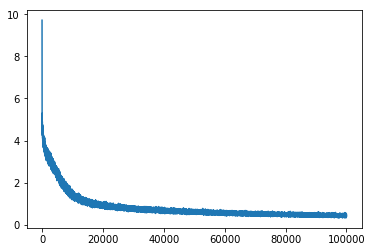

In [73]:
plt.plot(trainloss)

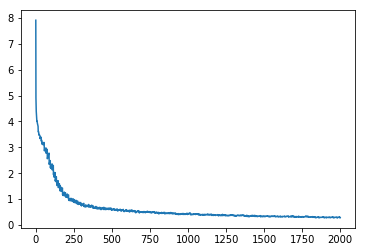

In [74]:
plt.plot(validloss)

In [0]:
# Added Dropout to imgembeddings
# Added Dropout to Encoded sentences produced by  output of embedded sentences
# Decreased Learning Rate to 0.0005
# Used Variational Dropout same dropout mask is used across all timesteps for single example 
# problem realised - validation data is not reflective of training data .It seems data is limited so changing approach shuffling data and splitting data after every epoch
# so model can see each example and learn from it


In [0]:
from sklearn.metrics import accuracy_score,log_loss

In [0]:
lstm_c=tf.Variable(tf.zeros(shape=[1,ns]))
lstm_h=tf.Variable(tf.zeros(shape=[1,ns]))
input_imgemb=tf.placeholder("float32",[1,2080])


 Two young guys with shaggy hair look at their hands while hanging out in the yard .
(500, 333, 3)


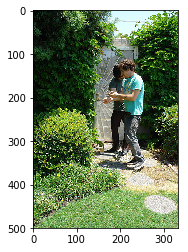

In [77]:
img=cv2.imread(imgbasedir+df.image_name.iloc[0])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(df[' comment'].iloc[0])
print(img.shape)

In [0]:
testindices=df.image_name[:100]

In [0]:
batchx=[]

In [0]:
for i in range(len(testindices.values)):
  img=cv2.imread(imgbasedir+testindices[i])
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(299,299))
  batchx.append(img)

In [0]:
batchx=np.array(batchx)

In [0]:
#Standardizing images
mean=np.mean(batchx,axis=0)
std=np.std(batchx,axis=0)

In [0]:
standadizedimges=(batchx-mean)/std

W0731 11:21:09.769115 139662405117824 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


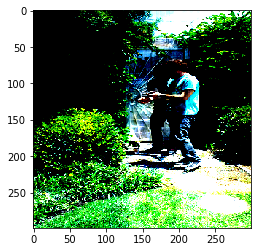

In [114]:
plt.imshow(standadizedimges[0])

(1, 2080)

TensorShape([Dimension(1), Dimension(64)])